# In What Electoral System Would Donald Trump Have Won The 2020 US Election? The Key Is To Understand Trump Supporters

## Introduction



The Electoral College system has been a concrete part of the US presidential election since the founding of the country. In this system, the citizens of each state cast their votes for their choice of electors, who will cast their votes for the presidential candidates. The number of electors of each state is the sum of the number of Senates and the number of Representatives. The Electoral College consists of 538 electors in total, and each elector's vote is counted as 1 vote in the general election. In the end, the candidate who wins over the majority - which means 270 votes - wins the election. The system was created out of good intention to balance the power of small states and large states, however, criticism is getting louder after several instances in which the winner of the popular vote did not win the election due to the outcome of the Electoral College vote. This has led to questions about whether the system accurately represents the will of the US citizens and if there might be a better way to elect the President.

As the fact is that Joe Biden won in the 2020 election, the goal of the paper is to find out whether there exists any electoral system which would have allowed Donald Trump to win in the 2020 election based the original votes.

The proposed electoral systems in this paper ALL have a common presumption, that the voting unit (county or state) which will be responsible to cast ALL of its votes to one candidate. This concept, known as the "winner-take-all" principle, is similar to the existing voting system in 48 of the 50 states and Washington, D.C. in the US.

As data analysis shows that Republican voters are disproportionally located in rural areas and small cities, the 4 electoral systems proposed in the paper all put higher focus on the number of voting unit (county or state), instead of the population of voting unit (county or state). Therefore, 3 of 4 electoral systems makes Donald to win in the 2020 election.

Moreover, the paper will investigate on the common features shared by Trump's voters share. Features like age, educational attainment, geographical locations, county size, household income, proportion of white race, unemployment rate, will be the focus of the study.


### Variables
- Input $X_1$: Raw votes of Joe Biden (the Democratic Party) in counties
- Input $X_2$: Raw votes of Donald Trump (the Republican Party) in counties
- Input $X_3$: Raw total votes in counties
-- $X_1$, $X_2$ and $X_3$ are all vectors, each component $X_{1,i}$, $X_{2,i}$, $X_{3,i}$, where i $\in$ [1,n], represents the raw votes of DEM, the raw votes of REP and the raw total votes in a specific county, n is the count of counties.
- Output $Y_1$: Fabricated Votes of Joe Biden (the Democratic Party) in US
- Output $Y_2$: Fabricated Votes of Donald Trump (the Republican Party) in US

* **Electoral System I - Elect By County**
Each county has same number of votes as its voters, it casts all of its votes on the party (candidate) that won the majority of votes.
According to the Electoral System I,

$$ Y_1 = \sum \limits _{i=1} ^{|Counties|} (if X_{1,i} > $X_1$), X_{3,i}, 0) $$

$$ Y_2 = \sum \limits _{i=1} ^{|Counties|} (if X_{1,i} < X_{2,i}), X_{3,i}, 0) $$

* **Electoral System II - Elect By County**
Each county has one vote, it casts its vote on the party (candidate) that won the majority of votes.**
According to the Electoral System II,

$$ Y_1 = \sum \limits _{i=1} ^{|Counties|} (if X_{1,i} > X_{2,i}), 1, 0) $$

$$ Y_2 = \sum \limits _{i=1} ^{|Counties|} (if X_{1,i} < X_{2,i}), 1, 0) $$

* **Electoral System III - Elect By State**
Each state has same number of votes as its voters, it casts all of its votes on the party (candidate) that won the majority of counties.
According to the Electoral System III,

$$ Y_{1} = \sum \limits _{i=1} ^{|States|} (if (DEMC_{i} > REPC_{i}), TVofState_{i}, 0) $$

$$ Y_{2} = \sum \limits _{i=1} ^{|States|} (if (DEMC_{i} < REPC_{i}), TVofState_{i}, 0) $$

$$ DEMC_{i} = \sum \limits _{j=1} ^{|Counties-in-a-state_i|} (if (X_{1,j} > X_{2,j}), 1, 0) $$

$$ REPC_{i} = \sum \limits _{j=1} ^{|Counties-in-a-state_i|} ((if (X_{1,j} < X_{2,j}), 1, 0) $$

$$ TVofState_{i} = \sum \limits _{j=1} ^{|Counties-in-a-state_i|} X_{3,j} $$

* **Electoral System IV - Elect By State**
Each state has one vote, it casts its vote on the party (candidate) that won the majority of counties.
According to the Electoral System IV,

$$ Y_{1} = \sum \limits _{i=1} ^{|States|} (if (DEMC_{i} > REPC_{i}), 1, 0) $$

$$ Y_{2} = \sum \limits _{i=1} ^{|States|} (if (DEMC_{i} < REPC_{i}), 1, 0) $$

$$ DEMC_{i} = \sum \limits _{j=1} ^{|Counties-in-a-state_i|} (if (X_{1,j} > X_{2,j}), 1, 0) $$

$$ REPC_{i} = \sum \limits _{j=1} ^{|Counties-in-a-state_i|} (if (X_{1,j} < X_{2,j}), 1, 0) $$

## Data Cleaning/Loading

### Datasets used in this article
1. Kaggle: US Election 2020
    The information includes, states, counties, candidates, parties, and their respective votes.
2. SimpleMaps: US cities except for District of Columbia
    The information includes counties' latitude, and longitude.
3. Census Reporter: District of Columbia
    The information includes 8 Wards of District of Columbia for their latitude, and longitude.
    Note: This information was searched manually, and is manually entered onto the second dataset.

### Data Loading

In [112]:
import pandas as pd
import numpy as np; np.random.seed(42)
import seaborn as sns
import geopandas as gpd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
import requests
from bs4 import BeautifulSoup
import re

*Note a wrong data in president_county_candidate.csv: Maine, Glenwood Plt., Donald Trump, corrected based on
https://www.nytimes.com/interactive/2020/11/03/us/elections/results-maine.html

In [113]:
df = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/president_county_candidate.csv')
df.head()

state             county      candidate party  total_votes    won
0  Delaware        Kent County      Joe Biden   DEM        44552   True
1  Delaware        Kent County   Donald Trump   REP        41009  False
2  Delaware        Kent County   Jo Jorgensen   LIB         1044  False
3  Delaware        Kent County  Howie Hawkins   GRN          420  False
4  Delaware  New Castle County      Joe Biden   DEM       195034   True

In [114]:
df_pc = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/president_county.csv')
df_pc.head()

state             county  current_votes  total_votes  \
0              Delaware        Kent County          87025        87025   
1              Delaware  New Castle County         287633       287633   
2              Delaware      Sussex County         129352       129352   
3  District of Columbia             Ward 1          41681        41681   
4  District of Columbia             Ward 2          32881        32881   

   percent  
0      100  
1      100  
2      100  
3      100  
4      100

In [115]:
df_ps = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/president_state.csv')
df_ps.head()

state  total_votes
0              Delaware       504010
1  District of Columbia       344356
2               Florida     11067456
3               Georgia      4997716
4                Hawaii       574469

In [116]:
df_county_population = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/2020_county_population.csv')
df_county_population.head()

state   county  population
0  Alabama  Autauga     42496.0
1  Alabama  Baldwin    171296.0
2  Alabama  Barbour     19804.0
3  Alabama     Bibb     17790.0
4  Alabama   Blount     44383.0

In [117]:
df_white = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/2020_white_population.csv')
df_white.head()

state   county White Population (%)
0  Alabama  Autauga           73.6091458
1  Alabama  Baldwin           83.6669937
2  Alabama  Barbour           47.5911394
3  Alabama     Bibb             74.83032
4  Alabama   Blount           87.5669009

In [118]:
df_voter = pd.read_csv(
    '/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/2020 November General Election - Turnout Rates.csv')
df_voter.head()

State                                             Source  \
0  United States                                                NaN   
1        Alabama  https://www2.alabamavotes.gov/electionnight/st...   
2         Alaska  https://www.elections.alaska.gov/results/20GEN...   
3        Arizona       https://results.arizona.vote/#/featured/18/0   
4       Arkansas  https://results.enr.clarityelections.com/AR/10...   

  Official/Unofficial Total Ballots Counted (Estimate)  \
0                 NaN                      158,835,004   
1          Unofficial                        2,306,587   
2                 NaN                          367,000   
3                 NaN                        3,400,000   
4          Unofficial                        1,212,030   

  Vote for Highest Office (President) VEP Turnout Rate  \
0                                 NaN            66.4%   
1                           2,297,295            62.6%   
2                                 NaN            69.8%   
3                                 NaN            65.5%   
4                           1,206,697            55.5%   

  Voting-Eligible Population (VEP) Voting-Age Population (VAP) % Non-citizen  \
0                      239,247,182                 257,605,088          7.8%   
1                        3,683,055                   3,837,540          2.3%   
2                          525,568                     551,117          3.4%   
3                        5,189,000                   5,798,473          8.9%   
4                        2,182,375                   2,331,171          3.6%   

      Prison  Probation   Parole Total Ineligible Felon Overseas Eligible  \
0  1,461,074  1,962,811  616,440              3,294,457         4,971,025   
1     25,898     50,997   10,266                 67,782               NaN   
2      4,293      2,074    1,348                  6,927               NaN   
3     38,520     76,844    7,536                 93,699               NaN   
4     17,510     36,719   24,698                 64,974               NaN   

  State Abv  
0       NaN  
1        AL  
2        AK  
3        AZ  
4        AR

In [119]:
df_county_income = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/kaggle_income.csv', encoding='Latin-1')
df_county_income.head()

id  State_Code State_Name State_ab          County            City  \
0  1011000           1    Alabama       AL   Mobile County       Chickasaw   
1  1011010           1    Alabama       AL  Barbour County      Louisville   
2  1011020           1    Alabama       AL   Shelby County      Columbiana   
3  1011030           1    Alabama       AL   Mobile County         Satsuma   
4  1011040           1    Alabama       AL   Mobile County  Dauphin Island   

             Place  Type Primary  Zip_Code Area_Code     ALand     AWater  \
0   Chickasaw city  City   place     36611       251  10894952     909156   
1        Clio city  City   place     36048       334  26070325      23254   
2  Columbiana city  City   place     35051       205  44835274     261034   
3      Creola city  City   place     36572       251  36878729    2374530   
4   Dauphin Island  Town   place     36528       251  16204185  413605152   

         Lat        Lon   Mean  Median  Stdev        sum_w  
0  30.771450 -88.079697  38773   30506  33101  1638.260513  
1  31.708516 -85.611039  37725   19528  43789   258.017685  
2  33.191452 -86.615618  54606   31930  57348   926.031000  
3  30.874343 -88.009442  63919   52814  47707   378.114619  
4  30.250913 -88.171268  77948   67225  54270   282.320328

In [120]:
df_county_vap = pd.read_csv("/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/2020_VAP.csv")
df_county_vap['VAP'] = df_county_vap['VAP'].replace(',', '',regex=True).astype(int)
df_county_vap.head()

state   county     VAP
0  Alabama  Autauga   44523
1  Alabama  Baldwin  182471
2  Alabama  Barbour   20134
3  Alabama     Bibb   17533
4  Alabama   Blount   45403

In [121]:
df_trump_vote = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/trump_vote_2020.csv')
df_trump_vote.head()

state     TRUE    FALSE  Grand Total
0    California   709784  5296177      6005961
1         Texas  3382177  2508170      5890347
2       Florida  3070400  2598331      5668731
3  Pennsylvania  1913864  1464399      3378263
4      New York  1324507  1925723      3250230

In [122]:
df_age = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/age.csv')
df_age.head()

NAME  Median Age (years)
0     Alabama                39.8
1      Alaska                35.6
2     Arizona                30.1
3    Arkansas                37.4
4  California                24.7

In [123]:
df_unemployment = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/unemployment_rate.csv')
df_unemployment.head()

State Unemployment Rate
0     Alabama             3.10%
1      Alaska             4.30%
2     Arizona             3.50%
3    Arkansas             3.20%
4  California             5.20%

In [124]:
df_county_unemployment = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/laucnty20.csv')

df_county_unemployment.head()

State_ab   county  Labor Force  Employed  Unemployed  Unemployment Rate (%)
0       AL  Autauga        26405     24985        1420                    5.4
1       AL  Baldwin        98910     92751        6159                    6.2
2       AL  Barbour         8680      8004         676                    7.8
3       AL     Bibb         8712      8073         639                    7.3
4       AL   Blount        25116     23973        1143                    4.6

In [125]:
usa = gpd.read_file('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/cb_2021_us_state_20m/cb_2021_us_state_20m.shp')
usa.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS       NAME LSAD          ALAND  \
0      22  01629543  0400000US22    22     LA  Louisiana   00   111915258185   
1      02  01785533  0400000US02    02     AK     Alaska   00  1478942847588   
2      24  01714934  0400000US24    24     MD   Maryland   00    25151992308   
3      55  01779806  0400000US55    55     WI  Wisconsin   00   140292321657   
4      12  00294478  0400000US12    12     FL    Florida   00   138961722096   

         AWATER                                           geometry  
0   23736382213  POLYGON ((-94.04305 32.69303, -94.04303 32.797...  
1  245378425142  MULTIPOLYGON (((179.48132 51.97530, 179.58286 ...  
2    6979074857  MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...  
3   29343646672  MULTIPOLYGON (((-86.93428 45.42115, -86.83575 ...  
4   45972570361  MULTIPOLYGON (((-81.81169 24.56874, -81.75127 ...

In [126]:
df_geo = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/uscities.csv')
df_geo.head()

city   city_ascii state_id  state_name  county_fips  county_name  \
0     New York     New York       NY    New York        36081       Queens   
1  Los Angeles  Los Angeles       CA  California         6037  Los Angeles   
2      Chicago      Chicago       IL    Illinois        17031         Cook   
3        Miami        Miami       FL     Florida        12086   Miami-Dade   
4       Dallas       Dallas       TX       Texas        48113       Dallas   

       lat       lng  population  density source  military  incorporated  \
0  40.6943  -73.9249    18680025  10768.0  shape     False          True   
1  34.1141 -118.4068    12531334   3267.0  shape     False          True   
2  41.8375  -87.6866     8586888   4576.0  shape     False          True   
3  25.7840  -80.2101     6076316   4945.0  shape     False          True   
4  32.7935  -96.7667     5910669   1522.0  shape     False          True   

              timezone  ranking  \
0     America/New_York        1   
1  America/Los_Angeles        1   
2      America/Chicago        1   
3     America/New_York        1   
4      America/Chicago        1   

                                                zips          id  
0  11229 11228 11226 11225 11224 11222 11221 1122...  1840034016  
1  91367 90291 90293 90292 91316 91311 90035 9003...  1840020491  
2  60018 60649 60641 60640 60643 60642 60645 6064...  1840000494  
3  33128 33129 33125 33126 33127 33149 33144 3314...  1840015149  
4  75098 75287 75230 75231 75236 75237 75235 7525...  1840019440

Since the geographical coordinates are incomplete with the above dataset, here I will include another dataset from Wikipedia that provides addition coordinates on the counties with missing data. As this data is important for almost all analysis, including those at the early stage of the project, I decided to move this part to the upfront.

In [127]:
web_url = 'https://en.wikipedia.org/wiki/User:Michael_J/County_table'
response = requests.get(web_url)

soup_object = BeautifulSoup(response.content)

data_table = soup_object.find_all('table', 'wikitable sortable')[0]
all_values = data_table.find_all('tr')

col_names = df_geo.columns.tolist()
county_geo = pd.DataFrame(columns=col_names)
ix = 0
for row in all_values[1:]:
    values = row.find_all('td')
    state_id = values[1].text.split("\n")[0]
    county_fips = int(values[2].text.split("\n")[0])
    county_name = values[3].text.split("\n")[0]
    lat = float(values[12].text.split("\n")[0].replace('+', '').replace('°', ''))
    lng = float(values[13].text.split("\n")[0].replace('–', '').replace('°', ''))
    #population = values[5].text.split("\n")[0].astype(int)*1.074

    county_geo.loc[ix] = ['', '', state_id, '', county_fips, county_name, lat, lng,'','', '', '', '', '', '', '', '', ]
    ix += 1

county_geo.head()

city city_ascii state_id state_name  county_fips county_name        lat  \
0                       AL                    1001     Autauga  32.536382   
1                       AL                    1003     Baldwin  30.659218   
2                       AL                    1005     Barbour  31.870670   
3                       AL                    1007        Bibb  33.015893   
4                       AL                    1009      Blount  33.977448   

         lng population density source military incorporated timezone ranking  \
0  86.644490                                                                    
1  87.746067                                                                    
2  85.405456                                                                    
3  87.127148                                                                    
4  86.567246                                                                    

  zips id  
0          
1          
2          
3          
4

In [128]:
# assuming df1 and df2 are the two data frames you have
merged_df = pd.concat([df_geo, county_geo], ignore_index=True)

# drop duplicates based on state_id and county_name columns
merged_df.drop_duplicates(subset=['state_id', 'county_name'], inplace=True)
merged_df.head()

city   city_ascii state_id  state_name  county_fips  county_name  \
0     New York     New York       NY    New York        36081       Queens   
1  Los Angeles  Los Angeles       CA  California         6037  Los Angeles   
2      Chicago      Chicago       IL    Illinois        17031         Cook   
3        Miami        Miami       FL     Florida        12086   Miami-Dade   
4       Dallas       Dallas       TX       Texas        48113       Dallas   

       lat       lng population  density source military incorporated  \
0  40.6943  -73.9249   18680025  10768.0  shape    False         True   
1  34.1141 -118.4068   12531334   3267.0  shape    False         True   
2  41.8375  -87.6866    8586888   4576.0  shape    False         True   
3  25.7840  -80.2101    6076316   4945.0  shape    False         True   
4  32.7935  -96.7667    5910669   1522.0  shape    False         True   

              timezone ranking  \
0     America/New_York       1   
1  America/Los_Angeles       1   
2      America/Chicago       1   
3     America/New_York       1   
4      America/Chicago       1   

                                                zips          id  
0  11229 11228 11226 11225 11224 11222 11221 1122...  1840034016  
1  91367 90291 90293 90292 91316 91311 90035 9003...  1840020491  
2  60018 60649 60641 60640 60643 60642 60645 6064...  1840000494  
3  33128 33129 33125 33126 33127 33149 33144 3314...  1840015149  
4  75098 75287 75230 75231 75236 75237 75235 7525...  1840019440

In [129]:
pd.set_option('display.max_columns', None)

### Data Cleaning
#### Electoral System

##### Step 1: Remove the rows of US Election 2020 where the candidate did not win

In [130]:
df['county'] = df['county'].str.replace(' County', '')
df_pc['county'] = df_pc['county'].str.replace(' County', '')

##### Step 2: Match the geographical coordinates with votes

In [131]:
df_copy = df.copy()
df_pc_copy = df_pc.copy()

df_geo_copy = merged_df.copy()
df_geo_copy.drop(['city', 'city_ascii', 'state_id', 'county_fips', 'source', 'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id', 'population', 'density'], axis = 1, inplace = True)
df_geo_copy.rename(columns={"state_name": "state", "county_name": "county"}, inplace = True)
df_geo_copy.drop_duplicates(subset = ['state', 'county'], keep = 'first', inplace = True)
df_geo_pop = df_geo.copy()
df_geo_pop.drop(['city', 'city_ascii', 'state_id', 'county_fips', 'source', 'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id', 'population'], axis = 1, inplace = True)
df_geo_pop.rename(columns={"state_name": "state", "county_name": "county"}, inplace = True)
df_geo_pop.drop_duplicates(subset = ['state', 'county'], keep = 'first', inplace = True)
df_geo_pop = pd.merge(df_geo_pop, df_county_population, on=['state', 'county'], how='left')

df_county_statistics = pd.merge(df_copy, df_geo_copy, on=['county', 'state'], how = 'left')
df_pc_copy.drop(['total_votes', 'percent'], axis = 1, inplace = True)
df_county = df_county_statistics.copy()
df_county.drop(df_copy[df_copy['won'] == False].index, inplace = True)
df_county.reset_index(inplace=True)
df_county['total_votes'] = df_pc_copy['current_votes']
df_county.drop(['index'], axis = 1, inplace = True)
df_county.head()

state      county     candidate party  total_votes   won  \
0              Delaware        Kent     Joe Biden   DEM        87025  True   
1              Delaware  New Castle     Joe Biden   DEM       287633  True   
2              Delaware      Sussex  Donald Trump   REP       129352  True   
3  District of Columbia      Ward 1     Joe Biden   DEM        41681  True   
4  District of Columbia      Ward 2     Joe Biden   DEM        32881  True   

       lat      lng  
0  39.1610 -75.5202  
1  39.7415 -75.5416  
2  38.9091 -75.4227  
3  38.9072 -77.0369  
4  38.9063 -77.0340

df_copy = df.copy()
df_pc_copy = df_pc.copy()

df_geo_copy = merged_df.copy()
df_geo_copy.drop(['city', 'city_ascii', 'state_id', 'county_fips', 'source', 'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id', 'population', 'density'], axis = 1, inplace = True)
df_geo_copy.rename(columns={"state_name": "state", "county_name": "county"}, inplace = True)
df_geo_copy.drop_duplicates(subset = ['state', 'county'], keep = 'first', inplace = True)
df_geo_pop = df_geo.copy()
df_geo_pop.drop(['city', 'city_ascii', 'state_id', 'county_fips', 'source', 'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id'], axis = 1, inplace = True)
df_geo_pop.rename(columns={"state_name": "state", "county_name": "county"}, inplace = True)
df_geo_pop.drop_duplicates(subset = ['state', 'county'], keep = 'first', inplace = True)

df_county_statistics = pd.merge(df_copy, df_geo_copy, on=['county', 'state'], how = 'left')
df_pc_copy.drop(['total_votes', 'percent'], axis = 1, inplace = True)
df_county = df_county_statistics.copy()
df_county.drop(df_copy[df_copy['won'] == False].index, inplace = True)
df_county.reset_index(inplace=True)
df_county['total_votes'] = df_pc_copy['current_votes']
df_county.drop(['index'], axis = 1, inplace = True)
df_county.head()

In [132]:
df_county.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4633 entries, 0 to 4632
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        4633 non-null   object 
 1   county       4633 non-null   object 
 2   candidate    4633 non-null   object 
 3   party        4633 non-null   object 
 4   total_votes  4633 non-null   int64  
 5   won          4633 non-null   bool   
 6   lat          2985 non-null   float64
 7   lng          2985 non-null   float64
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 258.0+ KB


##### Step 3: Calculating data for summary statistics table

In [133]:
df_county_won = df_county.copy()
df_county_won.drop(df_county_won[df_county_won['candidate'] != 'Donald Trump'].index, inplace = True)
df_county_won.drop(['lat', 'lng'], axis = 1, inplace = True)
df_county_won.rename(columns={"total_votes": "county_total_votes"}, inplace = True)
df_county_won = pd.merge(df_county_won, df_copy, on=['county', 'state', 'candidate', 'party', 'won'], how='left')
df_county_won.rename(columns={"total_votes": "won_votes"}, inplace = True)
df_county_won = df_county_won[['state', 'county', 'candidate', 'party', 'won', 'won_votes', 'county_total_votes']]
df_county_won['share of votes in the winning counties'] = \
    df_county_won['won_votes'] / df_county_won['county_total_votes']
df_county_won.head()

state    county     candidate party   won  won_votes  \
0  Delaware    Sussex  Donald Trump   REP  True      71230   
1   Florida     Baker  Donald Trump   REP  True      11911   
2   Florida       Bay  Donald Trump   REP  True      66097   
3   Florida  Bradford  Donald Trump   REP  True      10334   
4   Florida   Brevard  Donald Trump   REP  True     207883   

   county_total_votes  share of votes in the winning counties  
0              129352                                0.550668  
1               14059                                0.847215  
2               93024                                0.710537  
3               13632                                0.758069  
4              360764                                0.576230

In [134]:
df_county_lost = df_county_statistics.copy()
df_county_lost.drop(df_copy[df_copy['won'] == True].index, inplace = True)
df_county_lost.drop(df_county_lost[df_county_lost['candidate'] != 'Donald Trump'].index, inplace = True)
df_county_lost.drop(['lat', 'lng'], axis = 1, inplace = True)
df_county_lost.reset_index(inplace=True)
df_county_lost.rename(columns={"total_votes": "won_votes"}, inplace = True)
df_county_lost = pd.merge(df_county_lost, df_pc_copy, on = ['state', 'county'], how = 'left')
df_county_lost.rename(columns={"current_votes": "county_total_votes"}, inplace = True)
df_county_lost.drop(['index'], axis = 1, inplace = True)
df_county_lost = df_county_lost[['state', 'county', 'candidate', 'party', 'won', 'won_votes', 'county_total_votes']]
df_county_lost['share of votes in the losing counties'] =\
    df_county_lost['won_votes'] / df_county_lost['county_total_votes']
df_county_lost.head()

state      county     candidate party    won  won_votes  \
0              Delaware        Kent  Donald Trump   REP  False      41009   
1              Delaware  New Castle  Donald Trump   REP  False      88364   
2  District of Columbia      Ward 1  Donald Trump   REP  False       1725   
3  District of Columbia      Ward 2  Donald Trump   REP  False       2918   
4  District of Columbia      Ward 3  Donald Trump   REP  False       3705   

   county_total_votes  share of votes in the losing counties  
0               87025                               0.471232  
1              287633                               0.307211  
2               41681                               0.041386  
3               32881                               0.088744  
4               44231                               0.083765

For Electoral System I and II, in which the county is the vote casting level, data cleaning is done. They share the same dataframe for plotting purposes.

For Electoral System III and IV, in which the state is the vote casting level, continue the following steps:

##### Step 4: Calculate the number of counties won by each candidate in each state.

In [135]:
df_state = df_copy.groupby(["state", "candidate", "party"]).sum(numeric_only = True)
df_state.rename(columns={"won": "# of counties won"}, inplace = True)
df_state.index = [df_state.index.get_level_values(0),
                  df_state.index.get_level_values(1),
                  df_state.index.get_level_values(2)]
df_state = df_state.reset_index() \
       .sort_values(['state','# of counties won'], ascending=[True,False]) \
       .set_index(['state','party'])
df_state.drop(['total_votes'], axis = 1, inplace = True)
df_state.head()

candidate  # of counties won
state   party                                 
Alabama REP    Donald Trump                 54
        DEM       Joe Biden                 13
        WRI       Write-ins                  0
        LIB    Jo Jorgensen                  0
Alaska  REP    Donald Trump                 20

##### Step 5: Keep the candidate of the highest voting only

In [136]:
df_state1 = df_state.copy()
df_state1.reset_index(inplace=True)
df_state1.drop_duplicates(
  subset = ['state'],
  keep = 'first', inplace = True)
df_state1 = df_state1.reset_index(drop=True)
df_state1.head()

state party     candidate  # of counties won
0     Alabama   REP  Donald Trump                 54
1      Alaska   REP  Donald Trump                 20
2     Arizona   REP  Donald Trump                 10
3    Arkansas   REP  Donald Trump                 67
4  California   DEM     Joe Biden                 35

##### Step 6: Replace all candidates and parties' name by the winner of each state, because now all the votes of a state belongs to the winner

In [137]:
df_state2 = df_county.copy()
df_state2.drop(['candidate'], axis = 1, inplace = True)
df_state2.drop(['party'], axis = 1, inplace = True)
df_state2 = pd.merge(df_state2, df_state1, on = 'state', how = 'left')
df_state2.head()

state      county  total_votes   won      lat      lng  \
0              Delaware        Kent        87025  True  39.1610 -75.5202   
1              Delaware  New Castle       287633  True  39.7415 -75.5416   
2              Delaware      Sussex       129352  True  38.9091 -75.4227   
3  District of Columbia      Ward 1        41681  True  38.9072 -77.0369   
4  District of Columbia      Ward 2        32881  True  38.9063 -77.0340   

  party  candidate  # of counties won  
0   DEM  Joe Biden                  2  
1   DEM  Joe Biden                  2  
2   DEM  Joe Biden                  2  
3   DEM  Joe Biden                  8  
4   DEM  Joe Biden                  8

##### Step 7: Generate geodataframe for US mainland maps

In [138]:
gpd_state = usa[~usa["NAME"].isin(["Alaska", "Hawaii", "Puerto Rico"])]
gpd_state = gpd_state.copy()
gpd_state.sort_values(by=['NAME'], ascending=True, axis=0, inplace =True)
df_state1_merge = df_state1.rename(columns={"state": "NAME"})
gpd_state = pd.merge(gpd_state, df_state1_merge, on="NAME", how="left")
gpd_state.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS        NAME LSAD         ALAND  \
0      01  01779775  0400000US01    01     AL     Alabama   00  131175477769   
1      04  01779777  0400000US04    04     AZ     Arizona   00  294363973043   
2      05  00068085  0400000US05    05     AR    Arkansas   00  134660767709   
3      06  01779778  0400000US06    06     CA  California   00  403671756816   
4      08  01779779  0400000US08    08     CO    Colorado   00  268418796417   

        AWATER                                           geometry party  \
0   4591897964  POLYGON ((-88.46866 31.89386, -88.46866 31.933...   REP   
1    855871553  POLYGON ((-114.79968 32.59362, -114.80939 32.6...   REP   
2   3121950081  POLYGON ((-94.61792 36.49941, -94.36120 36.499...   REP   
3  20293573058  MULTIPOLYGON (((-118.59397 33.46720, -118.4847...   DEM   
4   1185716938  POLYGON ((-109.05996 38.49999, -109.05151 39.1...   REP   

      candidate  # of counties won  
0  Donald Trump                 54  
1  Donald Trump                 10  
2  Donald Trump                 67  
3     Joe Biden                 35  
4  Donald Trump                 40

##### Step 8: Generate dataframe for mapping the electoral systems

In [139]:
df_state3 = df_state2.copy()
df_state3.drop_duplicates(subset = ['state'], keep = 'first', inplace = True)
df_state3.drop(['county', 'total_votes', 'won', 'lat', 'lng', 'candidate', '# of counties won'], axis = 1, inplace = True)
df_state3 = df_state3[~df_state3["state"].isin(["Alaska", "Hawaii"])]
df_ps_copy = df_ps.copy()
df_state_vote = pd.merge(df_state3, df_ps_copy, on='state', how='left')
df_state_vote.rename(columns={"state": "NAME"}, inplace = True)
gpd_state4 = pd.merge(gpd_state, df_state_vote, on=['NAME', 'party'], how='left')
gpd_state4.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS        NAME LSAD         ALAND  \
0      01  01779775  0400000US01    01     AL     Alabama   00  131175477769   
1      04  01779777  0400000US04    04     AZ     Arizona   00  294363973043   
2      05  00068085  0400000US05    05     AR    Arkansas   00  134660767709   
3      06  01779778  0400000US06    06     CA  California   00  403671756816   
4      08  01779779  0400000US08    08     CO    Colorado   00  268418796417   

        AWATER                                           geometry party  \
0   4591897964  POLYGON ((-88.46866 31.89386, -88.46866 31.933...   REP   
1    855871553  POLYGON ((-114.79968 32.59362, -114.80939 32.6...   REP   
2   3121950081  POLYGON ((-94.61792 36.49941, -94.36120 36.499...   REP   
3  20293573058  MULTIPOLYGON (((-118.59397 33.46720, -118.4847...   DEM   
4   1185716938  POLYGON ((-109.05996 38.49999, -109.05151 39.1...   REP   

      candidate  # of counties won  total_votes  
0  Donald Trump                 54      2323304  
1  Donald Trump                 10      3387326  
2  Donald Trump                 67      1219069  
3     Joe Biden                 35     17495906  
4  Donald Trump                 40      3256953

##### Step 9: Further data cleaning work for Electoral System III and IV on summary statistics table

In [140]:
df_state_statistics = df_state1.copy()
df_state_total = df_state.groupby(level=[0]).sum(numeric_only = True)
df_state_total.rename(columns={"# of counties won": "# of total counties"}, inplace = True)
df_state_statistics = pd.merge(df_state_statistics, df_state_total, on = 'state', how = 'left')
df_state_statistics.head()

state party     candidate  # of counties won  # of total counties
0     Alabama   REP  Donald Trump                 54                   67
1      Alaska   REP  Donald Trump                 20                   40
2     Arizona   REP  Donald Trump                 10                   15
3    Arkansas   REP  Donald Trump                 67                   75
4  California   DEM     Joe Biden                 35                   58

In [141]:
df_state_won = df_state_statistics.copy()
df_state_won.drop(df_state_won[df_state_won['candidate'] != 'Donald Trump'].index, inplace = True)
df_state_won['share of counties in the winning states'] = \
    df_state_won['# of counties won'] / df_state_won['# of total counties']
df_state_won['won'] = True
df_state_won = df_state_won[['state', 'candidate', 'party', 'won', '# of counties won', '# of total counties', 'share of counties in the winning states']]
df_state_won.head()

state     candidate party   won  # of counties won  # of total counties  \
0   Alabama  Donald Trump   REP  True                 54                   67   
1    Alaska  Donald Trump   REP  True                 20                   40   
2   Arizona  Donald Trump   REP  True                 10                   15   
3  Arkansas  Donald Trump   REP  True                 67                   75   
5  Colorado  Donald Trump   REP  True                 40                   64   

   share of counties in the winning states  
0                                 0.805970  
1                                 0.500000  
2                                 0.666667  
3                                 0.893333  
5                                 0.625000

In [142]:
df_state_lost = df_state1.copy()
df_state_lost.drop(df_state_lost[df_state_lost['candidate'] == 'Donald Trump'].index, inplace = True)
df_state_lost.drop(['party', 'candidate', '# of counties won'], axis = 1, inplace = True)
df_state_lost = pd.merge(df_state_lost, df_state, on = ['state'], how = 'left')
df_state_lost.drop(df_state_lost[df_state_lost['candidate'] != 'Donald Trump'].index, inplace = True)
df_state_lost = pd.merge(df_state_lost, df_state_total, on = ['state'], how = 'left')
df_state_lost['share of counties in the losing states'] = \
    df_state_lost['# of counties won'] / df_state_lost['# of total counties']
df_state_lost['won'] = False
df_state_lost['party'] = 'REP'
df_state_lost = df_state_lost[['state', 'candidate', 'party', 'won', '# of counties won', '# of total counties', 'share of counties in the losing states']]
df_state_lost

state     candidate party    won  # of counties won  \
0            California  Donald Trump   REP  False                 23   
1           Connecticut  Donald Trump   REP  False                 54   
2              Delaware  Donald Trump   REP  False                  1   
3  District of Columbia  Donald Trump   REP  False                  0   
4                Hawaii  Donald Trump   REP  False                  0   
5         Massachusetts  Donald Trump   REP  False                 53   
6            New Jersey  Donald Trump   REP  False                  7   
7          Rhode Island  Donald Trump   REP  False                 11   
8               Vermont  Donald Trump   REP  False                 45   

   # of total counties  share of counties in the losing states  
0                   58                                0.396552  
1                  169                                0.319527  
2                    3                                0.333333  
3                    8                                0.000000  
4                    4                                0.000000  
5                  351                                0.150997  
6                   21                                0.333333  
7                   39                                0.282051  
8                  246                                0.182927

#### VEP (Voting-Eligible Population) Turnout Rate at State Level

In [143]:
df_voter2 = pd.DataFrame()
df_voter2['NAME'] = df_voter['State']
df_voter2['VEP Turnout Rate (%)'] = df_voter['VEP Turnout Rate']
df_voter2['Voting-Eligible Population (VEP)'] = \
    df_voter['Voting-Eligible Population (VEP)'].replace(',', '',regex=True).astype(int)
df_voter2['VEP Turnout Rate (%)'] = df_voter2['VEP Turnout Rate (%)'].replace('%', '', regex=True).astype(float)
df_voter2.head()

NAME  VEP Turnout Rate (%)  Voting-Eligible Population (VEP)
0  United States                  66.4                         239247182
1        Alabama                  62.6                           3683055
2         Alaska                  69.8                            525568
3        Arizona                  65.5                           5189000
4       Arkansas                  55.5                           2182375

#### VEP Turnout Rate at County Level
I only found VEP and VEP Turnout Rate at state Level, therefore I will use the ratio of VEP/VAP for each state combined with the VAP statistics I found at the county level to estimate the VEP for each county

#### Summary of Trump Vote at State Level

In [144]:
df_trump_vote_sum = pd.merge(df_trump_vote, df_ps, on = 'state', how = 'left')
df_trump_vote_sum['ratio'] = df_trump_vote_sum['Grand Total'] / df_trump_vote_sum['total_votes']
df_trump_vote_sum.rename(columns={"state": "NAME"}, inplace = True)
df_trump_vote_sum.head()

NAME     TRUE    FALSE  Grand Total  total_votes     ratio
0    California   709784  5296177      6005961     17495906  0.343278
1         Texas  3382177  2508170      5890347     11317911  0.520445
2       Florida  3070400  2598331      5668731     11067456  0.512198
3  Pennsylvania  1913864  1464399      3378263      6925255  0.487818
4      New York  1324507  1925723      3250230      8613546  0.377339

In [145]:
df_voter_copy = df_voter.copy()
df_voter_copy['Voting-Eligible Population (VEP)'] = \
    df_voter_copy['Voting-Eligible Population (VEP)'].replace(',', '',regex=True).astype(int)
df_voter_copy['Voting-Age Population (VAP)'] = \
    df_voter_copy['Voting-Age Population (VAP)'].replace(',', '',regex=True).astype(int)

df_ratio = pd.DataFrame()
df_ratio['state'] = df_voter_copy['State']
df_ratio['VEP/VAP ratio'] = df_voter_copy['Voting-Eligible Population (VEP)']/df_voter_copy['Voting-Age Population (VAP)']
df_ratio = df_ratio.drop(index=0)

df_county_vep = pd.merge(df_county_vap, df_ratio, on='state', how='left')
df_county_vep['VEP'] = df_county_vep['VAP']*df_county_vep['VEP/VAP ratio']
df_county_vep.drop(['VAP', 'VEP/VAP ratio'], axis = 1, inplace = True)
df_county_vep.head()

state   county            VEP
0  Alabama  Autauga   42730.670629
1  Alabama  Baldwin  175125.400362
2  Alabama  Barbour   19323.480503
3  Alabama     Bibb   16827.187030
4  Alabama   Blount   43575.245122

In [285]:
df_county_vep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3221 entries, 0 to 3220
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   state   3221 non-null   object 
 1   county  3221 non-null   object 
 2   VEP     2985 non-null   float64
dtypes: float64(1), object(2)
memory usage: 100.7+ KB


#### Unemployment Rate at County Level
Turn the state abbreviation into name

In [147]:
state_dict = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

df_county_unemployment['state'] = df_county_unemployment['State_ab'].map(state_dict)
df_county_unemployment['Unemployment Rate (%)'] = df_county_unemployment['Unemployment Rate (%)'].astype(float)
df_county_unemployment.head()

State_ab   county  Labor Force  Employed  Unemployed  Unemployment Rate (%)  \
0       AL  Autauga        26405     24985        1420                    5.4   
1       AL  Baldwin        98910     92751        6159                    6.2   
2       AL  Barbour         8680      8004         676                    7.8   
3       AL     Bibb         8712      8073         639                    7.3   
4       AL   Blount        25116     23973        1143                    4.6   

     state  
0  Alabama  
1  Alabama  
2  Alabama  
3  Alabama  
4  Alabama

#### Unemployment Rate at State Level

In [148]:
df_unemployment['Unemployment Rate'] = df_unemployment['Unemployment Rate'].replace('%', '', regex=True).astype(float)
df_unemployment = df_unemployment.rename(columns={'Unemployment Rate': 'Unemployment Rate (%)', 'State':'NAME'})
df_unemployment.head()

NAME  Unemployment Rate (%)
0     Alabama                    3.1
1      Alaska                    4.3
2     Arizona                    3.5
3    Arkansas                    3.2
4  California                    5.2

##### Household Income at County Level

In [149]:
df_county_income.rename(columns={"State_Name": "state", 'County':'county'}, inplace=True)
df_county_income = df_county_income.loc[:, ['state', 'county', 'Mean', 'Median', 'Stdev']]
df_county_income['county'] = df_county_income['county'].replace(' County', '', regex=True)
df_county_income.drop_duplicates(subset = ['state', 'county'], keep = 'first', inplace = True)
df_county_income['Mean'] = df_county_income['Mean'].div(1000)
df_county_income['Median'] = df_county_income['Median'].div(1000)
df_county_income['Stdev'] = df_county_income['Stdev'].div(1000)
df_county_income.rename(columns={'Mean': 'Average Income (USD1,000)', 'Median': 'Median Income (USD1,000', 'Stdev':'Standard Deviation of Income (USD1,000)'})
df_county_income.head()

state    county    Mean  Median   Stdev
0  Alabama    Mobile  38.773  30.506  33.101
1  Alabama   Barbour  37.725  19.528  43.789
2  Alabama    Shelby  54.606  31.930  57.348
5  Alabama   Cullman  50.715  42.643  35.886
6  Alabama  Escambia  33.737  23.610  28.256

In [284]:
df_county_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1678 entries, 0 to 32172
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   state   1678 non-null   object 
 1   county  1678 non-null   object 
 2   Mean    1678 non-null   float64
 3   Median  1678 non-null   float64
 4   Stdev   1678 non-null   float64
dtypes: float64(3), object(2)
memory usage: 78.7+ KB


#### Summary of Trump Vote at County Level

In [150]:
df_county_plot = df_county_won.copy()
df_county_plot.rename(columns={'share of votes in the winning counties': 'trump_vote_share'}, inplace = True)
df_county_plot1 = df_county_lost.copy()
df_county_plot1.rename(columns={'share of votes in the losing counties': 'trump_vote_share'}, inplace = True)
df_county_plot = pd.concat([df_county_plot, df_county_plot1])
df_county_plot['trump_vote_share'] = df_county_plot['trump_vote_share']*100
df_county_pop = pd.merge(df_county_plot, df_geo_pop, on = ['state', 'county'])
df_county_pop.drop(df_county_pop[df_county_pop['population'] < df_county_pop['county_total_votes']].index, inplace = True)
df_county_pop['effective_voting_rate'] = df_county_pop['county_total_votes'] / df_county_pop['population'] *100
df_county_pop.head()

state    county     candidate party   won  won_votes  \
0  Delaware    Sussex  Donald Trump   REP  True      71230   
1   Florida     Baker  Donald Trump   REP  True      11911   
2   Florida       Bay  Donald Trump   REP  True      66097   
3   Florida  Bradford  Donald Trump   REP  True      10334   
4   Florida   Brevard  Donald Trump   REP  True     207883   

   county_total_votes  trump_vote_share      lat      lng  density  \
0              129352         55.066794  38.9091 -75.4227    449.0   
1               14059         84.721531  30.2809 -82.1253    534.0   
2               93024         71.053707  30.1995 -85.6003    395.0   
3               13632         75.806925  29.9474 -82.1129    291.0   
4              360764         57.622989  27.9631 -80.6593    508.0   

   population  effective_voting_rate  
0    187413.0              69.019759  
1     21996.0              63.916167  
2    142019.0              65.501095  
3     22316.0              61.086216  
4    485337.0              74.332680

In [151]:
df_county_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2980 entries, 0 to 2984
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  2980 non-null   object 
 1   county                 2980 non-null   object 
 2   candidate              2980 non-null   object 
 3   party                  2980 non-null   object 
 4   won                    2980 non-null   bool   
 5   won_votes              2980 non-null   int64  
 6   county_total_votes     2980 non-null   int64  
 7   trump_vote_share       2980 non-null   float64
 8   lat                    2980 non-null   float64
 9   lng                    2980 non-null   float64
 10  density                2980 non-null   float64
 11  population             2529 non-null   float64
 12  effective_voting_rate  2529 non-null   float64
dtypes: bool(1), float64(6), int64(2), object(4)
memory usage: 305.6+ KB


## Summary Statistics Tables

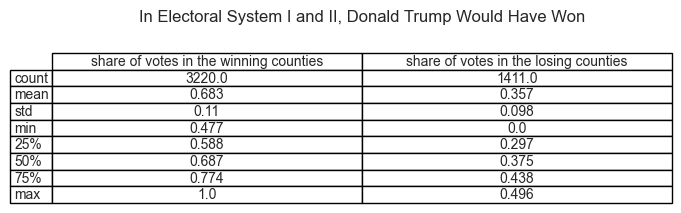

In [152]:
df_I_II_statistics = pd.DataFrame({
    "share of votes in the winning counties" : df_county_won['share of votes in the winning counties'].describe(),
    "share of votes in the losing counties" : df_county_lost['share of votes in the losing counties'].describe(),
})
df_I_II_statistics = df_I_II_statistics.round(decimals = 3)
fig=plt.figure(figsize = (8, 0.3))
ax = fig.add_subplot(111)
ax.table(cellText = df_I_II_statistics.values, colLabels = df_I_II_statistics.columns,
         rowLabels = df_I_II_statistics.index, cellLoc = 'center')
ax.set_title ("In Electoral System I and II, Donald Trump Would Have Won")
ax.axis ('off')
plt.show()

The above summary statistics table presented the basic information about Electoral System I and II. Let's revisit the definition of the two electoral systems. For electoral system I, each county has same number of votes as its voters, it casts all of its votes on the party (candidate) that won the majority of votes. For electoral system II, each county has one vote, it casts its vote on the party (candidate) that won the majority of votes. Both electoral systems share a same characteristic, that is the decision-making level is at the county. Therefore, systematically speaking, there exists a great potential for the counties with large population to overstep the ones with less population, which is not beneficial to the Republican policy. The gap between the two 50%-data is about 31%, keep this data in mind, and we will compare it with the next table.

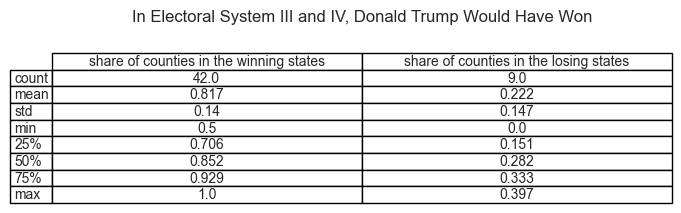

In [153]:
df_III_IV_statistics = pd.DataFrame({
    "share of counties in the winning states": df_state_won['share of counties in the winning states'].describe(),
    "share of counties in the losing states": df_state_lost['share of counties in the losing states'].describe(),
})
df_III_IV_statistics = df_III_IV_statistics.round(decimals = 3)
fig2 = plt.figure(figsize = (8, 0.3))
ax2 = fig2.add_subplot(111)
ax2.table(cellText = df_III_IV_statistics.values, colLabels = df_III_IV_statistics.columns,
         rowLabels = df_III_IV_statistics.index, cellLoc = 'center')
ax2.set_title("In Electoral System III and IV, Donald Trump Would Have Won")
ax2.axis ('off')
plt.show()

The above summary statistics table presented the basic information about Electoral System III and IV. Let's revisit the definition of the two electoral systems. For electoral system III, each state has same number of votes as its voters, it casts all of its votes on the party (candidate) that won the majority of counties. For electoral system IV, Each state has one vote, it casts its vote on the party (candidate) that won the majority of counties. Both electoral systems here also share a same characteristic, that is the decision-making level is at the state. Therefore, systematically speaking, no matter how many votes the Democrat receives at the large counties, it only counts as 1 vote per county at the state level. As a result, the advantage of Trump being popular with smaller counties is now fully exploited. The gap between the two 50%-data is about 57%, which is almost a double of the 31% from the above, which proves the previous reasoning.

## Plots, Histograms, Figures
### County Level Analysis

#### Effective Voting Rate Versus Density
The voting-eligible population in the US refers to individuals who are eligible to vote in federal elections, such as presidential, congressional, and senatorial elections. To be eligible, a person must be a citizen of the United States, at least 18 years old, and registered to vote in their state of residence. Excluded from this population are non-citizens, individuals under 18 years old, and unregistered individuals. It is worth noting that while all eligible citizens can vote, not all choose to do so. To better understand the voting patterns in US counties, it is important to analyze not only the eligible voter population but also the level of voter participation. This can be done by evaluating the effectiveness of votes cast by introducing a new concept called Effective Voting Rate, which provides a more accurate picture of the level of voter participation within a county. With that said, allow me to introduce the formula of Effective Voting Rate, which refers to the percentage of effective votes (county_total_votes) in the total population within a county.

$$\text{Effective Voting Rate (\%) in a county} = 100*\frac{\text{Effective Votes in a county}}{\text{Population in a county}} $$

Since prevailing belief is that Trump and Biden has fairly different voting bloc regarding the size of counties, population density is likely to play a significant role in influencing the Effective Voting Rate. The association between the two factors is worth exploring further, as it may provide valuable insights into the factors that impact voting behavior. With this in mind, it is important to delve deeper into the relationship between density and Effective Voting Rate to gain a more comprehensive understanding of their interplay.

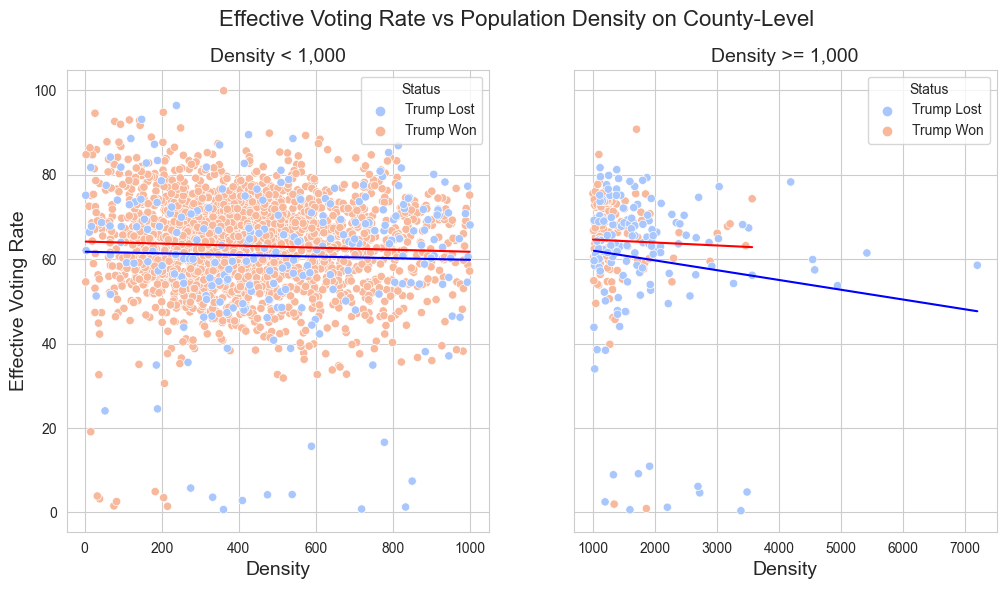

In [154]:
df_county_density1 = df_county_pop.copy()
df_county_density1.drop(df_county_density1[df_county_density1['density'] >= 1000].index, inplace = True)
df_county_density2 = df_county_pop.copy()
df_county_density2.drop(df_county_density2[df_county_density2['density'] < 1000].index, inplace = True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
sns.scatterplot(data=df_county_density1, x="density", y='effective_voting_rate', hue = "won", palette = "coolwarm", ax = ax1)
sns.scatterplot(data=df_county_density2, x="density", y='effective_voting_rate', hue = "won", palette = "coolwarm", ax = ax2)
ax1.set_ylabel("Effective Voting Rate", fontsize=14)
ax1.set_title("Density < 1,000", fontsize=14)
ax2.set_title("Density >= 1,000", fontsize=14)
ax1.set_xlabel("Density", fontsize=14)
ax2.set_xlabel("Density", fontsize=14)

axes = [ax1, ax2]
list_df_density = [df_county_density1, df_county_density2]
for j in range(len(axes)):
    legend_labels = axes[j].get_legend().get_texts()
    for i, label in enumerate(legend_labels):
        if i == 0:
            label.set_text("Trump Lost")
        if i == 1:
            label.set_text("Trump Won")
    axes[j].get_legend().set_title("Status")
    list_df_density[j] = list_df_density[j].dropna(subset=['density', 'effective_voting_rate'])
    X = list_df_density[j]
    X_won = X[X['won'] == True]["density"]
    y_won = X[X['won'] == True]['effective_voting_rate']
    axes[j].plot(np.unique(X_won),
                 np.poly1d(np.polyfit(X_won, y_won, 1))(np.unique(X_won)),
                 color='red')
    X_lost = X[X['won'] == False]["density"]
    y_lost = X[X['won'] == False]['effective_voting_rate']
    axes[j].plot(np.unique(X_lost),
                 np.poly1d(np.polyfit(X_lost, y_lost, 1))(np.unique(X_lost)),
                 color='blue')


plt.suptitle("Effective Voting Rate vs Population Density on County-Level", fontsize = 16)
plt.show()

Although the regression lines suggest a weak negative correlation between Effective Voting Rate and density, the scatter dots provide evidence that such a relationship is likely to be insignificant. This finding helps to dispel a potential misconception that may have arisen from the previous discussion, which suggested that a negative correlation between population and Effective Voting Rate would also imply a negative relationship between density and Effective Voting Rate.

However, it is worth noting that the regression line for Trump Won lies above the regression line for Trump lost in both subplots by about 10% Effective Voting Rate. The higher participation rate may be an attribute to Trump's winning in those counties, since more eligible voters were willing to effectively cast their votes when the population density was the same. In other words, Trump may have had an equal chance of pulling votes as Biden does regardless the size of the county.

#### Vote Share of Trump Versus County Total Votes
To further explore the relationship between county size and support for Trump, it is worth examining the vote share of Trump against the total number of votes cast in each county. This can help us determine if Trump's popularity is indeed higher in smaller counties and rural regions, as is commonly believed.

$$\text{Vote Share of Trump (\%) in a county} = 100*\frac{\text{Votes for Trump in a county}}{\text{Total Votes in a county}} $$

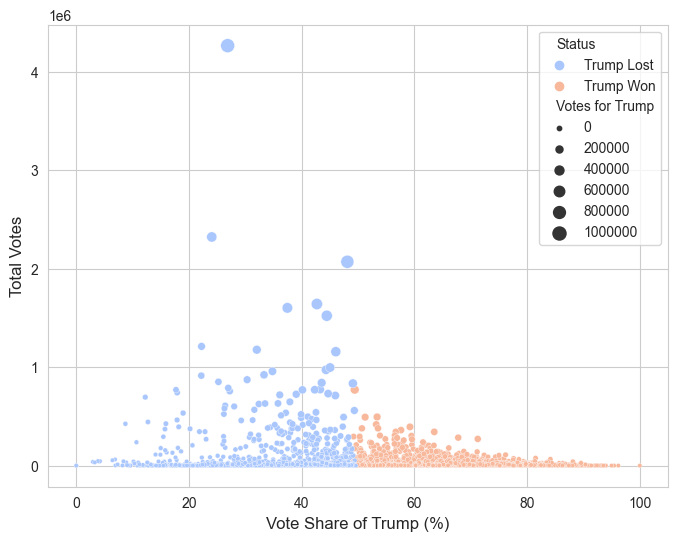

In [393]:
plt.figure(figsize = (8,6))
sns.scatterplot(data = df_county_plot, x = "trump_vote_share", y = 'county_total_votes', hue = "won", size = "won_votes", palette = "coolwarm", sizes=(10,100))

legend_labels = plt.gca().get_legend().get_texts()
for i, label in enumerate(legend_labels):
    if i == 0:
        label.set_text("Status")
    if i == 1:
        label.set_text("Trump Lost")
    if i == 2:
        label.set_text("Trump Won")
    if i == 3:
        label.set_text("Votes for Trump")

#plt.title("Vote Share of Trump vs Total Votes at County-Level", fontdict={'family': 'sans-serif', 'size': 14})
plt.xlabel("Vote Share of Trump (%)", fontdict={'family': 'sans-serif', 'size': 12, 'weight': 'normal'})
plt.ylabel("Total Votes", fontdict={'family': 'sans-serif', 'size': 12, 'weight': 'normal'})
plt.show()

The scatterplot above provides a visual representation of the relationship between the number of votes cast in a county and the vote share of Donald Trump in the 2020 presidential election. The plot is divided into two triangular clusters of dots, with blue dots representing counties where Trump lost to other candidates (primarily Joe Biden), and red dots representing counties where Trump emerged as the winner.

Upon closer inspection, we can see that the distribution of dots is denser on the bottom of the red triangle, where Trump won the county. This indicates that Trump was more popular in counties with smaller populations, which tend to be more rural and less densely populated. In contrast, the blue triangle, representing counties where Trump lost, has a higher peak above 4 million votes, indicating that Biden had stronger support in more populous areas.

Overall, the scatterplot confirms the widely held belief that Trump is more popular in rural areas and smaller communities. The stark difference between the peak of the red triangle and that of the blue triangle suggests that Trump's support was more evenly spread across the population in smaller counties, while Biden had more concentrated support in larger counties.

#### Vote Share of Trump Versus Latitude
To further analyze the US political landscape, it is worth considering the role of geography. First we will study one of the two geographical coordinates - latitude. By plotting the share of Trump votes against latitude, the map of the United States is reorganized along the East-West direction, with counties that Trump won on the left and those he lost on the right. The northern counties remain in the north, and the southern counties remain in the south. This allows us to observe potential patterns of support for Trump based on latitude.

In [156]:
df_county_geo = df_county.copy()
df_county_geo.drop(['candidate', 'party', 'won', 'total_votes'], axis = 1, inplace = True)
df_county_geo = pd.merge(df_county_plot, df_county_geo, on = ['state', 'county'], how = 'left')
df_county_geo = df_county_geo[~df_county_geo["state"].isin(["Alaska", "Hawaii"])]

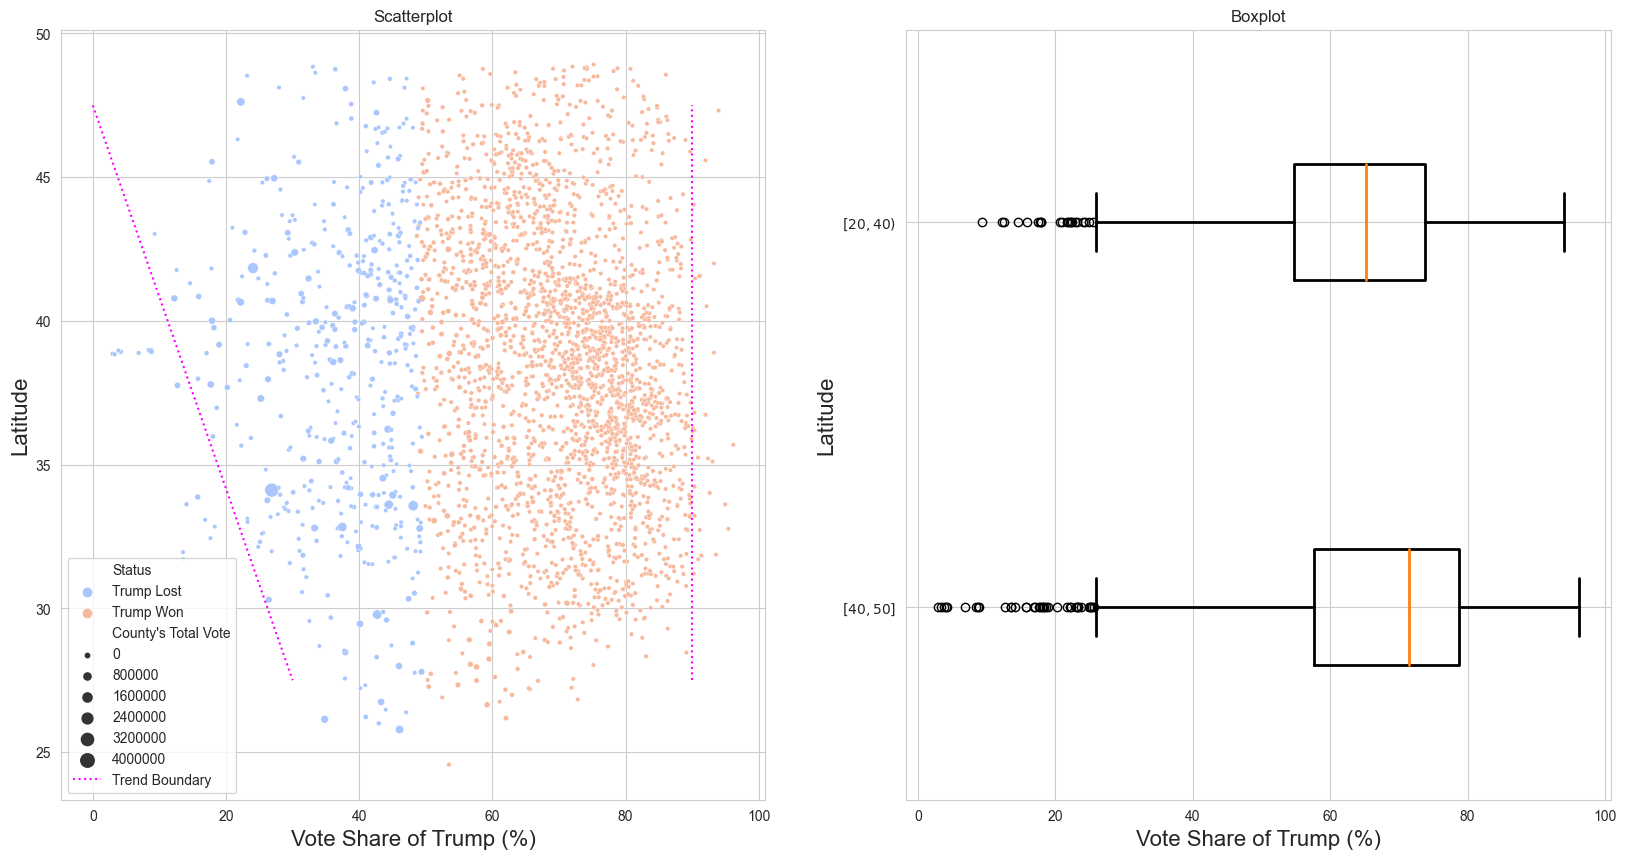

In [394]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

# Scatter plot
sns.scatterplot(data=df_county_geo, x="trump_vote_share",
                y='lat', hue="won", size="county_total_votes",
                palette="coolwarm", sizes=(10, 100), ax=ax1)

ax1.plot([0, 30], [47.5, 27.5], color="magenta", linestyle=':', label='Trend Boundary')
ax1.plot([90, 90], [27.5, 47.5], color="magenta", linestyle=':')
ax1.legend(loc=3)

legend_labels = ax1.get_legend().get_texts()
for i, label in enumerate(legend_labels):
    if i == 0:
        label.set_text("Status")
    if i == 1:
        label.set_text("Trump Lost")
    if i == 2:
        label.set_text("Trump Won")
    if i == 3:
        label.set_text("County's Total Vote")

ax1.set_title('Scatterplot')
ax1.set_xlabel("Vote Share of Trump (%)", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
ax1.set_ylabel("Latitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})

boxprops = dict(linewidth=2)
medianprops = dict(linewidth=2)
whiskerprops = dict(linewidth=2)
capprops = dict(linewidth=2)

# Create the box plot
ax2.boxplot([df_county_geo[df_county_geo['lat']<40]['trump_vote_share'],
            df_county_geo[df_county_geo['lat']>=40]['trump_vote_share']],
            vert=False, widths=0.3,
            boxprops=boxprops, medianprops=medianprops,
            whiskerprops=whiskerprops, capprops=capprops)

# Set the group labels
ax2.set_yticklabels([r'$[40, 50]$', r'$[20, 40)$'])

# Set the title and axis labels
ax2.set_title('Boxplot')
ax2.set_ylabel("Latitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
ax2.set_xlabel("Vote Share of Trump (%)", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})

#plt.suptitle("Vote Share of Trump vs Latitude", fontsize=18)

plt.show()

Looking at the scatterplot, we can observe that on the red side where Trump had won, the dots are evenly distributed on both sides of the 39th parallel north, which is the horizontal line dividing the plot into two parts. This indicates that if Trump wins a county, the likelihood of it being located at any latitude is random, and the advantage that Trump has over his opponent is also random, regardless of its geographical location. This suggests that Trump's popularity and vote share in these counties are not significantly influenced by geographical factors. On the other hand, the blue side where Trump had lost shows a distinctive convergence to the South on the left side of the plot. This suggests that Trump is more unlikely to gain very low support in the South.

On the boxplot, we can observe that the counties on the South (lower than 40 degrees of latitude) have higher Trump's vote share on the 25%, 50%, and 75% quantiles of the boxplot. Although the divergence is noticeable it is not huge, only roughly about 5%.

Combining both sides, the graph shows that when Trump win, it is not predictable to know the county is in the north or south, but when Trump loses very hard - only received 20% or less of the vote - it is more likely to happen in the north. This suggests that geographical factors may have effective indications on the outcome of the election in these counties.

#### Trump Vote Share Versus Longitude
After analyzing the relationship between Trump's vote share and latitude, it is also essential to examine the variable of longitude. The following graph displays longitude on the x-axis, reorganizing the US map by the North-South direction, with counties that Trump won at the top and those he lost at the bottom. East counties are still on the right side of the plot, and the west counties are still on the left.

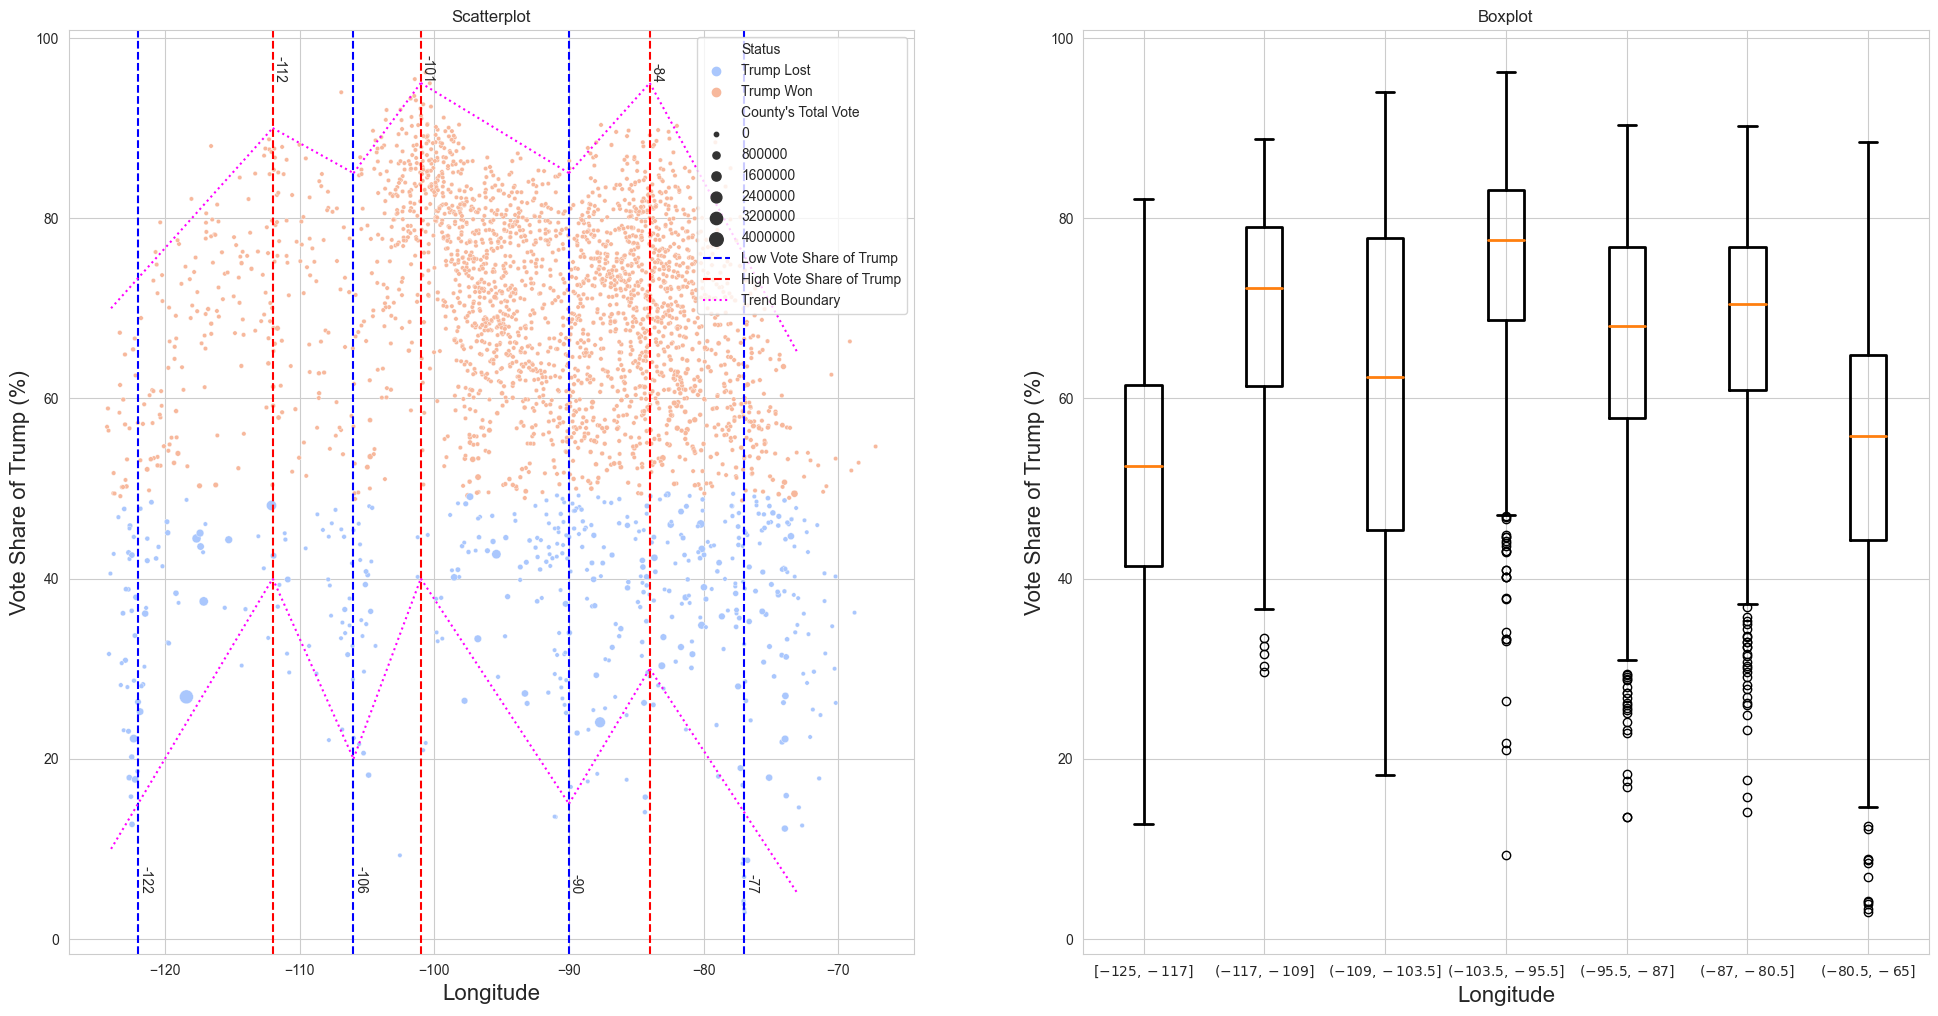

In [395]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,12))
sns.scatterplot(data=df_county_geo, x="lng",
                y='trump_vote_share', hue="won", size="county_total_votes",
                palette="coolwarm", sizes=(10, 100), ax=ax1)
ax1.axvline(x=-122, color='blue', linestyle='dashed', label='Low Vote Share of Trump')
ax1.legend()
ax1.text(-122, 5, '-122', rotation=-90, va='bottom', ha='left')
ax1.axvline(x=-112, color='red', linestyle='dashed', label='High Vote Share of Trump')
ax1.legend()
ax1.text(-112, 95, '-112', rotation=-90, va='bottom', ha='left')
ax1.axvline(x=-106, color='blue', linestyle='dashed')
ax1.text(-106, 5, '-106', rotation=-90, va='bottom', ha='left')
ax1.axvline(x=-101, color='red', linestyle='dashed')
ax1.text(-101, 95, '-101', rotation=-90, va='bottom', ha='left')
ax1.axvline(x=-90, color='blue', linestyle='dashed')
ax1.text(-90, 5, '-90', rotation=-90, va='bottom', ha='left')
ax1.axvline(x=-84, color='red', linestyle='dashed')
ax1.text(-84, 95, '-84', rotation=-90, va='bottom', ha='left')
ax1.axvline(x=-77, color='blue', linestyle='dashed')
ax1.text(-77, 5, '-77', rotation=-90, va='bottom', ha='left')

ax1.plot([-124, -112], [10, 40], color="magenta", linestyle=':', label='Trend Boundary')
ax1.legend()
ax1.plot([-124, -112], [70, 90], color="magenta", linestyle=':')
ax1.plot([-112, -106], [40, 20], color="magenta", linestyle=':')
ax1.plot([-112, -106], [90, 85], color="magenta", linestyle=':')
ax1.plot([-106, -101], [20, 40], color="magenta", linestyle=':')
ax1.plot([-106, -101], [85, 95], color="magenta", linestyle=':')
ax1.plot([-101, -90], [40, 15], color="magenta", linestyle=':')
ax1.plot([-101, -90], [95, 85], color="magenta", linestyle=':')
ax1.plot([-90, -84], [15, 30], color="magenta", linestyle=':')
ax1.plot([-90, -84], [85, 95], color="magenta", linestyle=':')
ax1.plot([-84, -73], [30, 5], color="magenta", linestyle=':')
ax1.plot([-84, -73], [95, 65], color="magenta", linestyle=':')
ax1.legend(loc=1)

legend_labels = ax1.get_legend().get_texts()
for i, label in enumerate(legend_labels):
    if i == 0:
        label.set_text("Status")
    if i == 1:
        label.set_text("Trump Lost")
    if i == 2:
        label.set_text("Trump Won")
    if i == 3:
        label.set_text("County's Total Vote")

ax1.set_xlabel("Longitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
ax1.set_ylabel("Vote Share of Trump (%)", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
ax1.set_title('Scatterplot')

# Create the box plot
ax2.boxplot([df_county_geo[df_county_geo['lng']<=-117]['trump_vote_share'],
             df_county_geo[(df_county_geo['lng']>-117) & (df_county_geo['lng']<=-109)]['trump_vote_share'],
             df_county_geo[(df_county_geo['lng']>-109) & (df_county_geo['lng']<=-103.5)]['trump_vote_share'],
             df_county_geo[(df_county_geo['lng']>-103.5) & (df_county_geo['lng']<=-95.5)]['trump_vote_share'],
             df_county_geo[(df_county_geo['lng']>-95.5) & (df_county_geo['lng']<=-87)]['trump_vote_share'],
             df_county_geo[(df_county_geo['lng']>-87) & (df_county_geo['lng']<=-80.5)]['trump_vote_share'],
             df_county_geo[df_county_geo['lng']>-80.5]['trump_vote_share']],
            widths=0.3,
            boxprops=boxprops, medianprops=medianprops,
            whiskerprops=whiskerprops, capprops=capprops)


# Set the group labels
ax2.set_xticklabels([r'$[-125,-117]$', r'$(-117, -109]$', r'$(-109, -103.5]$', r'$(-103.5, -95.5]$', r'$(-95.5, -87]$', r'$(-87, -80.5]$', r'$(-80.5, -65]$'])

# Set the title and axis labels
ax2.set_title('Boxplot')
ax2.set_ylabel("Vote Share of Trump (%)", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
ax2.set_xlabel("Longitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})

#plt.suptitle("Vote Share of Trump vs Longitude", fontdict={'family': 'sans-serif', 'size': 18})
plt.show()

The scatterplot of longitude against the share of Trump votes reveals a very interesting pattern of distribution. As we move from the farthest west (longitude -122) to the east, we observe that the general votes are relatively unfavored for Donald Trump. However, as we move slightly to the east (longitude -112), we see a local peak in the Trump's vote share. Continuing eastward to longitude -106, we see a local dive in the vote share. This pattern continues, and we observe four total dives at longitudes -122, -106, -90, and -77, and three peaks in between them at longitudes -112, -101, and -84.

This wave-like movement of Trump's vote share from west to east is a fascinating phenomenon that may be influenced by several factors, such as population density, regional culture and values, and historical context. However, the exact cause of this pattern is beyond the scope of this analysis and requires further research. It is possible that future studies may shed light on the underlying reasons for this phenomenon and help us better understand the complex interplay between geography and politics in the United States.

#### Geographical Distribution of Trump Share Votes
By combining the latitude and longitude graph, we have a comprehensive map that illustrates the Trump share of votes in the US mainland. The map is divided into areas represented by blue and red lines, where the blue lines represent areas with lower Trump share, and the red lines represent areas with higher Trump share.

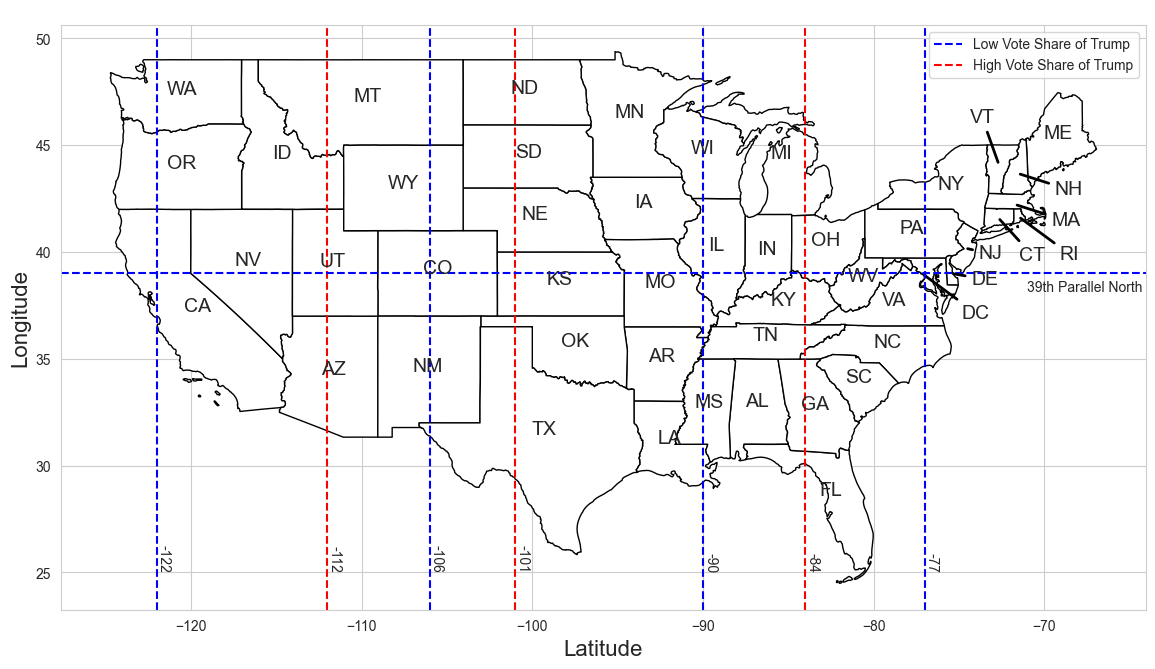

In [396]:
fig, gax = plt.subplots(1, figsize=(14, 8))
ax = fig.add_subplot()
gpd_state4.plot(ax=ax, edgecolor="black", color="white")
plt.axvline(x=-122, color='blue', linestyle='dashed', label='Low Vote Share of Trump')
plt.legend()
plt.text(-122, 25, '-122', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-112, color='red', linestyle='dashed', label='High Vote Share of Trump')
plt.legend()
plt.text(-112, 25, '-112', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-106, color='blue', linestyle='dashed')
plt.text(-106, 25, '-106', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-101, color='red', linestyle='dashed')
plt.text(-101, 25, '-101', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-90, color='blue', linestyle='dashed')
plt.text(-90, 25, '-90', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-84, color='red', linestyle='dashed')
plt.text(-84, 25, '-84', rotation=-90, va='bottom', ha='left')
plt.axvline(x=-77, color='blue', linestyle='dashed')
plt.text(-77, 25, '-77', rotation=-90, va='bottom', ha='left')
plt.axhline(y=39, color='blue', linestyle='dashed')
plt.text(-71, 38, '39th Parallel North', rotation=0, va='bottom', ha='left')

for idx, row in gpd_state4.iterrows():
    name = row['STUSPS']
    if name in ['VT', 'NH', 'MA', 'RI', 'CT', 'NJ', 'MD', 'DE', 'DC']:
        coords = row.geometry.centroid.coords[0]
        if name in ['MA', 'NH', 'JE']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-1),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['VT']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]-1, coords[1]+2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['NJ']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+1.5, coords[1]-0.5),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['RI']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['CT']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+2, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['DE']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+2, coords[1]-0.5),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
        elif name in ['DC']:
            ax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=2))
    else:
        ax.annotate(text=name, xy=row.geometry.centroid.coords[0], ha='center', fontsize=14)
gax.axis('off')
#plt.title("Vote Share of Trump Distribution Map", fontdict={'family': 'sans-serif', 'size': 18})
plt.xlabel("Latitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.ylabel("Longitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.show()

The map shows that the areas with the highest Trump share are mostly located in the central and southern regions of the country, where more small counties are located. These regions include Texas, Oklahoma, Arkansas, Louisiana, Mississippi, Alabama, Tennessee, Kentucky, West Virginia, and parts of Georgia, South Carolina, and North Carolina. On the other hand, the areas with the lowest Trump share are mostly located in the western and northeastern regions of the country. These regions include California, Oregon, Washington, Minnesota, Illinois, Michigan, New York, Vermont, Massachusetts, Connecticut, and parts of New Hampshire, Maine, and Rhode Island.

The map also reveals a pattern of wave-like movement, where the Trump share of votes tends to peak and dive as we move from west to east. The peaks are located in the western part of Texas, eastern Colorado, and western Ohio, while the dives are located in the western part of Washington, eastern Montana, eastern Iowa, and western Pennsylvania.

Overall, the map provides a comprehensive and detailed view of the distribution of Trump share of votes in the US mainland. It highlights the regions where Trump was more popular and the regions where he was less popular, and it reveals a pattern of wave-like movement that may be worth exploring in future studies.

# Project Two
## The Message
The more the electoral system is leaning towards the smaller counties, the more likely Donald Trump is going to win the election.

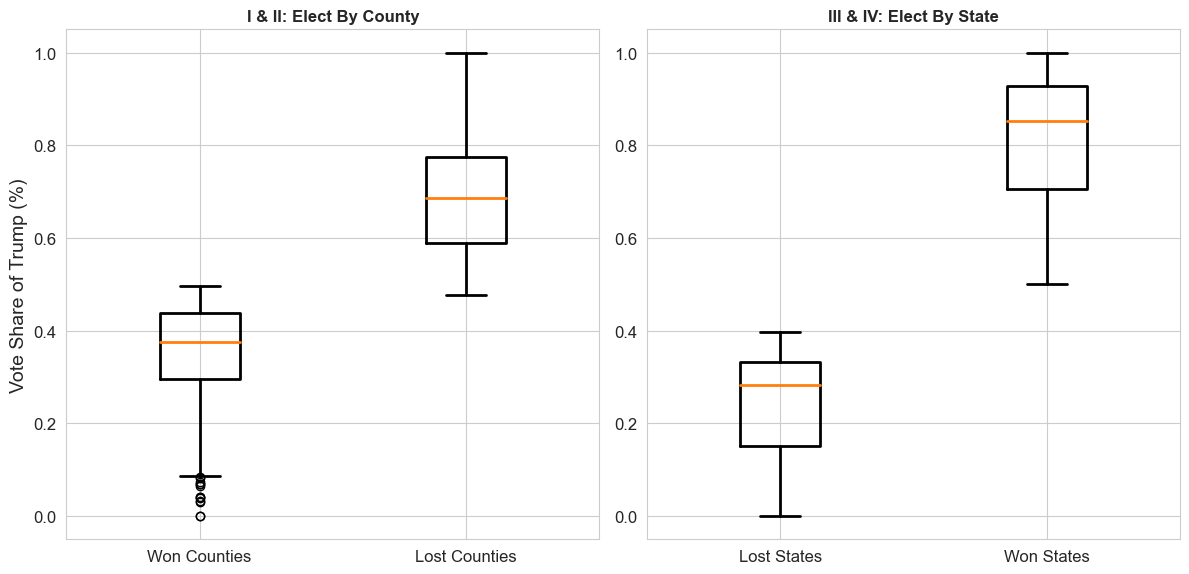

In [469]:
df_boxplot1 = pd.DataFrame({
    'share of votes in the winning counties': df_county_won['share of votes in the winning counties'],
})
df_boxplot1['Electoral Systems'] = 'share of votes in the winning counties'
df_boxplot1.rename(columns={'share of votes in the winning counties': 'Value'}, inplace=True)

df_boxplot2 = pd.DataFrame(data=df_county_lost, columns=['share of votes in the losing counties'])
df_boxplot2['Electoral Systems'] = 'share of votes in the losing counties'
df_boxplot2.rename(columns={'share of votes in the losing counties': 'Value'}, inplace=True)

df_boxplot1 = pd.concat([df_boxplot1, df_boxplot2])
df_boxplot1['Group'] = 'I & II: Elect By County'

df_boxplot3 = pd.DataFrame(data=df_state_won, columns=['share of counties in the winning states'])
df_boxplot3['Electoral Systems'] = 'share of counties in the winning states'
df_boxplot3.rename(columns={'share of counties in the winning states': 'Value'}, inplace=True)

df_boxplot4 = pd.DataFrame(data=df_state_lost, columns=['share of counties in the losing states'])
df_boxplot4['Electoral Systems'] = 'share of counties in the losing states'
df_boxplot4.rename(columns={'share of counties in the losing states': 'Value'}, inplace=True)

df_boxplot3 = pd.concat([df_boxplot3, df_boxplot4])
df_boxplot3['Group'] = 'III & IV: Elect By State'

df_boxplot = pd.concat([df_boxplot1, df_boxplot3])

fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

for i, (name, group) in enumerate(df_boxplot.groupby('Group')):
    ax = axes[i]
    group.boxplot(by='Electoral Systems', ax=ax, positions=[1, 2], widths=0.3,
                  boxprops=boxprops, medianprops=medianprops,
                  whiskerprops=whiskerprops, capprops=capprops)

    ax.set_xlabel('')

    if i == 0:
        ax.set_xticklabels(['Won Counties', 'Lost Counties'])
        ax.set_ylabel('Vote Share of Trump (%)', fontsize = 14)
    else:
        ax.set_xticklabels(['Lost States', 'Won States'], fontsize = 14)

    ax.set_title(name, fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=12)

#plt.suptitle('Distribution of Vote Share of Trump by Electoral System', fontweight='bold', fontsize=16)
plt.suptitle('', fontweight='bold', fontsize=1)
plt.tight_layout()
plt.show()


Recalling the two general types of electoral systems defined at the beginning of this paper:

*Elect By County:* A county casts all of its votes on the party (candidate) that won the majority of votes.

*Elect By State:* A state casts all of its votes on the party (candidate) that won the majority of counties.

According to these rules, if a county is large enough in the first general type, it has the potential to overstep multiple small counties using its large volume of votes. In contrast, in the second general type, since the decision-making level is at the state, and the majority of counties in a state are small counties, Donald Trump's victory would have been dominant.

The two groups of boxplots presented in this paper show a significant difference in the gap between losing and winning districts between the two general types of electoral systems. The first group, which stands for electing by county, shows that the gap between the two median quantiles marked by the color orange is about 0.3. In contrast, the second group, which represents electing by state, shows that the gap between the two median quantiles marked by the color orange is almost about 0.6, doubling the gap in the first group. A larger gap between the two median quantiles indicates a more overwhelming victory by Trump.

Overall, this observation suggests that the electoral system has a significant impact on the gap between losing and winning districts. This highlights the importance of understanding the weighing by the electoral system analyzing election results.

## Maps and Interpretations
To obtain a clearer representation of the US mainland, we removed Hawaii and Alaska from both county-level and state-level dataframes before generating the graphs.

In [161]:
df_county_mainland = df_county[~df_county["state"].isin(["Alaska", "Hawaii"])]
df_state_mainland = df_state2[~df_state2["state"].isin(["Alaska", "Hawaii"])]

### Electoral System $\mathrm{II}$ - Elect By County
The first electoral system we will examine is Electoral System I, where each county has same number of votes as its voters, and it casts all of its votes on the party (candidate) that won the majority of votes. The formulas been used are as below:

$$ \text{Fabricated Votes for Biden} = \sum \limits _{i=1} ^{|Counties|} (if \text{ Votes for Biden in a county} > \text{Votes for Trump in a county}), \text{Total Votes in a county}, 0) $$

$$ \text{Fabricated Votes for Trump} = \sum \limits _{i=1} ^{|Counties|} (if \text{ Votes for Biden in a county} < \text{Votes for Trump in a county}), \text{Total Votes in a county}, 0) $$

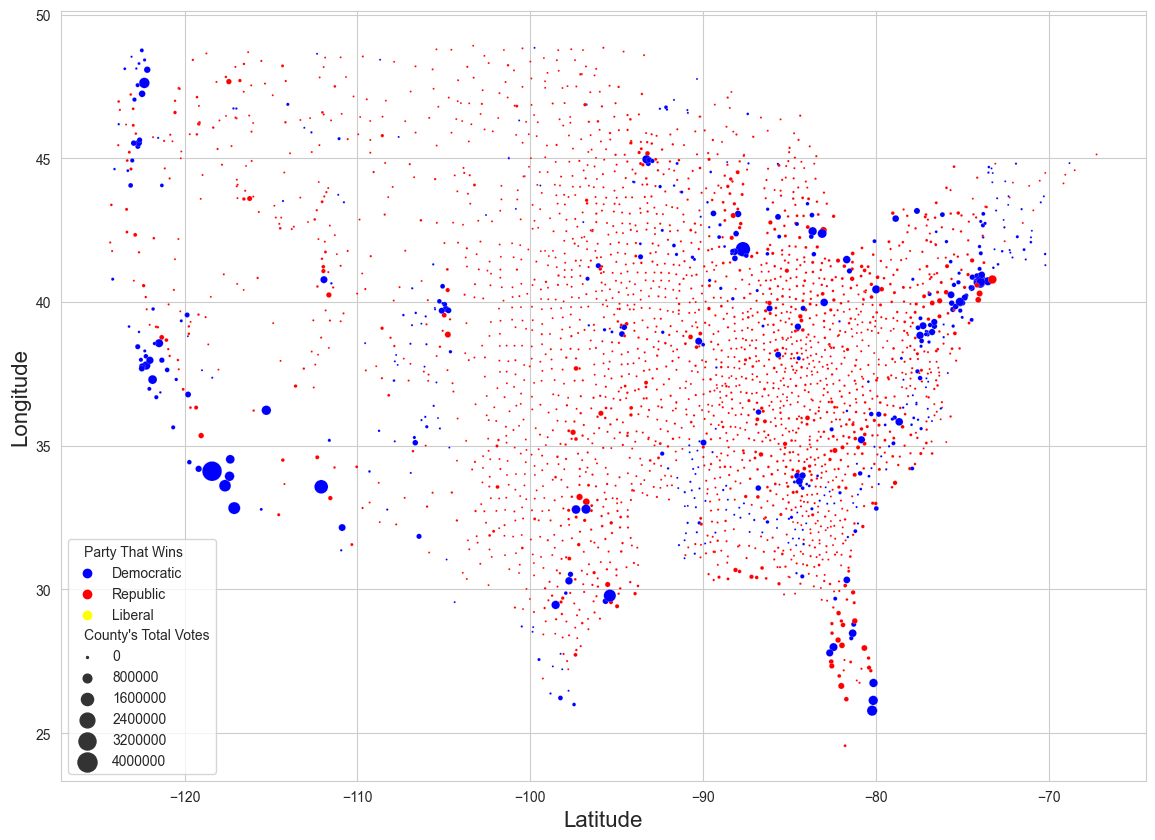

In [279]:
plt.figure(figsize = (14,10))
sns.scatterplot(data = df_county_mainland, x = "lng", y = "lat", hue = "party", size = "total_votes",
                sizes = (2, 200), palette = ['blue', 'red', 'yellow'])
#plt.title("Figure1: Electoral System I", fontdict={'family': 'sans-serif', 'size': 18})
plt.xlabel("Latitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.ylabel("Longitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
legend_labels = plt.gca().get_legend().get_texts()
for i, label in enumerate(legend_labels):
    if i == 0:
        label.set_text("Party That Wins")
    if i == 1:
        label.set_text("Democratic")
    if i == 2:
        label.set_text("Republic")
    if i == 3:
        label.set_text("Liberal")
    if i == 4:
        label.set_text("County's Total Votes")
plt.show()

In [163]:
y1 = df_county.groupby('party')['total_votes'].sum()['DEM']
y2 = df_county.groupby('party')['total_votes'].sum()['REP']
y3 = df_county.groupby('party')['total_votes'].sum()['LIB']
y4 = df_county.groupby('party')['total_votes'].sum()['WRI']
result_1 = [['DEM', 'Joe Biden', y1, max(y1, y2, y3, y4) == y1],
            ['REP', 'Donald Trump', y2, max(y1, y2, y3, y4) == y2],
            ['LIB', 'Jo Jorgensen', y3, max(y1, y2, y3, y4) == y3],
            ['WRI', 'Write-ins', y4, max(y1, y2, y3, y4) == y4]
            ]
df_result_1 = pd.DataFrame(result_1, columns = ['Party', 'Candidate', 'Fabricated Votes', 'Won'])
df_result_1

Party     Candidate  Fabricated Votes    Won
0   DEM     Joe Biden          94602377   True
1   REP  Donald Trump          64940909  False
2   LIB  Jo Jorgensen                42  False
3   WRI     Write-ins             64909  False

The Electoral System I assigns each county a number of votes equal to the number of registered voters in the county, and all of these votes are cast for the party (candidate) that received the majority of votes in that county.

According to the table, Joe Biden emerged as the winner with a total of 94,602,377 votes, and he won the election under this system. In the context of the 2020 United States presidential election, Joe Biden won the majority of votes in a number of megacities, which had a significant impact on the outcome of the election. Biden was able to accumulate a large number of electoral votes due to his success in densely populated areas. On the other hand, Donald Trump won a large number of counties but failed to secure enough votes from densely populated areas to win the election.

### Electoral System II - Elect By County
The second electoral system we will examine is Electoral System II, where each county has one vote, it casts its vote on the party (candidate) that won the majority of votes. The formulas been used are as below:

$$ \text{Fabricated Votes for Biden} = \sum \limits _{i=1} ^{|Counties|} (if \text{ Votes for Biden in a county} > \text{Votes for Trump in a county}), 1, 0) $$

$$ \text{Fabricated Votes for Trump} = \sum \limits _{i=1} ^{|Counties|} (if \text{ Votes for Biden in a county} < \text{Votes for Trump in a county}), 1, 0) $$

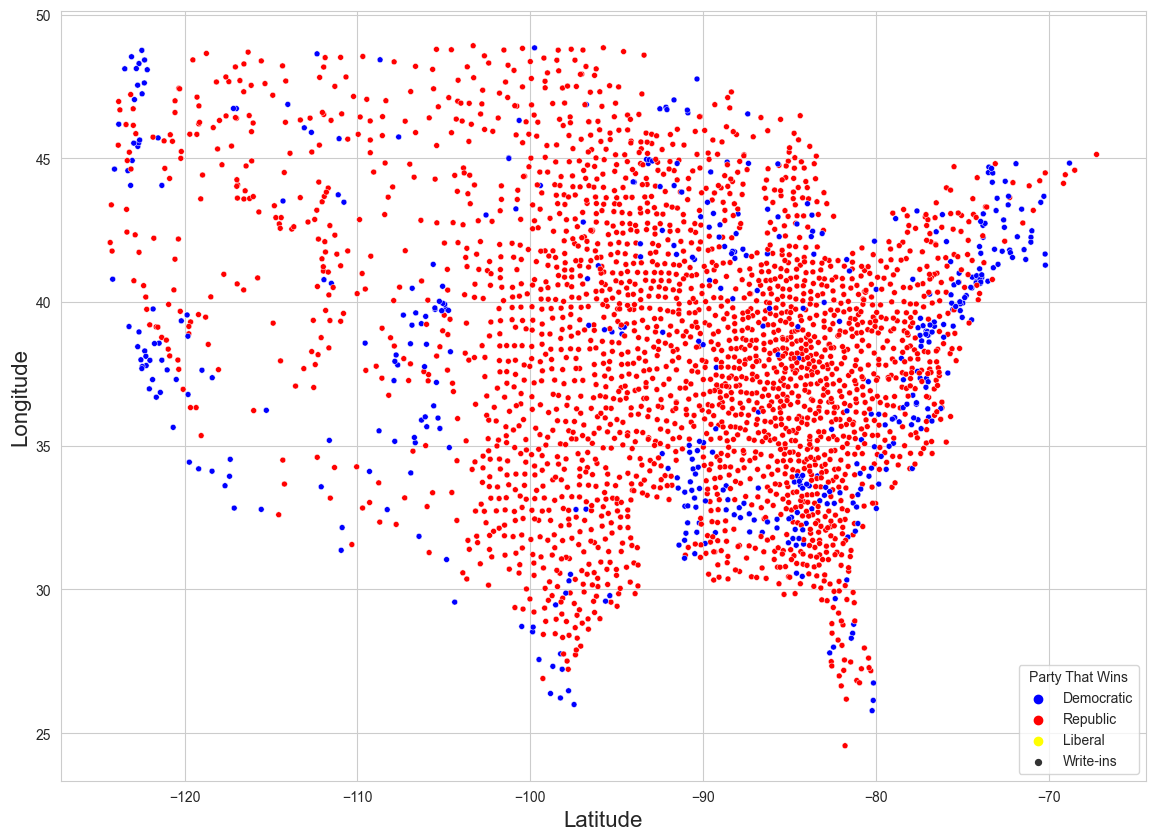

In [280]:
plt.figure(figsize = (14,10))
sns.scatterplot(data = df_county_mainland, x = "lng", y = "lat", hue = "party", size = 20, palette = ['blue', 'red', 'yellow'])
#plt.title("Electoral System II", fontdict={'family': 'sans-serif', 'size': 18})
plt.xlabel("Latitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.ylabel("Longitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.legend(title='Party That Wins', loc='lower right')
legend_labels = plt.gca().get_legend().get_texts()
for i, label in enumerate(legend_labels):
    if i == 0:
        label.set_text("Democratic")
    if i == 1:
        label.set_text("Republic")
    if i == 2:
        label.set_text("Liberal")
    if i == 3:
        label.set_text("Write-ins")
plt.show()

In [165]:
y1 = df_county['party'].value_counts()['DEM']
y2 = df_county['party'].value_counts()['REP']
y3 = df_county['party'].value_counts()['LIB']
y4 = df_county['party'].value_counts()['WRI']
result_2 = [['DEM', 'Joe Biden', y1, max(y1, y2, y3, y4) == y1],
            ['REP', 'Donald Trump', y2, max(y1, y2, y3, y4) == y2],
            ['LIB', 'Jo Jorgensen', y3, max(y1, y2, y3, y4) == y3],
            ['WRI', 'Write-ins', y4, max(y1, y2, y3, y4) == y4]
            ]
df_result_2 = pd.DataFrame(result_2, columns = ['Party', 'Candidate', 'Fabricated Votes', 'Won'])
df_result_2

Party     Candidate  Fabricated Votes    Won
0   DEM     Joe Biden              1409  False
1   REP  Donald Trump              3220   True
2   LIB  Jo Jorgensen                 1  False
3   WRI     Write-ins                 3  False

Electoral System II assigns each county a single vote, which is cast for the party (candidate) that won the majority of votes in that county. Under this system, Donald Trump emerged as the winner, with a significant lead over Joe Biden. This is in contrast to the outcome under Electoral System I, where Biden was declared the winner. The difference in the results can be attributed to the fact that in Electoral System II, all counties are weighted equally, regardless of their population or number of registered voters. As a result, Trump's popularity in small counties and traditional Republican strongholds gave him an advantage under this system. In addition, the fact that each county is weighted equally means that the influence of larger urban areas, which tend to lean Democratic, is minimized, leading to a more Republican-leaning outcome.

### Electoral System III - Elect By State
The third electoral system we will examine is Electoral System III, where each state has same number of votes as its voters, it casts all of its votes on the party (candidate) that won the majority of counties. The formulas been used are as below:

$$ \text{Fabricated Votes for Biden} = \sum \limits _{i=1} ^{|States|} (if \text{ State Votes for Biden} > \text{State Votes for Trump}, \text{Total Votes of }State_{i}, 0) $$

$$ \text{Fabricated Votes for Trump} = \sum \limits _{i=1} ^{|States|} (if \text{ State Votes for Biden} < \text{State Votes for Trump}, \text{Total Votes of }State_{i}, 0) $$

$$ \text{State Votes for Biden} = \sum \limits _{j=1} ^{|\text{Counties in a }state_i|} (if \text{ Votes for Biden in a county} > \text{Votes for Trump in a county}, 1, 0) $$

$$ \text{State Votes for Trump} = \sum \limits _{j=1} ^{|\text{Counties in a }state_i|} ((if \text{ Votes for Biden in a county} < \text{Votes for Trump in a county}, 1, 0) $$

$$ \text{Total Votes of }State_{i} = \sum \limits _{j=1} ^{|\text{Counties in a }state_i|} \text{Total Votes in a county} $$

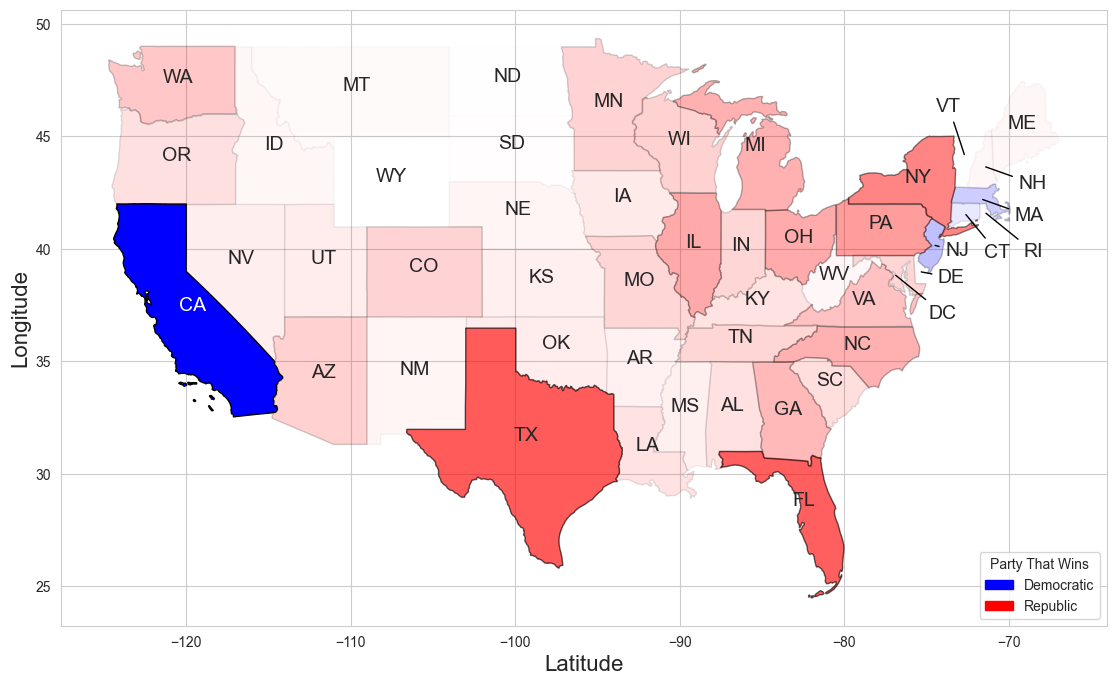

In [281]:
fig, gax= plt.subplots(figsize=(14, 8))

# Define color mapping
colors = {'DEM': 'blue', 'REP': 'red'}

# Define minimum and maximum values for color scale
vmin = gpd_state4['total_votes'].min()
vmax = gpd_state4['total_votes'].max()

# Plot each state with the appropriate color and shade
for index, row in gpd_state4.iterrows():
    color = colors.get(row['party'], 'gray')
    total_votes = row['total_votes']
    shade = (total_votes - vmin) / (vmax - vmin)
    gpd_state4[gpd_state4.index == index].plot(ax=gax, color=color, edgecolor='black', linewidth=1, alpha=shade)

# Add legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors.values()]
labels = colors.keys()
gax.legend(handles, labels, loc='lower right')

for idx, row in gpd_state4.iterrows():
    name = row['STUSPS']
    if name in ['VT', 'NH', 'MA', 'RI', 'CT', 'NJ', 'MD', 'DE', 'DC', 'CA']:
        coords = row.geometry.centroid.coords[0]
        if name in ['MA', 'NH', 'JE']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-1),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black'))
        elif name in ['VT']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]-1, coords[1]+2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black'))
        elif name in ['NJ']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+1.5, coords[1]-0.5),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black'))
        elif name in ['RI', 'DC']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black'))
        elif name in ['CT']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+2, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black'))
        elif name in ['DE']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+2, coords[1]-0.5),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black'))
        elif name in ['CA']:
            gax.annotate(text=name, xy=row.geometry.centroid.coords[0], ha='center', fontsize=14, color = 'white')
    else:
        gax.annotate(text=name, xy=row.geometry.centroid.coords[0], ha='center', fontsize=14)

# Set plot title
#plt.title("Electoral System III", fontdict={'family': 'sans-serif', 'size': 18})
plt.xlabel("Latitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.ylabel("Longitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})

# Add legend
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors.values()]
labels = ['Democratic', 'Republic']
legend = gax.legend(handles, labels, loc='lower right')

# Set legend title
legend.set_title("Party That Wins")

# Show plot
plt.show()


In [167]:
y1 = df_state2.groupby('party')['total_votes'].sum()['DEM']
y2 = df_state2.groupby('party')['total_votes'].sum()['REP']
try:
    y3 = df_state2.groupby('party')['total_votes'].sum()['LIB']
except KeyError:
    y3 = 0
try:
    y4 = df_state2.groupby('party')['total_votes'].sum()['WRI']
except KeyError:
    y4 = 0
result_3 = [['DEM', 'Joe Biden', y1, max(y1, y2, y3, y4) == y1],
            ['REP', 'Donald Trump', y2, max(y1, y2, y3, y4) == y2],
            ['LIB', 'Jo Jorgensen', y3, max(y1, y2, y3, y4) == y3],
            ['WRI', 'Write-ins', y4, max(y1, y2, y3, y4) == y4]
            ]
df_result_3 = pd.DataFrame(result_3, columns = ['Party', 'Candidate', 'Fabricated Votes', 'Won'])
df_result_3

Party     Candidate  Fabricated Votes    Won
0   DEM     Joe Biden          29822468  False
1   REP  Donald Trump         129785769   True
2   LIB  Jo Jorgensen                 0  False
3   WRI     Write-ins                 0  False

Under Electoral System III, Donald Trump won this system with a significant lead over Joe Biden. This can be attributed to the fact that Trump won the majority of counties in many states, including those with a higher number of rural counties. In contrast, Biden's support was mainly concentrated in urban areas and some Democrat's conservative base states. The result is notably different from the previous two systems, as the number of small counties is significantly higher than the number of large counties, and that the state-level decision is purely based on which candidate wins the majority counties. This system gives substantial advantage to Donald Trump, due to the popularity of his policy among people live in the small towns and rural regions. In Electoral System III, because the number of counties won by a party (candidate) plays a significant role in determining the winner, while in the previous two systems, the total number of votes won by a party (candidate) was the deciding factor, the system heavily leans towards small counties rather than populated cities.

### Electoral System IV - Elect By State
The last electoral system we will examine is Electoral System IV, where each state has one vote, it casts all of its votes on the party (candidate) that won the majority of counties. The formulas been used are as below:

$$ \text{Fabricated Votes for Biden} = \sum \limits _{i=1} ^{|States|} (if \text{ State Votes for Biden} > \text{State Votes for Trump}, 1, 0) $$

$$ \text{Fabricated Votes for Trump} = \sum \limits _{i=1} ^{|States|} (if \text{ State Votes for Biden} < \text{State Votes for Trump}, 1, 0) $$

$$ \text{State Votes for Biden} = \sum \limits _{j=1} ^{|\text{Counties in a }state_i|} (if \text{ Votes for Biden in a county} > \text{Votes for Trump in a county}, 1, 0) $$

$$ \text{State Votes for Trump} = \sum \limits _{j=1} ^{|\text{Counties in a }state_i|} ((if \text{ Votes for Biden in a county} < \text{Votes for Trump in a county}, 1, 0) $$

$$ \text{Total Votes of }State_{i} = \sum \limits _{j=1} ^{|\text{Counties in a }state_i|} \text{Total Votes in a county} $$

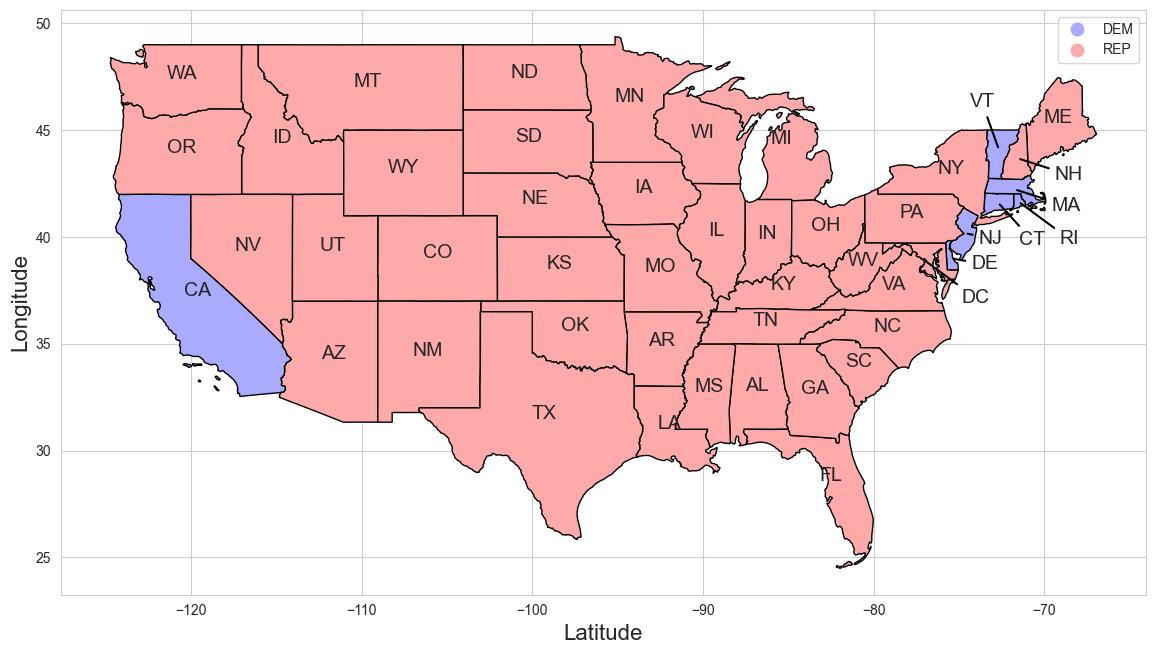

In [282]:
fig, gax= plt.subplots(1, figsize = (14,8))
gpd_state4.plot(ax=gax, edgecolor='black', column='party', legend=True, cmap='bwr', categorical=True, vmin=-1, vmax=2)
for idx, row in gpd_state4.iterrows():
    name = row['STUSPS']
    if name in ['VT', 'NH', 'MA', 'RI', 'CT', 'NJ', 'MD', 'DE', 'DC']:
        coords = row.geometry.centroid.coords[0]
        if name in ['MA', 'NH', 'JE']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-1),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=1.5))
        elif name in ['VT']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]-1, coords[1]+2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=1.5))
        elif name in ['NJ']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+1.5, coords[1]-0.5),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=1.5))
        elif name in ['RI']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=1.5))
        elif name in ['CT']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+2, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=1.5))
        elif name in ['DE']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+2, coords[1]-0.5),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=1.5))
        elif name in ['DC']:
            gax.annotate(text=name, xy=coords, xytext=(coords[0]+3, coords[1]-2),
                        ha='center', fontsize=14, arrowprops=dict(arrowstyle="-", color='black', linewidth=1.5))
    else:
        gax.annotate(text=name, xy=row.geometry.centroid.coords[0], ha='center', fontsize=14)
#plt.title("Electoral System IV", fontdict={'family': 'sans-serif', 'size': 18})
plt.xlabel("Latitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.ylabel("Longitude", fontdict={'family': 'sans-serif', 'size': 16, 'weight': 'normal'})
plt.show()

In [169]:
y1 = df_state1['party'].value_counts()['DEM']
y2 = df_state1['party'].value_counts()['REP']
try:
    y3 = df_state1['party'].value_counts()['LIB']
except KeyError:
    y3 = 0
try:
    y4 = df_state1['party'].value_counts()['WRI']
except KeyError:
    y4 = 0
result_4 = [['DEM', 'Joe Biden', y1, max(y1, y2, y3, y4) == y1],
            ['REP', 'Donald Trump', y2, max(y1, y2, y3, y4) == y2],
            ['LIB', 'Jo Jorgensen', y3, max(y1, y2, y3, y4) == y3],
            ['WRI', 'Write-ins', y4, max(y1, y2, y3, y4) == y4]
            ]
df_result_4 = pd.DataFrame(result_4, columns = ['Party', 'Candidate', 'Fabricated Votes', 'Won'])
df_result_4

Party     Candidate  Fabricated Votes    Won
0   DEM     Joe Biden                 9  False
1   REP  Donald Trump                42   True
2   LIB  Jo Jorgensen                 0  False
3   WRI     Write-ins                 0  False

Under Electoral System IV, Donald Trump emerges as the winner under this system with 42 votes, while Joe Biden receives only 9 votes. The ratio of victory is even higher than the ratio in Electoral System III.

The reason why Trump wins even more under this system compared to Electoral System III is that this system places higher emphasis on the number of counties won rather than the number of votes. This system ignores the huge population supporting the Democatic Party in California, making the scale tip further towards Trump. Without the pressure from the california population, Trump won a higher number of counties in most states, and this allowed him to win the majority of states and, subsequently, the election.

However, it's worth noting that this system is not reflective of the principle of "one person, one vote." It gives more weight to less populous states and ignores the popular vote. This system can lead to an unfair result where the candidate who receives fewer votes nationwide can still win the election if they win the majority of states.

### Summary of Four Electoral Systems

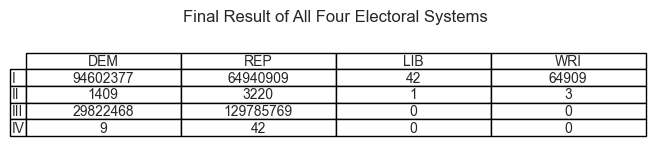

In [170]:
result = df_result_1.copy()
result.drop(['Candidate', 'Won'], axis = 1, inplace = True)
result.rename(columns={"Fabricated Votes": "I"}, inplace = True)
result = result.T
new_header = result.iloc[0]
result = result[1:]
result.columns = new_header

result_add = df_result_2.copy()
result_add.drop(['Candidate', 'Won'], axis = 1, inplace = True)
result_add.rename(columns={"Fabricated Votes": "II"}, inplace = True)
result_add = result_add.T
new_header = result_add.iloc[0]
result_add = result_add[1:]
result_add.columns = new_header
result = pd.concat([result, result_add])

result_add = df_result_3.copy()
result_add.drop(['Candidate', 'Won'], axis = 1, inplace = True)
result_add.rename(columns={"Fabricated Votes": "III"}, inplace = True)
result_add = result_add.T
new_header = result_add.iloc[0]
result_add = result_add[1:]
result_add.columns = new_header
result = pd.concat([result, result_add])

result_add = df_result_4.copy()
result_add.drop(['Candidate', 'Won'], axis = 1, inplace = True)
result_add.rename(columns={"Fabricated Votes": "IV"}, inplace = True)
result_add = result_add.T
new_header = result_add.iloc[0]
result_add = result_add[1:]
result_add.columns = new_header
result = pd.concat([result, result_add])

fig=plt.figure(figsize = (8, 0.3))
ax = fig.add_subplot(111)
ax.table(cellText = result.values, colLabels = result.columns,
         rowLabels = result.index, cellLoc = 'center')
ax.set_title ("Final Result of All Four Electoral Systems")
ax.axis ('off')
plt.show()

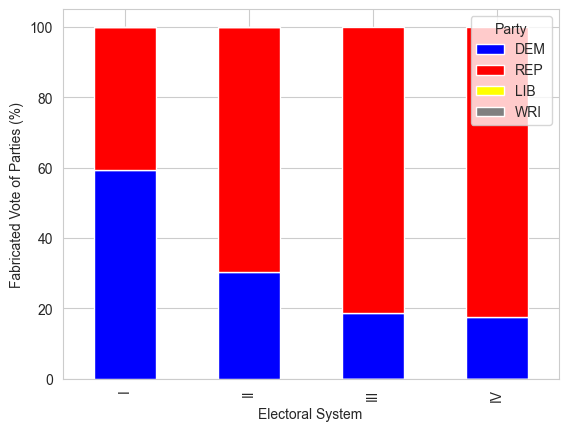

In [283]:
stacked_data = result.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, color = ['blue', 'red', 'yellow', 'grey'])
#plt.title("Final Result of All Four Electoral Systems")
plt.xlabel("Electoral System")
plt.ylabel("Fabricated Vote of Parties (%)")
plt.show()

The table above shows the number of votes for each party in four different hypothetical electoral systems. The summary suggests that Trump's advantage increases as we move from the first to the fourth system, as smaller counties carry more weight. This highlights the fact that Trump is more popular among people living in smaller counties.

Additionally, it is important to note that the number of votes for the Libertarian (LIB) and Write-in (WRI) parties are relatively small in all systems, indicating that they do not have significant support among voters.

# Project Three
## Potential Data to Scrape
### First Dataset: 2020 Presidential Campaign Funding
One potential addition to the campaign funding data by candidate and state in the 2020 US presidential election dataset could be web scraping data on funding sources by sector. By scraping data on the fundraising, we could gain insights into which sector were spending money to support or oppose the candidates, and by how much.

One potential website to scrape this data from is OpenSecrets.org, which is a website that tracks money in politics. OpenSecrets.org provides data on funding source by candidate and by sector, which could help shed light on which groups were most active in trying to influence the election on a state-level.

To have an understanding of how this data could be parallel on our previous findings, we can take a look at whether the funding from the argricultural sector confirmed that Trump's policy is more appealing to people and businesses in the rural places, so that he attracts more funding than Biden; and whether Biden's policy is more attractive to urban cities so that finance sector is more willing to support him rather than Trump.

The above are just examples on how we could then use this new information to help answer my research question, the discussion later in this chapter will analyze the data in detail.

### Second Dataset: 2020 Trump Presidential Campaigns

## Potential Challenges
### First Dataset: 2020 Presidential Campaign Funding
Firstly, the website does not provide all the data that we need in a single location or in a format that is easy to scrape. We need to scrape data from multiple pages or even multiple websites to gather all the relevant information.

Secondly, merging the scraped data with our existing dataset may require more information on a state-level, which the website does not provide complete information on. In future work, we can find such information either by searching in other websites, or we can contact the website holder OpenSecrets for a more detailed dataset.

Side Note: I have also found a dataset that contains contribution details including industry, organization name, amount and states on https://www.fec.gov/data/candidates/president/presidential-map/. However, the size of the file was too large to be handled, therefore I choose to not use this in Project 3.

Here is the file:

In [172]:
#df_candidate_funding = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/P00000001-ALL.csv')
#df_candidate_funding.head(10)

## Scraping Data from a Website
### First Dataset: 2020 Presidential Campaign Funding
Since the website I am working on does not have all the information on one page, therefore I have to run a for loop to scrape all the related HTML pages.

Create essential lists that will be used in scrapping. Since the funds can come from two channels, one is campaign committee, the other one is outside groups, we will also set a third channel which combines the previous two.

In [173]:
import requests
from bs4 import BeautifulSoup

In [174]:
sectors = ['Agribusiness', 'Communications/Electronics', 'Construction', 'Defense', 'Energy/Natural Resources', 'Finance/Insurance/Real Estate', 'Health', 'Lawyers & Lobbyists', 'Transportation', 'Misc Business', 'Labor', 'Ideology/Single-Issue', 'Other']

# Total funding from campaign committee and outside groups by sector
channel_combined = ['https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=A',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=B',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=C',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=D',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=E',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=F',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=H',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=K',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=M',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=N',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=P',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=Q',
                'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=W']

# Funding from campaign committee by sector
channel_campaign_committee = ['https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=A&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=B&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=C&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=D&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=E&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=F&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=H&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=K&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=M&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=N&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=P&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=Q&src=c',
                            'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=W&src=c']

# Funding from outside groups by sector
channel_outside_groups = ['https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=A&src=o',
                          'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=B&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=C&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=D&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=E&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=F&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=H&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=K&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=M&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=N&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=P&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=Q&src=o',
                        'https://www.opensecrets.org/2020-presidential-race/sector-totals?sector=W&src=o']

channel_fund = [channel_combined, channel_campaign_committee, channel_outside_groups]

In [175]:
# Part 1: Initializing the Data Structures
df_funds = list() #Creating an empty list to store all sector funds data.

# Part 2: Scraping Data for each channel (Combined, Campaign Committee, Outside Groups)
for fund in channel_fund:
    df_total_lists = [] # Creating an empty list to store each channel's data for all sectors
    for i in range(len(sectors)):
        totals = fund[i] # Generating the url to scrape data from
        response = requests.get(totals) # Requesting the web page for the url
        soup_object = BeautifulSoup(response.content, 'html.parser') # Parsing the html content using BeautifulSoup
        data_table = soup_object.find_all('table', 'DataTable')[0] # Finding the table containing the data we want to scrape
        all_values = data_table.find_all('tr') # Finding all rows in the table
        df_fund = pd.DataFrame(columns = ['Candidate', sectors[i]]) # Creating a DataFrame to store the scraped data for a single sector

        ix = 0 # Initializing the row index for the DataFrame
        # Scraping data from each row in the table and storing it in the DataFrame
        for row in all_values[1:]:
            values = row.find_all('td')
            candidate = values[0].text
            total = values[1].text
            df_fund.loc[ix] = [candidate, total]
            ix += 1

        df_total_lists.append(df_fund) # Storing the DataFrame for a single sector in the list of DataFrames for all sectors

    # Part 3: Merging Channel Data for fund
    # Performing a left join on the 'Candidate' column of all sector DataFrames
    df_channel_combined = df_total_lists[0]
    for df in df_total_lists[1:]:
        df_channel_combined = pd.merge(df_channel_combined, df, on='Candidate', how='left')

    df_funds.append(df_channel_combined)# Storing the merged DataFrame for a single channel in the list of all channel funds data

In [176]:
import re

# Part 4: Convert DataFrame tp plot-friendly
# Change the datatype from object to integer, and convert the unit into millions.
df_funds_copy = df_funds.copy()
for df_f in df_funds:
    for col in df_f.columns[1:]:
        df_f[col] = df_f[col].apply(lambda x: int(re.sub(r'\D', '', str(x))) if str(x) != 'nan' else 0)
        df_f[col] = df_f[col] / 1000000

### Second Scrapped Dataset: 2020 Trump Presidential Campaign

In [177]:
web_url = 'https://en.wikipedia.org/wiki/List_of_post%E2%80%932016_election_Donald_Trump_rallies'
response = requests.get(web_url)

soup_object = BeautifulSoup(response.content)

Rallies_2020=pd.DataFrame()

for i in [3,4,5]:

    data_table = soup_object.find_all('table', 'wikitable sortable')[i]
    all_values = data_table.find_all('tr')

    Rallies2020 = pd.DataFrame(columns = ['City', 'State', 'Venue', 'Other speakers'])
    ix = 0

    for row in all_values[1:]:
        values = row.find_all('td')

        city = values[0].text.split("\n")[0]
        if len(values[1].text.split("\n")[0]) == 2:
            state = values[1].text.split("\n")[0]
            venue = values[2].text.split("\n")[0]
            other = values[3].text.split("\n")[0]
        else:
            venue = values[1].text.split("\n")[0]
            other = values[2].text.split("\n")[0]
        Rallies2020.loc[ix] = [city, state, venue, other]
        ix += 1

    Rallies_2020 = pd.concat([Rallies_2020, Rallies2020], axis=0)

Rallies_2020.head()#A total of 100 rallies

City State                            Venue  \
0            El Paso    TX          El Paso County Coliseum   
1       Grand Rapids    MI                  Van Andel Arena   
2          Green Bay    WI                     Resch Center   
3  Panama City Beach    FL  Aaron Bessant Park Amphitheater   
4      Montoursville    PA    Williamsport Regional Airport   

                                      Other speakers  
0  Brad Parscale, John Cornyn, Lance Berkman, Ted...  
1                    Donald Trump Jr., Brad Parscale  
2  Mike Gallagher, Diamond and Silk, Sean Duffy, ...  
3                          Ron DeSantis, Marco Rubio  
4                                        Fred Keller

## Merging the Scraped Dataset
### First Dataset: 2020 Presidential Campaign Funding
The previous results achieved in Project 1 and 2 are mostly discussing the vote on a geographical level such as county or state. Since I introduced a new dimension - sector - in this section, it is not very suitable for merging the datasets together.

In [178]:
df_campaign = Rallies_2020.copy()
df_campaign.rename(columns={"State": "STUSPS"}, inplace = True)
df_campaign = pd.merge(df_campaign, gpd_state4[['STUSPS', 'NAME']], on='STUSPS', how='left')

name_counts = df_campaign['NAME'].value_counts()
df_campaign_num = pd.DataFrame({'NAME': name_counts.index, 'count': name_counts.values})

In [179]:
# Count entries in the first dataframe (total funding for sectors)
df_funds[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Candidate                      33 non-null     object 
 1   Agribusiness                   33 non-null     float64
 2   Communications/Electronics     33 non-null     float64
 3   Construction                   33 non-null     float64
 4   Defense                        33 non-null     float64
 5   Energy/Natural Resources       33 non-null     float64
 6   Finance/Insurance/Real Estate  33 non-null     float64
 7   Health                         33 non-null     float64
 8   Lawyers & Lobbyists            33 non-null     float64
 9   Transportation                 33 non-null     float64
 10  Misc Business                  33 non-null     float64
 11  Labor                          33 non-null     float64
 12  Ideology/Single-Issue          33 non-null     float

Up to this point, we have three dataframes of the same size, the total # of observations from the webscrapping is 33*14*3 = 1386

### Second Dataset: 2020 Trump Presidential Campaign
In recent years, political polarization has become a major issue in many countries, including the United States. It refers to the growing divide between people who hold different political beliefs, resulting in increased conflict and decreased cooperation. To measure the level of political polarization in each state, we introduce a Solid Indicator. This indicator calculates the difference in votes between the two major presidential candidates (Trump and Biden) in a state, relative to the votes for other candidates. This is an important indicator for our research paper as it allows us to better understand the extent of political polarization in each state, which can help us identify potential causes and consequences of polarization. Formula for Solid Indicator, which takes value from 0 to positive infinity:

$$ \text{Solid Indicator} = \frac{|\text{Total Votes for Trump in a state} - \text{Total Votes for Biden in a state}|}{\text{Total Votes for other candidates in a state}}$$

Based on this formula, the more dominate Trump or Biden is, the greater the indicator, the more politically polarized the state is.

In [180]:
df = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Kaggle/president_county_candidate.csv')
df.head()

state             county      candidate party  total_votes    won
0  Delaware        Kent County      Joe Biden   DEM        44552   True
1  Delaware        Kent County   Donald Trump   REP        41009  False
2  Delaware        Kent County   Jo Jorgensen   LIB         1044  False
3  Delaware        Kent County  Howie Hawkins   GRN          420  False
4  Delaware  New Castle County      Joe Biden   DEM       195034   True

In [448]:
df_copy2 = df.copy()

# create a new column to group candidates as "Donald Trump", "Joe Biden", or "Others"
df_copy2['Candidate_Group'] = df_copy2['candidate'].apply(lambda x: x if x in ['Donald Trump', 'Joe Biden'] else 'Others')

# group the data by state and candidate group and sum the total_votes column
grouped_df = df_copy2.groupby(['state', 'Candidate_Group'])['total_votes'].sum().reset_index()

# pivot the table on the Candidate_Group column
pivoted_df = grouped_df.pivot_table(index='state', columns='Candidate_Group', values='total_votes', aggfunc='sum').reset_index()

# rename the columns to the desired names
pivoted_df.columns = ['state', 'Donald Trump', 'Joe Biden', 'Others']

pivoted_df['Solid Indicator'] = (np.abs(pivoted_df['Donald Trump']-pivoted_df['Joe Biden'])/(pivoted_df['Others']+1)).apply(np.sqrt)
pivoted_df['Solid Indicator'] = pivoted_df['Solid Indicator'] * np.where(pivoted_df['Donald Trump']-pivoted_df['Joe Biden'] < 0, -1, 1)

pivoted_df.head()

state  Donald Trump  Joe Biden  Others  Solid Indicator
0     Alabama       1441168     849648   32488         4.266940
1      Alaska        189892     153405   48049         0.871410
2     Arizona       1661686    1672143   53497        -0.442115
3    Arkansas        760647     423932   34490         3.124484
4  California       6005961   11109764  380181        -3.663964

In [182]:
df_copy2 = df.copy()
df_copy2['Candidate_Group'] = df_copy2['candidate'].apply(lambda x: x if x in ['Donald Trump', 'Joe Biden'] else 'Others')
df_pivot = pd.pivot_table(df_copy2, values='total_votes', index=['state', 'county'], columns=['Candidate_Group'], aggfunc=np.sum, fill_value=0)
df_pivot = df_pivot.reset_index()
df_pivot.columns.name = None
df_pivot.columns = ['state', 'county', 'Donald Trump', 'Joe Biden', 'Others']
df_pivot['county'] = df_pivot['county'].replace(' County', '', regex=True)
df_pivot['Solid Indicator'] = (np.abs(df_pivot['Donald Trump']-df_pivot['Joe Biden'])/df_pivot['Others']).apply(np.log)
df_pivot = df_pivot.replace([np.inf, -np.inf], np.nan).dropna(subset=['Solid Indicator'], axis=0)
df_pivot['Polarization Indicator'] = (df_pivot['Donald Trump'] - df_pivot['Others'])/(df_pivot['Joe Biden'] - df_pivot['Others'])/(df_pivot['Donald Trump'] + df_pivot['Joe Biden'] + df_pivot['Others']).apply(np.log)

df_pivot.head()

state   county  Donald Trump  Joe Biden  Others  Solid Indicator  \
0  Alabama  Autauga         19838       7503     429         3.358739   
1  Alabama  Baldwin         83544      24578    1557         3.634200   
2  Alabama  Barbour          5622       4816      80         2.310057   
3  Alabama     Bibb          7525       1986      84         4.188752   
4  Alabama   Blount         24711       2640     237         4.533960   

   Polarization Indicator  
0                0.268157  
1                0.306877  
2                0.126358  
3                0.426677  
4                0.996052

In [183]:
df_pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4586 entries, 0 to 4632
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   4586 non-null   object 
 1   county                  4586 non-null   object 
 2   Donald Trump            4586 non-null   int64  
 3   Joe Biden               4586 non-null   int64  
 4   Others                  4586 non-null   int64  
 5   Solid Indicator         4586 non-null   float64
 6   Polarization Indicator  4586 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 286.6+ KB


The total # of observations from the webscrapping is 4633.

## Visualizing the Scraped Dataset
### First Dataset: 2020 Presidential Campaign Funding

In [184]:
# Loading dataframes
df0 = df_funds[0].copy()
df1 = df_funds[1].copy()
df2 = df_funds[2].copy()

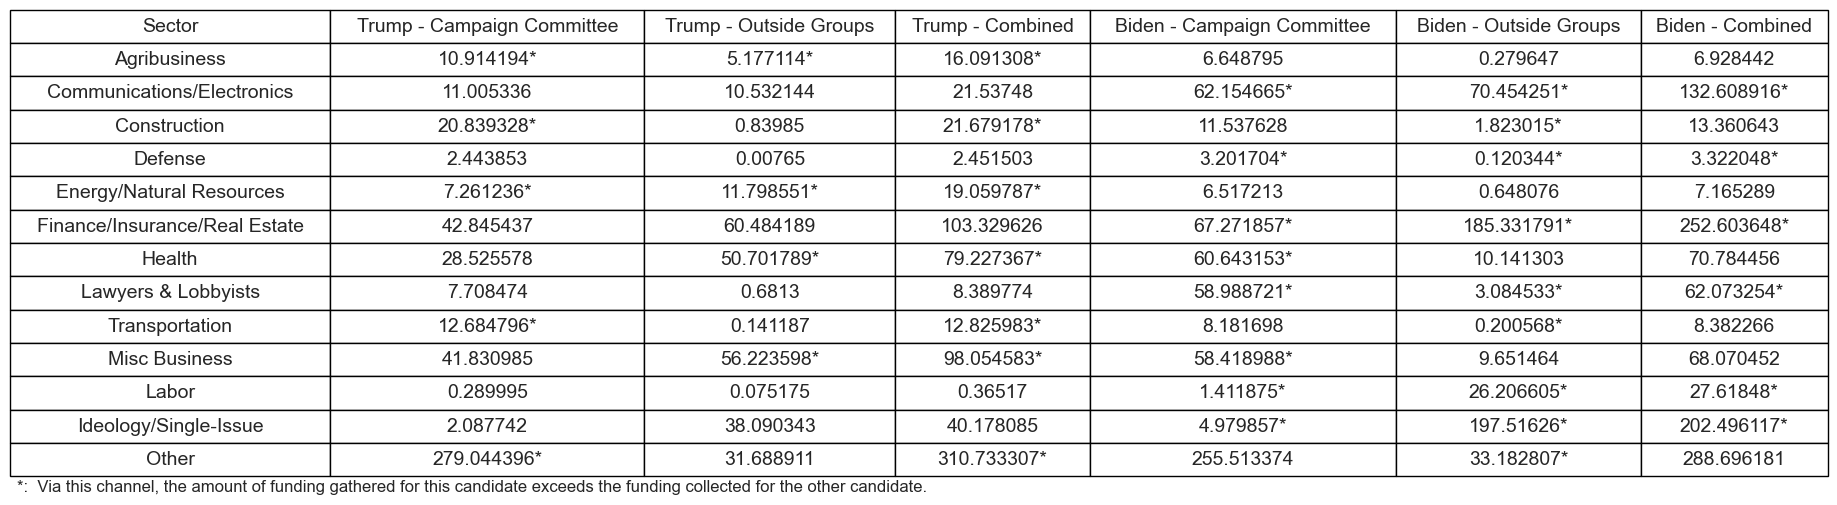

In [397]:
# TABLE
# Selecting needed rows from dataframes
trump_cc = pd.DataFrame(df1.iloc[0]).transpose()
trump_og = pd.DataFrame(df2.iloc[0]).transpose()
trump_c = pd.DataFrame(df0.iloc[0]).transpose()
biden_cc = pd.DataFrame(df1.iloc[1]).transpose()
biden_og = pd.DataFrame(df2.iloc[1]).transpose()
biden_c = pd.DataFrame(df0.iloc[1]).transpose()

# Combining all the rows to one dataframe
stacked_df = pd.concat([trump_cc, trump_og, trump_c, biden_cc, biden_og, biden_c], axis=0)
stacked_df['Candidate'] = ['Trump - Campaign Committee', 'Trump - Outside Groups', 'Trump - Combined', 'Biden - Campaign Committee', 'Biden - Outside Groups', 'Biden - Combined']
stacked_df.set_index('Candidate', inplace=True)
stacked_df = stacked_df.transpose()
stacked_df = stacked_df.reset_index().rename(columns={'index': 'Sector'})

# create function to compare and add asterisk
def add_asterisk(row):
    # compare columns 2 and 5
    if row[1] > row[4]:
        row[1] = str(row[1]) + '*'
    else:
        row[4] = str(row[4]) + '*'

    # compare columns 3 and 6
    if row[2] > row[5]:
        row[2] = str(row[2]) + '*'
    else:
        row[5] = str(row[5]) + '*'

    # compare columns 4 and 7
    if row[3] > row[6]:
        row[3] = str(row[3]) + '*'
    else:
        row[6] = str(row[6]) + '*'

    return row

# apply function to each row of dataframe
stacked_df = stacked_df.apply(add_asterisk, axis=1)

# create a figure and axis
fig, ax = plt.subplots()

# hide axis
ax.axis('off')

# create the table using the data in the dataframe
table = ax.table(cellText=stacked_df.values, colLabels=stacked_df.columns, loc='center', cellLoc='center')

# set the font size of the cells and header
table.set_fontsize(14)
table.auto_set_column_width(col=list(range(len(stacked_df.columns))))

# Set the height of the cells
table.scale(1, 2)

# Set the title of the table
#title = 'Funding by Industry, Candidate, and Channel (Millions of USD)'
#plt.text(0, 0.08, title, ha='center', va='top', fontsize=16)

# Hide the axis and turn off the axis lines and ticks
ax.axis('off')
ax.axis('tight')

# add note below the plot
note = "*:  Via this channel, the amount of funding gathered for this candidate exceeds the funding collected for the other candidate."
plt.text(-0.2, -0.075, note, ha='left', va='bottom', fontsize=12)

# Show the plot
plt.show()

To summarize the table, Trump received more funds than Biden on these sectors: Agribusiness, Construction, Energy/Natrual Resources, Health, Transportation, Misc Business, and Other; while Biden received more funds than Trump on these sectors: Communications/Electronics, Defense, Finance/Insurance/Real Estate, Lawyers & Lobbyists, Labor, and Ideology/Single-Issue.

Trump's focus on deregulation and reducing environmental protections may have made him more attractive to industries such as Agribusiness, Construction, and Energy/Natural Resources, which often face regulatory hurdles that can be costly and time-consuming. On the other hand, Biden's policies on climate change, healthcare, and workers' rights may have resonated more with the Communications/Electronics, Defense, and Labor sectors.

Furthermore, the support of certain industries for a particular candidate can also be influenced by the interests of the businesses or individuals within those industries. For instance, the Finance/Insurance/Real Estate sector may have supported Biden due to his policies on taxes and financial regulation, while the Lawyers & Lobbyists sector may have supported him due to his support for civil rights and social justice issues.

The fact that Trump received more funds than Biden in the Transportation and Health sectors could also be attributed to his administration's handling of the COVID-19 pandemic, which heavily impacted these industries. Trump's focus on reopening the economy and his skepticism towards public health measures may have resonated with certain businesses within these sectors.

Overall, the differences in funding received by Trump and Biden in different sectors highlight the complex interplay between policy positions, industry interests, and political strategy in the 2020 US Presidential election. It also suggests that different groups of voters may have been more attracted to either Trump's or Biden's policies, depending on their respective industries or personal interests.

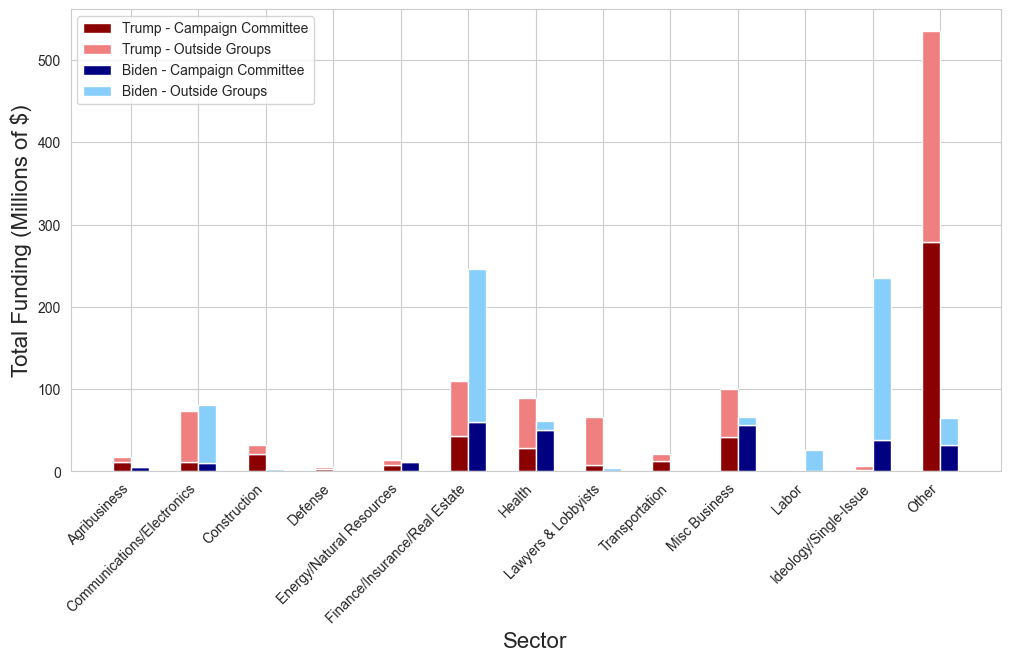

In [398]:
# PLOT
# define the column groups
groups = ['Agribusiness', 'Communications/Electronics', 'Construction', 'Defense', 'Energy/Natural Resources',
          'Finance/Insurance/Real Estate', 'Health', 'Lawyers & Lobbyists', 'Transportation', 'Misc Business',
          'Labor', 'Ideology/Single-Issue', 'Other']

# define the two candidates
candidates = ['Trump, Donald (R)', 'Biden, Joe (D)']

# define the x-axis positions for each group of bars
x_positions = np.arange(len(groups)) * 3

# define the bar width
bar_width = 0.8

# create the figure and axis objects
fig, ax = plt.subplots(figsize=(12, 6))

# define the labels for the legend
labels = ['Trump - Campaign Committee', 'Trump - Outside Groups', 'Biden - Campaign Committee', 'Biden - Outside Groups']

# loop over each group of columns
for i in range(1, df1.shape[1]):

    # get the data for this group from the two dataframes
    data1 = np.array([df1.loc[df1['Candidate'] == 'Trump, Donald (R)', df_funds[1].columns[i]].values[0],
                      df1.loc[df1['Candidate'] == 'Biden, Joe (D)', df_funds[1].columns[i]].values[0]])
    data2 = np.array([df2.loc[df2['Candidate'] == 'Trump, Donald (R)', df_funds[2].columns[i]].values[0],
                      df2.loc[df2['Candidate'] == 'Biden, Joe (D)', df_funds[2].columns[i]].values[0]])

    # calculate the x-axis positions for the two bars in this group
    x_pos_left = x_positions[i - 1] - bar_width / 2
    x_pos_right = x_positions[i - 1] + bar_width / 2

    # plot the bars for the two candidates, stacked on top of each other
    ax.bar(x_pos_left, data1[0], width=bar_width, label=labels[0], color='darkred')
    ax.bar(x_pos_left, data1[1], width=bar_width, bottom=data1[0], color='lightcoral')
    ax.bar(x_pos_right, data2[0], width=bar_width, label=labels[2], color='navy')
    ax.bar(x_pos_right, data2[1], width=bar_width, bottom=data2[0], color='lightskyblue')

# set the x-axis tick labels to be the group names
ax.set_xticks(x_positions)
ax.set_xticklabels(groups, rotation=45, ha = 'right')

# set the legend parameters
ax.legend(labels=labels, loc='upper left', title=None)

# set the axis labels and title
ax.set_xlabel('Sector', fontsize=16)
ax.set_ylabel('Total Funding (Millions of $)', fontsize=16)
#ax.set_title('Funding by Sector and Candidate', fontsize=18)

# show the plot
plt.show()

From the above bar chart, for both Trump and Biden, the funding from the outside groups is almost equal to if not larger than the funding from the campaign committee. The fact is significant for several reasons, particularly in relation to the 2020 US Presidential election.

Firstly, it suggests that the official campaign committees of both Trump and Biden may have been limited in their ability to raise funds, or may have chosen to focus their efforts elsewhere, such as on grassroots organizing or digital advertising. This could reflect a shift in campaign strategy towards more decentralized, bottom-up approaches to fundraising and mobilization.

Secondly, the fact that the outside groups' funding is almost equal to or larger than the campaign committee funding for both candidates suggests that the 2020 US Presidential election was fiercely competitive and hotly contested. Both campaigns were likely aware of the importance of funding in securing victory, and may have gone to great lengths to secure support from outside groups, particularly those with deep pockets and significant influence.

Overall, the significant role played by outside groups in the 2020 US Presidential election highlights the importance of money and resources in modern political campaigns.

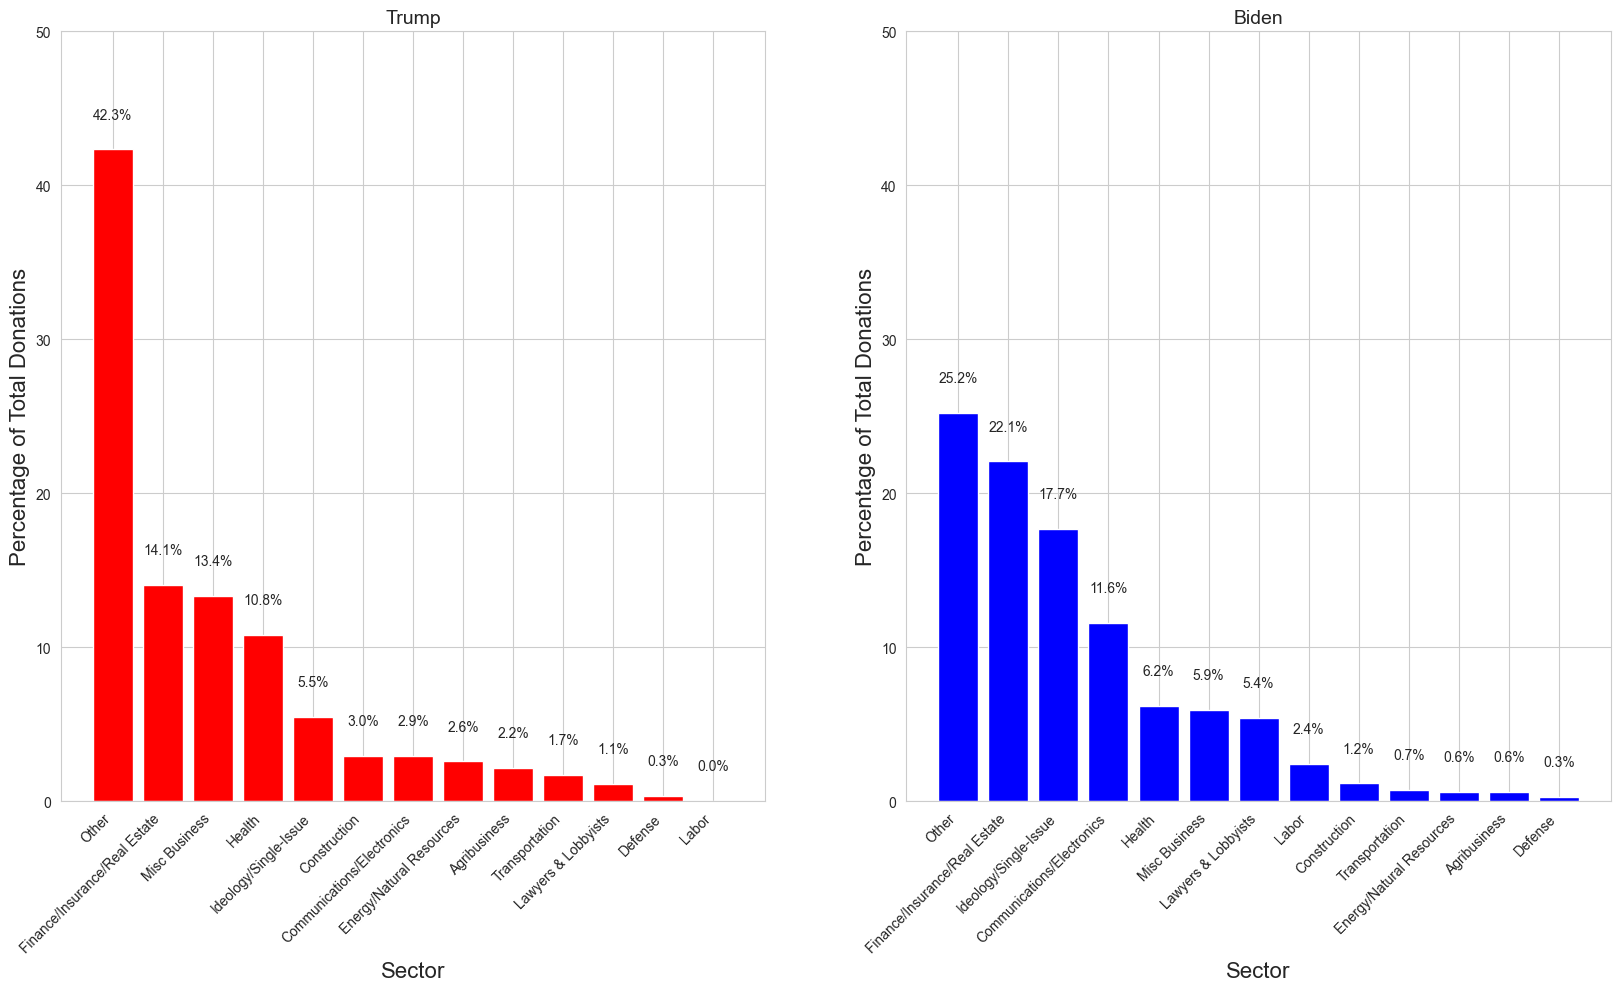

In [399]:
# Define the desired column order
new_order = ['Candidate', 'Agribusiness', 'Communications/Electronics', 'Construction', 'Defense', 'Energy/Natural Resources',          'Finance/Insurance/Real Estate', 'Health', 'Lawyers & Lobbyists', 'Transportation', 'Misc Business',          'Labor', 'Ideology/Single-Issue', 'Other']

# Use reindex to reorder the columns
df00 = df0.reindex(columns=new_order)

# Filter data for Trump and Biden
trump_data = df00[df00['Candidate'] == 'Trump, Donald (R)'].iloc[:, 1:]
biden_data = df00[df00['Candidate'] == 'Biden, Joe (D)'].iloc[:, 1:]

# Sort columns in descending order based on their height
trump_data = trump_data[trump_data.sum().sort_values(ascending=False).index]
biden_data = biden_data[biden_data.sum().sort_values(ascending=False).index]

# Sum contributions across sectors
trump_total = trump_data.sum(axis=0)
biden_total = biden_data.sum(axis=0)

# Calculate percentage of the sum
trump_pct = 100 * trump_total / trump_total.sum()
biden_pct = 100 * biden_total / biden_total.sum()

# Set up colors for the bar plot
colors_trump = ['#ff0000']*len(trump_total)
colors_biden = ['#0000ff']*len(biden_total)

# Set up labels for the bar plot
labels_trump = trump_data.columns
labels_biden = biden_data.columns

bar_width = 0.8

# Plot the bar plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
x_positions = range(len(trump_total))
ax1.bar(x_positions, trump_pct, color=colors_trump)
ax1.set_title("Trump", fontsize=14)
ax1.set_xticks(x_positions)
ax1.set_xticklabels(labels_trump, rotation=45, ha='right', fontsize=10)
ax1.set_xlabel('Sector', fontsize=16)
ax1.set_ylabel('Percentage of Total Donations', fontsize=16)
ax1.set_ylim([0, 50])
for i, v in enumerate(trump_pct):
    ax1.text(i, v + 2, f"{v:.1f}%", ha='center', fontsize=10)

x_positions = range(len(biden_total))
ax2.bar(x_positions, biden_pct, color=colors_biden)
ax2.set_title("Biden", fontsize=14)
ax2.set_xticks(x_positions)
ax2.set_xticklabels(labels_biden, rotation=45, ha='right', fontsize=10)
ax2.set_xlabel('Sector', fontsize=16)
ax2.set_ylabel('Percentage of Total Donations', fontsize=16)
ax2.set_ylim([0, 50])
for i, v in enumerate(biden_pct):
    ax2.text(i, v + 2, f"{v:.1f}%", ha='center', fontsize=10)

#plt.suptitle("Donors by Sector", fontsize=18)
plt.show()

In the above two bar charts, it is clear that for both Trump and Biden,

the Finance/Insurance/Real Estate sector is contributing substantially to the fundraising. One reason could be that this sector is intrinsically holding higher margins in their business, and the other reason could be that its business environment is heavily depending on the government's policy, so they have larger incentives to influence the result of the election.

For both Trump and Biden, the Other sector stands out from all and ranked top for the highest contribution. It would be attributed to Trump's business career before he ran for the US President. As a billionaire real estate developer, he made use of the Trump Organization to provide him huge financial support for his campaign. And this contribution is categorized in the Other sector.

For Biden, the portion of Ideology/Single-Issue sector is significantly higher than its portion in Trump's funds pool. The Ideology/Single-Issue sector includes organizations that focus on a single-issue area or are heavily partisan, such as those related to abortion, gun control, healthcare, environment, and foreign policy. Therefore, the reason could be that some certain groups - which were likely taking a more liberal stance on their issue - were severely unsatisfied with Trump administration from 2016 to 2020, so that they choose to firmly support Trump's opposition, Biden, by donating to his campaign financially.

### Second Dataset: 2020 Trump Presidential Campaign on the State Level

In [450]:
df_solid = pd.DataFrame()
df_solid['state'] = pivoted_df['state']
df_solid['Solid Indicator'] = pivoted_df['Solid Indicator']

df_campaign = Rallies_2020.copy()
df_campaign['state'] = df_campaign['State'].map(state_dict)

name_counts = df_campaign['state'].value_counts()
df_campaign_num = pd.DataFrame({'state': name_counts.index, 'count': name_counts.values})

df_solid = pd.merge(df_solid, df_campaign_num[['state', 'count']], on='state', how='left')
df_solid['count'] = df_solid['count'].fillna(0)
df_solid.rename(columns={"count": "# of 2020 Trump Presidential Campaigns"}, inplace = True)

df_solid = pd.merge(df_solid, df_ps, on='state', how='left')

df_solid['total_votes'] = df_solid['total_votes']/1000000
df_solid.head()

state  Solid Indicator  \
0                Alabama         4.266940   
1                 Alaska         0.871410   
2                Arizona        -0.442115   
3               Arkansas         3.124484   
4             California        -3.663964   
5               Colorado        -2.235483   
6            Connecticut        -3.592591   
7               Delaware        -3.660391   
8   District of Columbia        -5.946584   
9                Florida         1.911913   
10               Georgia        -0.435065   
11                Hawaii        -3.840516   
12                 Idaho         3.147161   
13              Illinois        -3.213265   
14               Indiana         2.829998   
15                  Iowa         2.014993   
16                Kansas         2.465846   
17              Kentucky         3.836592   
18             Louisiana         3.320610   
19                 Maine        -1.737810   
20              Maryland        -3.652732   
21         Massachusetts        -3.849319   
22              Michigan        -1.343595   
23             Minnesota        -1.750639   
24           Mississippi         3.380486   
25              Missouri         2.930972   
26               Montana         2.385620   
27              Nebraska         2.702746   
28                Nevada        -1.024618   
29         New Hampshire        -2.068176   
30            New Jersey        -3.159666   
31            New Mexico        -2.207799   
32              New York        -4.087878   
33        North Carolina         0.954582   
34          North Dakota         3.264828   
35                  Ohio         2.322246   
36              Oklahoma         3.759794   
37                Oregon        -2.249299   
38          Pennsylvania        -0.968435   
39          Rhode Island        -3.207882   
40        South Carolina         2.828784   
41          South Dakota         3.156744   
42             Tennessee         3.506257   
43                 Texas         1.935840   
44                  Utah         2.202084   
45               Vermont        -3.305983   
46              Virginia        -2.310239   
47            Washington        -2.426032   
48         West Virginia         4.825533   
49             Wisconsin        -0.603326   
50               Wyoming         3.515361   

    # of 2020 Trump Presidential Campaigns  total_votes  
0                                      0.0     2.323304  
1                                      0.0     0.359530  
2                                      7.0     3.387326  
3                                      0.0     1.219069  
4                                      0.0    17.495906  
5                                      1.0     3.256953  
6                                      0.0     1.824280  
7                                      0.0     0.504010  
8                                      0.0     0.344356  
9                                     11.0    11.067456  
10                                     2.0     4.997716  
11                                     0.0     0.574469  
12                                     0.0     0.868106  
13                                     0.0     6.038843  
14                                     0.0     3.033198  
15                                     3.0     1.690871  
16                                     0.0     1.375304  
17                                     1.0     2.136768  
18                                     3.0     2.148062  
19                                     0.0     0.819461  
20                                     0.0     3.037030  
21                                     0.0     3.631402  
22                                     9.0     5.539302  
23                                     5.0     3.277171  
24                                     1.0     1.315182  
25                                     0.0     3.025962  
26                                     0.0     0.605750  
27                                     1.0     0.95637

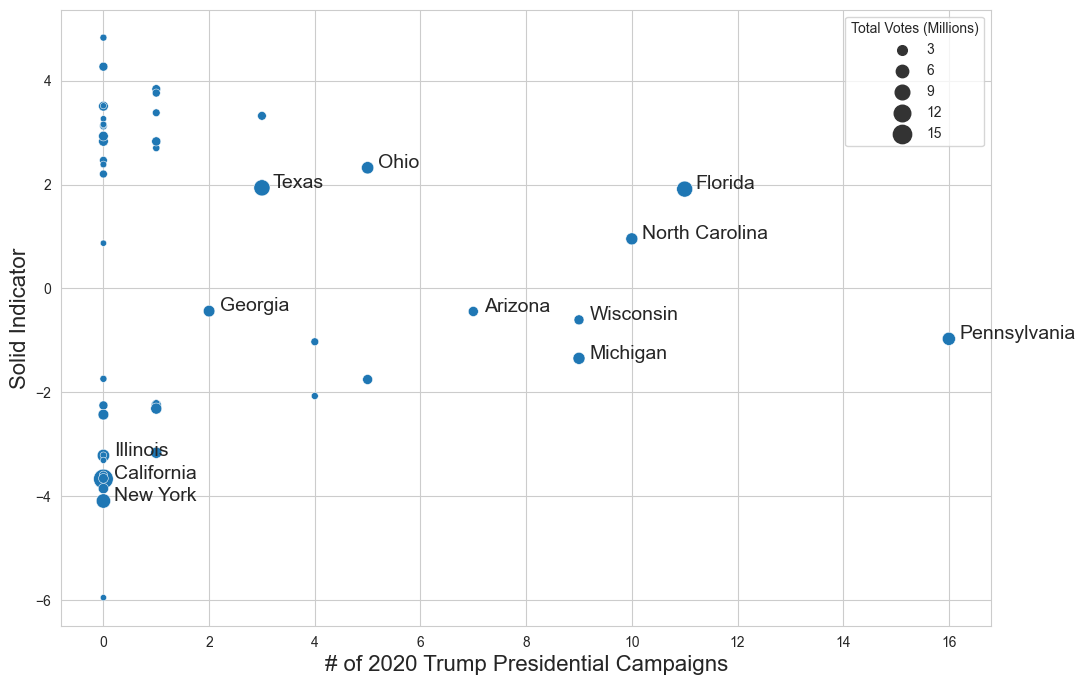

In [454]:
df_1 = df_solid.copy()

# Dropping NA's is required to use numpy's polyfit
df_2 = df_1.dropna(subset=['Solid Indicator', "# of 2020 Trump Presidential Campaigns"])

X = df_2["# of 2020 Trump Presidential Campaigns"]
y = df_2['Solid Indicator']
labels = df_2['state']

# Replace markers with country labels
plt.figure(figsize = (12,8))
scatter = sns.scatterplot(data = df_2, x = "# of 2020 Trump Presidential Campaigns", y = 'Solid Indicator', size = "total_votes", sizes=(20,200))

# Set legend title
scatter.legend().set_title("Total Votes (Millions)")

for i, label in enumerate(labels):
    if df_2['total_votes'].iloc[i] > 5 or (-1 < df_2['Solid Indicator'].iloc[i] < 0):
        plt.annotate(label, (X.iloc[i]+0.2, y.iloc[i]), fontsize=14)


plt.xlabel("# of 2020 Trump Presidential Campaigns", fontsize=16)
plt.ylabel('Solid Indicator', fontsize=16)
#plt.title("Figure 2: Solid Indicator vs # of 2020 Trump Presidential Campaigns on State-Level")
plt.show()

In [453]:
df_solid_rank = df_solid.sort_values(by="# of 2020 Trump Presidential Campaigns", ascending=False)
df_solid_rank.head()

state  Solid Indicator  # of 2020 Trump Presidential Campaigns  \
38    Pennsylvania        -0.968435                                    16.0   
9          Florida         1.911913                                    11.0   
33  North Carolina         0.954582                                    10.0   
22        Michigan        -1.343595                                     9.0   
49       Wisconsin        -0.603326                                     9.0   

    total_votes  
38     6.925255  
9     11.067456  
33     5.524801  
22     5.539302  
49     3.297352

In the above plot, we can see that the frequency of Trump's rallies is reciprocally correlated with the level of polarization in each state, as indicated by the Solid Indicator. This suggests that Trump's campaign strategy focused on targeting states with low levels of solidness, perhaps in an effort to win over swing voters and expand his base of support. This makes great sense to spend most of his energy on the swing states with large population such as Pennsylvania, Florida, and North Carolina, so that it would be most cost-efficient for him to win the most votes.

Moreover, it is important to note that Trump's campaign strategy may have also been influenced by the electoral college system in the United States, which awards votes on a winner-takes-all basis in most states. This means that a candidate who wins a state by a small margin can potentially win all the votes, making it crucial to focus resources on swing states with large populations.

## Adding a New Dataset

### First Dataset
New Dataset: https://www.kaggle.com/datasets/noriuk/us-education-datasets-unification-project?resource=download&select=states_all.csv

Recall that the one of purposes of this paper was to study what kind of citizen would vote for Trump in the 2020 Election. From the previous discussion, we learned that Trump was more favored by people holding conservative views, who may potentially have lower educational attainments. This dataset contains the percentage of population over 25 years old who have obtained Bachelor's degree or higher, which can be a good approximation for the educational attainment level of each state when the 2020 election happened.

In [190]:
df_higher_edu = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/2020_education.csv')
df_higher_edu["Bachelor's degree or higher"] = df_higher_edu["Bachelor's degree or higher"].replace('%', '', regex=True).astype(float)
df_higher_edu.rename(columns={"Bachelor's degree or higher":"Bachelor's degree or higher (%)"}, inplace = True)

df_higher_edu.head()

NAME  Bachelor's degree or higher (%)
0     Alabama                             24.5
1      Alaska                             29.0
2     Arizona                             28.9
3    Arkansas                             21.5
4  California                             32.6

Scatter plot of Educational attainment and vote share of Trump

In [191]:
compare_edu_vote = pd.merge(df_higher_edu, df_trump_vote_sum, on='NAME', how='left')
compare_edu_vote.head()

NAME  Bachelor's degree or higher (%)     TRUE    FALSE  Grand Total  \
0     Alabama                             24.5  1234925   206243      1441168   
1      Alaska                             29.0   119801    70091       189892   
2     Arizona                             28.9   413575  1248111      1661686   
3    Arkansas                             21.5   669488    91159       760647   
4  California                             32.6   709784  5296177      6005961   

   total_votes     ratio  
0      2323304  0.620310  
1       359530  0.528167  
2      3387326  0.490560  
3      1219069  0.623957  
4     17495906  0.343278

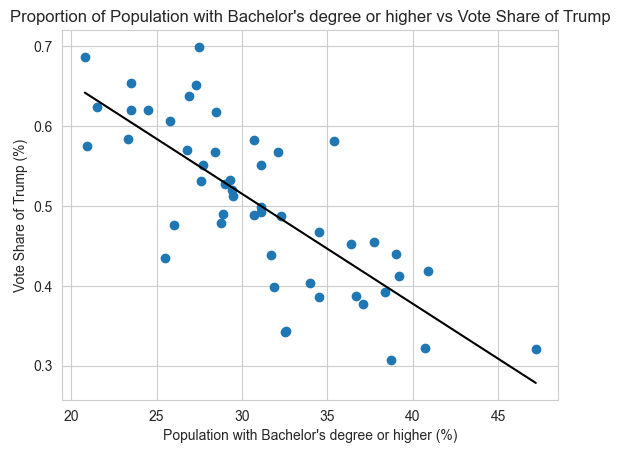

In [192]:
df_2 = compare_edu_vote.dropna(subset=['ratio', "Bachelor's degree or higher (%)"])

X = df_2["Bachelor's degree or higher (%)"]
y = df_2['ratio']

# Replace markers with country labels
fig, ax = plt.subplots()
ax.scatter(X, y, marker='o')

# Fit a linear trend line
ax.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')

plt.xlabel("Population with Bachelor's degree or higher (%)")
plt.ylabel('Vote Share of Trump (%)')

plt.title("Proportion of Population with Bachelor's degree or higher vs Vote Share of Trump")

plt.show()

In [193]:
df_edu = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/2020_county_educational_attainment.csv')
df_edu.head()

state   county  \
0  Alabama  Autauga   
1  Alabama  Baldwin   
2  Alabama  Barbour   
3  Alabama     Bibb   
4  Alabama   Blount   

   Population 18 to 24 years with Bachelor's degree or higher  \
0                                                612            
1                                               1360            
2                                                 84            
3                                                 24            
4                                                127            

   Population 25 years and over with Bachelor's degree or higher  
0                                              10721              
1                                              49636              
2                                               2067              
3                                               1814              
4                                               5276

In [194]:
df_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 4 columns):
 #   Column                                                         Non-Null Count  Dtype 
---  ------                                                         --------------  ----- 
 0   state                                                          3221 non-null   object
 1   county                                                         3221 non-null   object
 2   Population 18 to 24 years with Bachelor's degree or higher     3221 non-null   int64 
 3   Population 25 years and over with Bachelor's degree or higher  3221 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 100.8+ KB


In [195]:
df_county_pop_copy = df_county_pop.copy()
df_county_pop_copy.drop(['population'], axis = 1, inplace = True)
df_county_pop_copy = pd.merge(df_county_pop_copy, df_county_population[['state', 'county', 'population']], on=['state', 'county'], how='left')
df_county_pop_copy.rename(columns={'NAME':'state'}, inplace=True)
df_county_pop_copy.head()

state    county     candidate party   won  won_votes  \
0  Delaware    Sussex  Donald Trump   REP  True      71230   
1   Florida     Baker  Donald Trump   REP  True      11911   
2   Florida       Bay  Donald Trump   REP  True      66097   
3   Florida  Bradford  Donald Trump   REP  True      10334   
4   Florida   Brevard  Donald Trump   REP  True     207883   

   county_total_votes  trump_vote_share      lat      lng  density  \
0              129352         55.066794  38.9091 -75.4227    449.0   
1               14059         84.721531  30.2809 -82.1253    534.0   
2               93024         71.053707  30.1995 -85.6003    395.0   
3               13632         75.806925  29.9474 -82.1129    291.0   
4              360764         57.622989  27.9631 -80.6593    508.0   

   effective_voting_rate  population  
0              69.019759    187413.0  
1              63.916167     21996.0  
2              65.501095    142019.0  
3              61.086216     22316.0  
4              74.332680    485337.0

In [196]:
df_pivot_copy = df_pivot.copy()
df_pivot_copy['trump_vote_share'] = 100*df_pivot_copy['Donald Trump']/(df_pivot_copy['Donald Trump']+df_pivot_copy['Joe Biden']+df_pivot_copy['Others'])

In [197]:
df_county_edu = pd.merge(df_county_pop_copy, df_edu, on = ['state', 'county'], how='outer')
df_county_edu = df_county_edu.dropna()
df_county_edu["Bachelor's degree or higher (%)"] = (df_county_edu["Population 18 to 24 years with Bachelor's degree or higher"] + df_county_edu["Population 25 years and over with Bachelor's degree or higher"])/df_county_edu['population']*100
df_county_edu.drop(df_county_edu[df_county_edu["Bachelor's degree or higher (%)"] >= 100].index, inplace = True)
df_county_edu.head()

state    county     candidate party   won  won_votes  \
0  Delaware    Sussex  Donald Trump   REP  True    71230.0   
1   Florida     Baker  Donald Trump   REP  True    11911.0   
2   Florida       Bay  Donald Trump   REP  True    66097.0   
3   Florida  Bradford  Donald Trump   REP  True    10334.0   
4   Florida   Brevard  Donald Trump   REP  True   207883.0   

   county_total_votes  trump_vote_share      lat      lng  density  \
0            129352.0         55.066794  38.9091 -75.4227    449.0   
1             14059.0         84.721531  30.2809 -82.1253    534.0   
2             93024.0         71.053707  30.1995 -85.6003    395.0   
3             13632.0         75.806925  29.9474 -82.1129    291.0   
4            360764.0         57.622989  27.9631 -80.6593    508.0   

   effective_voting_rate  population  \
0              69.019759    187413.0   
1              63.916167     21996.0   
2              65.501095    142019.0   
3              61.086216     22316.0   
4              74.332680    485337.0   

   Population 18 to 24 years with Bachelor's degree or higher  \
0                                             1071.0            
1                                               91.0            
2                                              987.0            
3                                               74.0            
4                                             3967.0            

   Population 25 years and over with Bachelor's degree or higher  \
0                                            50901.0               
1                                             2779.0               
2                                            31305.0               
3                                             2083.0               
4                                           136909.0               

   Bachelor's degree or higher (%)  
0                        27.731267  
1                        13.047827  
2                        22.737803  
3                         9.665711  
4                        29.026429

In [198]:
df_county_edu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2529 entries, 0 to 2979
Data columns (total 16 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   state                                                          2529 non-null   object 
 1   county                                                         2529 non-null   object 
 2   candidate                                                      2529 non-null   object 
 3   party                                                          2529 non-null   object 
 4   won                                                            2529 non-null   object 
 5   won_votes                                                      2529 non-null   float64
 6   county_total_votes                                             2529 non-null   float64
 7   trump_vote_share                                            

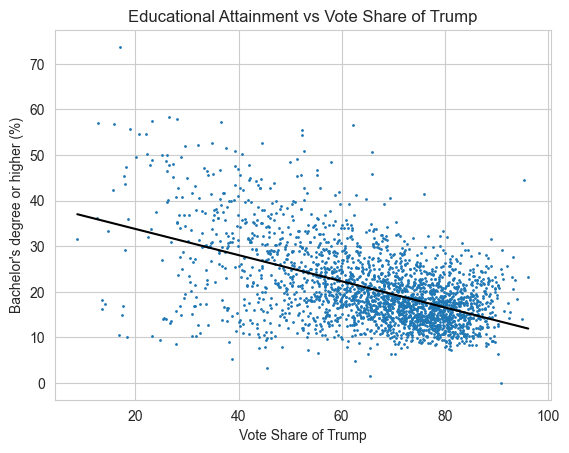

In [199]:
df_1 = df_county_edu.copy()

# Dropping NA's is required to use numpy's polyfit
df_2 = df_1.dropna(subset=['trump_vote_share', "Bachelor's degree or higher (%)"])

X = df_2['trump_vote_share']
y = df_2["Bachelor's degree or higher (%)"]

# Replace markers with country labels
fig, ax = plt.subplots()
ax.scatter(X, y, marker='o', s=1)

# Fit a linear trend line
ax.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')

ax.set_xlabel('Vote Share of Trump')
ax.set_ylabel("Bachelor's degree or higher (%)")
ax.set_title("Educational Attainment vs Vote Share of Trump")
plt.show()

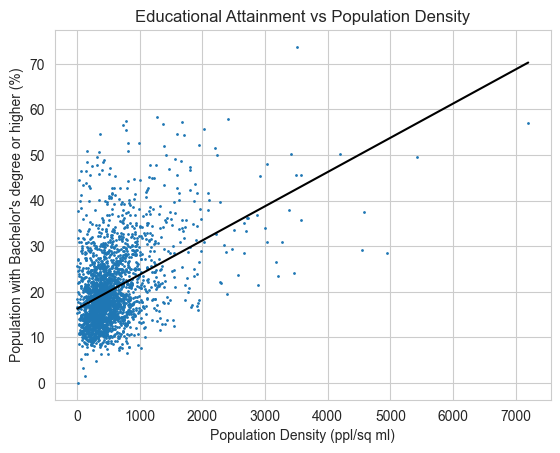

In [200]:
df_1 = df_county_edu.copy()

# Dropping NA's is required to use numpy's polyfit
df_2 = df_1.dropna(subset=['density', "Bachelor's degree or higher (%)"])

X = df_2['density']
y = df_2["Bachelor's degree or higher (%)"]

# Replace markers with country labels
fig, ax = plt.subplots()
ax.scatter(X, y, marker='o', s=1)

# Fit a linear trend line
ax.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')

ax.set_xlabel('Population Density (ppl/sq ml)')
ax.set_ylabel("Population with Bachelor's degree or higher (%)")
ax.set_title("Educational Attainment vs Population Density")
plt.show()

### Second Dataset
New Dataset: https://www.kaggle.com/datasets/goldenoakresearch/us-household-income-stats-geo-locations

In [201]:
df_income = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/income.csv')
df_income.rename(columns={"State_Name": "NAME"}, inplace=True)
df_income.head()

NAME  Average of Mean  Average of Median  Average of Stdev
0     Alabama      54023.75287        63252.24713       42045.37548
1      Alaska      79178.36893       111026.48540       52765.11650
2     Arizona      63400.11494        80416.21839       44199.91133
3    Arkansas      52213.93215        52536.12389       40938.36578
4  California      78654.29711       101260.92200       54015.27655

In [202]:
compare_income_vote = pd.merge(df_income, df_trump_vote_sum, on='NAME', how='left')
compare_income_vote.dropna(inplace=True)
compare_income_vote.head()

NAME  Average of Mean  Average of Median  Average of Stdev  \
0     Alabama      54023.75287        63252.24713       42045.37548   
1      Alaska      79178.36893       111026.48540       52765.11650   
2     Arizona      63400.11494        80416.21839       44199.91133   
3    Arkansas      52213.93215        52536.12389       40938.36578   
4  California      78654.29711       101260.92200       54015.27655   

        TRUE      FALSE  Grand Total  total_votes     ratio  
0  1234925.0   206243.0    1441168.0    2323304.0  0.620310  
1   119801.0    70091.0     189892.0     359530.0  0.528167  
2   413575.0  1248111.0    1661686.0    3387326.0  0.490560  
3   669488.0    91159.0     760647.0    1219069.0  0.623957  
4   709784.0  5296177.0    6005961.0   17495906.0  0.343278

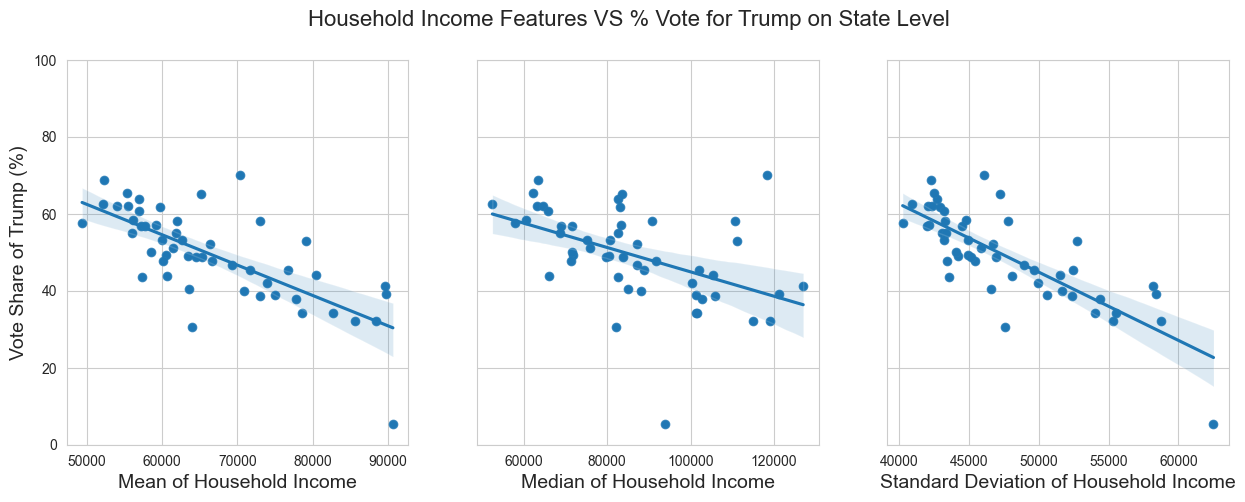

In [203]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
sns.scatterplot(data=compare_income_vote, x='Average of Mean', y= compare_income_vote['ratio']*100, ax=ax1)
sns.regplot(data=compare_income_vote, x='Average of Mean', y= compare_income_vote['ratio']*100, ax=ax1)
sns.scatterplot(data=compare_income_vote, x='Average of Median', y= compare_income_vote['ratio']*100, ax=ax2)
sns.regplot(data=compare_income_vote, x='Average of Median', y= compare_income_vote['ratio']*100, ax=ax2)
sns.scatterplot(data=compare_income_vote, x='Average of Stdev', y= compare_income_vote['ratio']*100, ax=ax3)
sns.regplot(data=compare_income_vote, x='Average of Stdev', y= compare_income_vote['ratio']*100, ax=ax3)
ax1.set_ylabel("Vote Share of Trump (%)", fontsize=14)
ax1.set_xlabel("Mean of Household Income", fontsize=14)
ax2.set_xlabel("Median of Household Income", fontsize=14)
ax3.set_xlabel("Standard Deviation of Household Income", fontsize=14)
ax1.set_ylim([0, 100])
fig.suptitle("Household Income Features VS % Vote for Trump on State Level", fontsize=16)
plt.show()

Given the shaded area where the true regression lines is expected to fall with a 95% degree of confidence, it is evident that all three aspects of household income - mean, median, and standard deviation - are negatively correlated with the vote share of Trump. The richer the neighborhood is, the less likely they favor Trump. Related with the county size, as the population gathered in one county increases, the more industrialized and commercialized the county becomes. What follows is the widened gap among the rich and poor, which drives the three income features high. Therefore, the above graphs strengthens our initial statement that the likelihood of Trump being supported is higher in the smaller counties and rural places rather than urban cities.

In [204]:
df_median_age = pd.read_csv('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/2020_median_age.csv')
df_median_age.head()

state   county  median_age
0  Alabama  Autauga        39.2
1  Alabama  Baldwin        43.7
2  Alabama  Barbour        40.8
3  Alabama     Bibb        40.2
4  Alabama   Blount        41.1

In [205]:
df_median_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state       3143 non-null   object 
 1   county      3143 non-null   object 
 2   median_age  3143 non-null   float64
dtypes: float64(1), object(2)
memory usage: 73.8+ KB


In [206]:
df_county_age = pd.merge(df_county_pop, df_median_age, on = ['state', 'county'], how='left')
df_county_age = df_county_age.dropna()
df_county_age.head()

state    county     candidate party   won  won_votes  \
0  Delaware    Sussex  Donald Trump   REP  True      71230   
1   Florida     Baker  Donald Trump   REP  True      11911   
2   Florida       Bay  Donald Trump   REP  True      66097   
3   Florida  Bradford  Donald Trump   REP  True      10334   
4   Florida   Brevard  Donald Trump   REP  True     207883   

   county_total_votes  trump_vote_share      lat      lng  density  \
0              129352         55.066794  38.9091 -75.4227    449.0   
1               14059         84.721531  30.2809 -82.1253    534.0   
2               93024         71.053707  30.1995 -85.6003    395.0   
3               13632         75.806925  29.9474 -82.1129    291.0   
4              360764         57.622989  27.9631 -80.6593    508.0   

   population  effective_voting_rate  median_age  
0    187413.0              69.019759        51.2  
1     21996.0              63.916167        37.4  
2    142019.0              65.501095        41.9  
3     22316.0              61.086216        40.1  
4    485337.0              74.332680        47.4

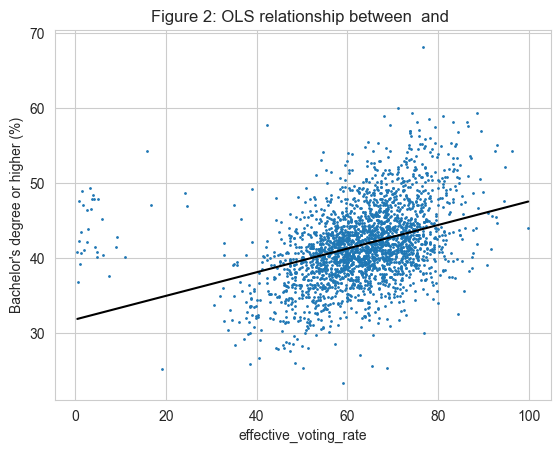

In [207]:
df_1 = df_county_age.copy()

# Dropping NA's is required to use numpy's polyfit
df_2 = df_1.dropna(subset=['effective_voting_rate', "median_age"])

X = df_2['effective_voting_rate']
y = df_2["median_age"]

# Replace markers with country labels
fig, ax = plt.subplots()
ax.scatter(X, y, marker='o', s=1)

# Fit a linear trend line
ax.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')

ax.set_xlabel('effective_voting_rate')
ax.set_ylabel("Bachelor's degree or higher (%)")
ax.set_title("Figure 2: OLS relationship between  and ")
plt.show()

# Final Project
## OLS Regression
In this section, we will revisit four critical features of 2020 Presidential Election: VEP Turnout Rate, Vote Share of Trump, Solid Indicator, and Polarization Indicator.

The variables on the Regression Results tables are showing up in an order that the first variable is yielding the highest R-squared value on its own, the second variable is improving the R-squared the most amongst the rest of the variables, and so on.

The objective function of all the following analysis is to minimize *the sum of squared residuals*, i.e.

$$
\underset{\hat{\beta}}{\min} \sum^N_{i=1}{\hat{u}^2_i}
$$

where $ \hat{u}_i $ is the difference between the observation and the predicted value of the dependent variable.

### VEP Turnout Rate ~ Median Age, Educational Attainment, Log of VEP, Average Income, Latitude, Longitude

A regression about VEP Turnout Rate is necessary because it is an important measure of political participation and democracy. Higher turnout rates indicate a higher level of engagement and civic responsibility among voters, which can lead to better representation and more responsive government. Voters casting their votes is the first step for the candidate to win. For Donald Trump specifically, it is important for him to promote attractive policy to regions with high turnout rate, so that he is spending the campaign funds in the most effective way. Here is the definition for VEP Turnout Rate that is used in the regression afterwards:

$$\text{VEP Turnout Rate (\%) in a state} = 100*\frac{\text{Effective Votes in a state}}{\text{VEP in a state}} $$

I selected 6 variables in this regression model.

Median Age of Population: Age can play a role in determining voter turnout, as older individuals tend to have higher turnout rates than younger individuals (Dassonneville, 2016). This may be due to a variety of factors, including the fact that older individuals may have more experience with the political process, be more likely to have established a habit of voting, and have more resources available to them (e.g. retirement income) to devote to political campaigns.

Educational Attainment:

Average Annual Income: Income is often seen as a predictor of political participation, with higher-income individuals being more likely to vote. This may be due to a variety of factors, including the fact that higher-income individuals may have more resources to devote to political campaigns, be more educated and politically informed, and be more invested in the political process (Filer, 1993).

VEP: One potential theory that could support a non-linear relationship is the idea of voter fatigue (Stockemer 2017). This theory suggests that as turnout rates increase, voters may become less likely to vote due to exhaustion, apathy, or other factors. If this theory is correct, we might expect to see a non-linear relationship between turnout rate and population, with higher turnout rates at lower levels of population, followed by a plateau or even a decline at higher levels of population.

In [457]:
df_county_turnout = pd.merge(df_pc, df_median_age, on=['state', 'county'], how='left')
df_county_turnout.drop(['total_votes', 'percent'], axis = 1, inplace = True)
df_county_turnout.rename(columns={"current_votes":"county_total_votes"}, inplace=True)
df_county_turnout = pd.merge(df_county_turnout, df_county_vep, on=['state', 'county'], how='left')
df_county_turnout['VEP Turnout Rate (%)'] = 100*df_county_turnout['county_total_votes']/df_county_turnout['VEP']
df_county_turnout.drop(df_county_turnout[df_county_turnout["VEP Turnout Rate (%)"] >= 100].index, inplace = True)
df_county_turnout.drop(df_county_turnout[df_county_turnout["VEP Turnout Rate (%)"] <= 20].index, inplace = True)
df_county_turnout['Log of VEP'] = np.log(df_county_turnout['VEP'])
df_county_turnout = pd.merge(df_county_turnout, df_county_income, on=['state', 'county'], how='left')
df_county_turnout.rename(
    columns={"median_age": "Median Age (years)", "Median":"Median Income (USD1,000)", "Mean":"Average Income (USD1,000)", "Stdev":"Standard Deviation of Income (USD1,000)"}, inplace=True)
df_county_edu2 = df_county_edu.loc[:, ['state', 'county', "Bachelor's degree or higher (%)"]]
df_county_turnout = pd.merge(df_county_turnout, df_county_edu2, on=["state", 'county'], how='left')
df_county_turnout.drop(df_county_turnout[df_county_turnout["Average Income (USD1,000)"] <= 30].index, inplace = True)
df_county_turnout.drop(df_county_turnout[df_county_turnout["Bachelor's degree or higher (%)"] <= 5].index, inplace = True)
df_county_turnout= pd.merge(df_county_turnout, df_white[['state', 'county', "White Population (%)"]], on=['state', 'county'], how='left')
df_county_turnout['White Population (%)'] = df_county_turnout['White Population (%)'].astype(float)
df_county_turnout = pd.merge(df_county_turnout, df_county_geo[['state', 'county', 'lat', 'lng']], on=['state', 'county'], how='left')
df_county_turnout.rename(columns={"lat":"Latitude", 'lng':'Longitude'}, inplace=True)
df_county_turnout = pd.merge(df_county_turnout, df_county_unemployment[['state', 'county', 'Unemployment Rate (%)']], on=['state', 'county'], how='left')
df_county_turnout.head()

state      county  county_total_votes  Median Age (years)  \
0              Delaware        Kent               87025                38.0   
1              Delaware  New Castle              287633                38.9   
2              Delaware      Sussex              129352                51.2   
3  District of Columbia      Ward 1               41681                 NaN   
4  District of Columbia      Ward 2               32881                 NaN   

             VEP  VEP Turnout Rate (%)  Log of VEP  Average Income (USD1,000)  \
0  129009.987494             67.456018   11.767645                     68.711   
1  415138.923027             69.285963   12.936368                     87.980   
2  178892.988059             72.306915   12.094543                     58.812   
3            NaN                   NaN         NaN                        NaN   
4            NaN                   NaN         NaN                        NaN   

   Median Income (USD1,000)  Standard Deviation of Income (USD1,000)  \
0                    57.408                                   53.427   
1                    79.592                                   58.990   
2                    51.005                                   44.583   
3                       NaN                                      NaN   
4                       NaN                                      NaN   

   Bachelor's degree or higher (%)  White Population (%)  Latitude  Longitude  \
0                        22.566106             62.023533   39.1610   -75.5202   
1                        33.572570                   NaN   39.7415   -75.5416   
2                        27.731267             78.148374   38.9091   -75.4227   
3                              NaN                   NaN   38.9072   -77.0369   
4                              NaN                   NaN   38.9063   -77.0340   

   Unemployment Rate (%)  
0                    8.3  
1                    7.5  
2                    7.2  
3                    NaN  
4                    NaN

In [465]:
df_county_turnout['const'] = 1

target = 'VEP Turnout Rate (%)'

var1 = 'Median Age (years)'
var2 = "Bachelor's degree or higher (%)"
var3 = 'Latitude'
var4 = 'White Population (%)'
var5 = 'Longitude'
var6 = 'Log of VEP'
var7 = 'Average Income (USD1,000)'
var8 = 'Unemployment Rate (%)'
var9 = 'Standard Deviation of Income (USD1,000)'

reg1 = sm.OLS(endog = df_county_turnout[target],
              exog = df_county_turnout[['const', var1, var2, var3, var4, var5, var6]], missing = 'drop')
reg2 = sm.OLS(endog = df_county_turnout[target],
              exog = df_county_turnout[['const', var1, var2, var3, var4, var7, var6]], missing = 'drop')
reg3 = sm.OLS(endog = df_county_turnout[target],
              exog = df_county_turnout[['const', var1, var2, var3, var4, var8, var6]], missing = 'drop')
reg4 = sm.OLS(endog = df_county_turnout[target],
              exog = df_county_turnout[['const', var1, var2, var3, var4, var9, var6]], missing = 'drop')
reg5 = sm.OLS(endog = df_county_turnout[target],
              exog = df_county_turnout[['const', var1, var2, var3, var4, var5, var7]], missing = 'drop')
reg6 = sm.OLS(endog = df_county_turnout[target],
              exog = df_county_turnout[['const', var1, var2, var3, var4, var5, var8]], missing = 'drop')
reg7 = sm.OLS(endog = df_county_turnout[target],
              exog = df_county_turnout[['const', var1, var2, var3, var4, var5, var9]], missing = 'drop')

result1 = reg1.fit()
result2 = reg2.fit()
result3 = reg3.fit()
result4 = reg4.fit()
result5 = reg5.fit()
result6 = reg6.fit()
result7 = reg7.fit()

stargazer = Stargazer([result1, result2, result3, result4, result5, result6, result7])
stargazer.custom_columns(['Random Forest', 'Lng -> Avg Income', 'Lng -> UR', 'Lng -> Std of Income', 'Lat -> Avg Income', 'Lat -> UR', 'Lat -> Std of Income'], [1,1,1,1,1,1,1])
stargazer.title("Regression Results")
stargazer.covariate_order([var1, var2, var3, var4, var5, var6, var7, var8, var9, 'const'])
HTML(stargazer.render_html())

In [466]:
with open('/Users/jiaxincui/Downloads/Output/regression_results1.tex', 'w') as f:
    f.write(stargazer.render_latex())

Regression for VEP Turnout Rate:

In [381]:
df_county_turnout['const'] = 1

target = 'VEP Turnout Rate (%)'

var1 = 'Median Age (years)'
var2 = "Bachelor's degree or higher (%)"
var3 = 'Log of VEP'
var4 = 'Standard Deviation of Income (USD1,000)'
var5 = 'White Population (%)'
var6 = 'Latitude'

reg1 = sm.OLS(endog = df_county_turnout[target],
              exog = df_county_turnout[['const', var1]], missing = 'drop')
reg2 = sm.OLS(endog = df_county_turnout[target],
              exog = df_county_turnout[['const', var1, var2]], missing = 'drop')
reg3 = sm.OLS(endog = df_county_turnout[target],
              exog = df_county_turnout[['const', var1, var2, var3]], missing = 'drop')
reg4 = sm.OLS(endog = df_county_turnout[target],
              exog = df_county_turnout[['const', var1, var2, var3, var4]], missing = 'drop')
reg5 = sm.OLS(endog = df_county_turnout[target],
              exog = df_county_turnout[['const', var1, var2, var3, var4, var5]], missing = 'drop')
reg6 = sm.OLS(endog = df_county_turnout[target],
              exog = df_county_turnout[['const', var1, var2, var3, var4, var5, var6]], missing = 'drop')

result1 = reg1.fit()
result2 = reg2.fit()
result3 = reg3.fit()
result4 = reg4.fit()
result5 = reg5.fit()
result6 = reg6.fit()

stargazer = Stargazer([result1, result2, result3, result4, result5, result6])
stargazer.custom_columns(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6'], [1,1,1,1,1,1])
stargazer.title("Regression Results")
stargazer.covariate_order([var1, var2, var3, var4, var5, var6, 'const'])
HTML(stargazer.render_html())

In [329]:
with open('/Users/jiaxincui/Downloads/Output/regression_results2.tex', 'w') as f:
    f.write(stargazer.render_latex())

Using our parameter estimates, we can now write our estimated relationship as

\begin{align}
\widehat{\text{VEP Turnout Rate (\%)}}_i = &9.728 + 1.004 \ {\text{Median Age (years)}}_i + 0.649 \ {\text{Bachelor's degree or higher (\%)}}_i\\
&- 1.435 \ {\text{Log of VEP}}_i + 0.018 \ {\text{Average Income (USD1,000)}}_i\\
&+ 0.278 \ {\text{Latitude}}_i - 0.069 \ {\text{Longitude}}_i
\end{align}

From the above formula, we can observe that the variable that are positively correlated with VEP Turnout Rate are proportion of population with at least Bachelor's degree, the average income, and latitude. All other variables: median age, log of VEP, and longitude, are negatively associated with the turnout rate in one county. That is saying, a small county located in the northwest, with higher level of educational attainment and income, people of higher age, is more likely to participate in voting. Since the variables are sorted in descending order based on their improvement on the R-squared value, Median Age, is the single most important factor in this model.

In [278]:
with open('/Users/jiaxincui/Documents/GitHub/git-exercise-AllysonCui/Data/Other/Output/regression_results1.tex', 'w') as f:
    f.write(stargazer.render_latex())

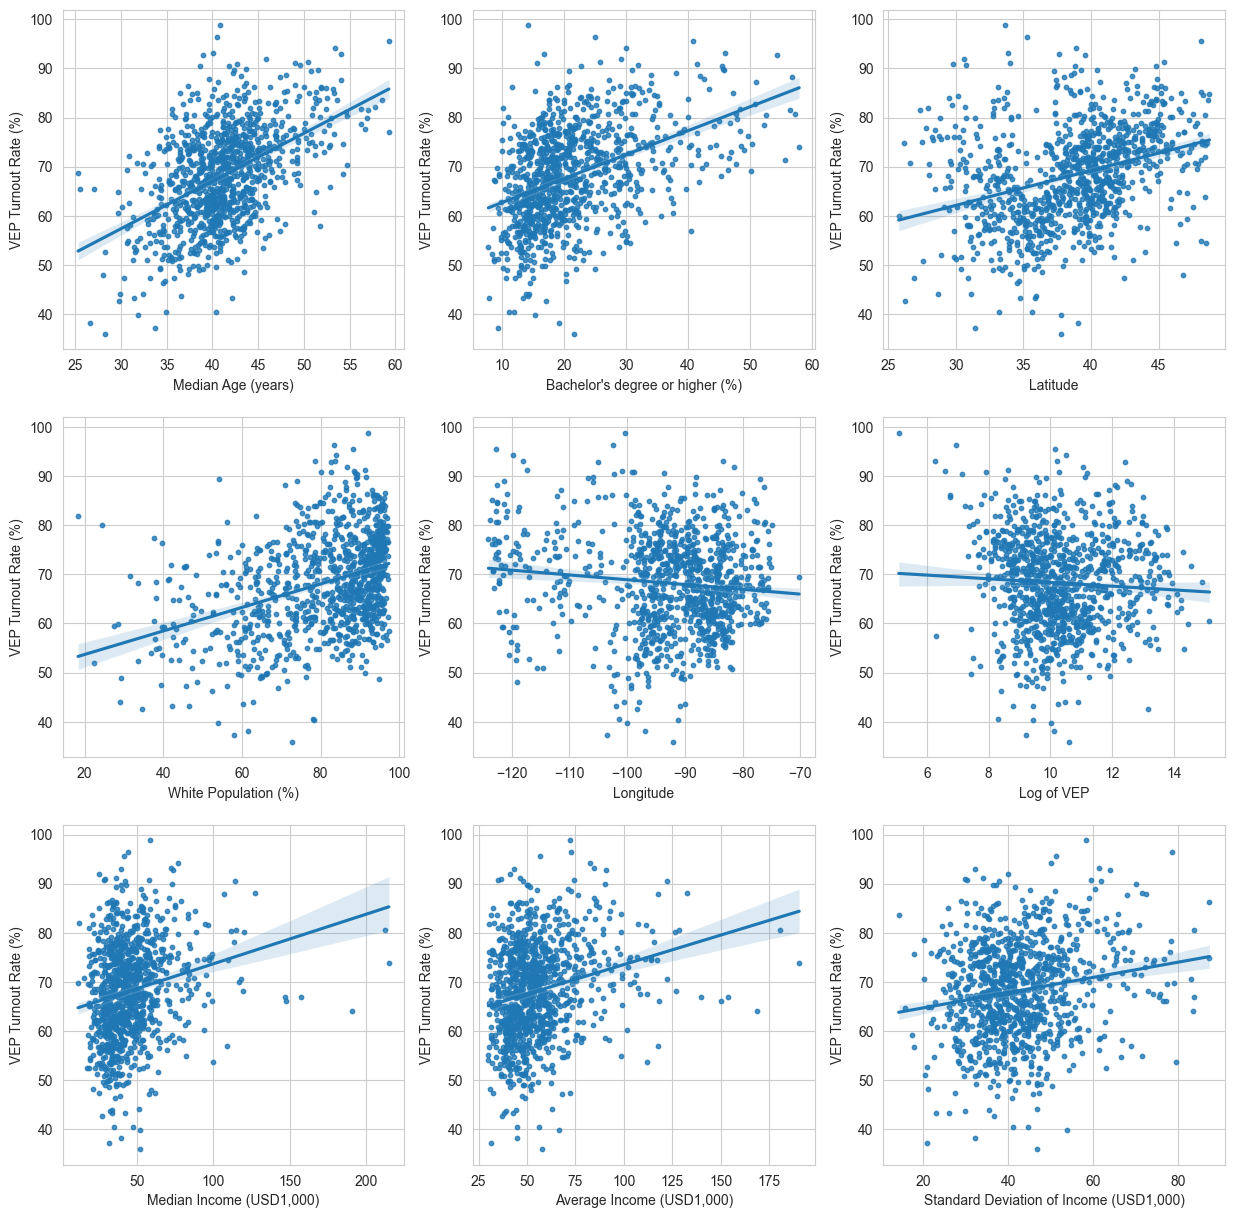

In [389]:
df_1 = df_county_turnout.copy()
df_1.drop(df_1[df_1["Median Income (USD1,000)"] > 250].index, inplace = True)

target = 'VEP Turnout Rate (%)'
var1 = 'Median Age (years)'
var2 = "Bachelor's degree or higher (%)"
var3 = 'Latitude'
var4 = 'White Population (%)'
var5 = 'Longitude'
var6 = 'Log of VEP'
var7 = 'Median Income (USD1,000)'
var8 = 'Average Income (USD1,000)'
var9 = 'Standard Deviation of Income (USD1,000)'

# Dropping NA's is required to use numpy's polyfit
df_2 = df_1.dropna(subset=[target, var1, var2, var3, var4, var5, var6, var7, var8, var9])

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(15,15))

# Regression plot with Unemployment Rate
sns.regplot(x=var1, y=target, data=df_2, ax=ax1, scatter_kws={'s': 10})
ax1.set_xlabel(var1)
ax1.set_ylabel(target)

# Regression plot with Density
sns.regplot(x=var2, y=target, data=df_2, ax=ax2, scatter_kws={'s': 10})
ax2.set_xlabel(var2)
ax2.set_ylabel(target)

# Regression plot with Standard Deviation of Income
sns.regplot(x=var3, y=target, data=df_2, ax=ax3, scatter_kws={'s': 10})
ax3.set_xlabel(var3)
ax3.set_ylabel(target)

# Regression plot with White Population
sns.regplot(x=var4, y=target, data=df_2, ax=ax4, scatter_kws={'s': 10})
ax4.set_xlabel(var4)
ax4.set_ylabel(target)

# Regression plot with Population with Bachelor's degree or higher
sns.regplot(x=var5, y=target, data=df_2, ax=ax5, scatter_kws={'s': 10})
ax5.set_xlabel(var5)
ax5.set_ylabel(target)

# Regression plot with Population with Bachelor's degree or higher
sns.regplot(x=var6, y=target, data=df_2, ax=ax6, scatter_kws={'s': 10})
ax6.set_xlabel(var6)
ax6.set_ylabel(target)

# Regression plot with Population with Bachelor's degree or higher
sns.regplot(x=var7, y=target, data=df_2, ax=ax7, scatter_kws={'s': 10})
ax7.set_xlabel(var7)
ax7.set_ylabel(target)

# Regression plot with Population with Bachelor's degree or higher
sns.regplot(x=var8, y=target, data=df_2, ax=ax8, scatter_kws={'s': 10})
ax8.set_xlabel(var8)
ax8.set_ylabel(target)

# Regression plot with Population with Bachelor's degree or higher
sns.regplot(x=var9, y=target, data=df_2, ax=ax9, scatter_kws={'s': 10})
ax9.set_xlabel(var9)
ax9.set_ylabel(target)

#plt.suptitle("VEP Turnout Rate and Its Variables", fontsize=16)

plt.show()

The above statement can also be supported by the regression graphs generated here. In the third plot for VEP, the 95% confidence interval for the true regression line indicates that there is less certainty in the regression line's estimate. In addition, since the line is almost flat, we can conclude that the VEP Turnout Rate has little to no correlation with VEP. Therefore, Trump's campaign strategy should consider less on the number of VEP, and more on the counties where the population are more aged and wealthier.

Additional information we can draw from the third graph is that all the dots are symmetrically distributed around 68% VEP Turnout Rate. This suggests that on average, the effective votes comes from 68% of VEP.

### Vote Share of Trump (%)~ Annual Income Standard Deviation (USD10,000), Bachelor's degree or higher (%), Unemployment Rate (%)

A regression about Vote Share of Trump is crucial in this paper because it measures the variables that would directly indicate the votes Trump would receive in a given state. By examining the factors that influence Vote Share, we can gain insights into what motivates people to support Trump, and how economic and social factors might influence political preferences. The formula for Vote Share of Trump is:

$$\text{Vote Share of Trump (\%)} = 100*\frac{\text{Total Votes for Trump in a state}}{\text{Total Votes in a state}}$$

This regression model will examine three variables that are believed to be valuable in explaining variation in Vote Share:

Annual Income Standard Deviation: Income inequality is a significant concern in many parts of the United States, and some research suggests that higher levels of income inequality may lead to greater polarization in political preferences (McCarty et al., 2016). By including Annual Income Standard Deviation as a variable in our regression, we can investigate whether higher levels of income inequality are associated with higher levels of support for Donald Trump.

Bachelor's degree or higher: Education attainment is often seen as a predictor of political participation and preferences, with more educated individuals being more likely to vote and having more liberal political preferences (Delli Carpini & Keeter, 1996). By including the percentage of individuals with Bachelor's degrees or higher as a variable in our regression, we can investigate whether education attainment is associated with lower levels of support for Donald Trump.

Unemployment Rate: Unemployment is a key economic indicator that has been shown to influence voting behavior in previous elections (Erikson et al., 1987). By including the Unemployment Rate as a variable in our regression, we can investigate whether higher levels of unemployment are associated with higher levels of support for Donald Trump.

In [385]:
df_vote_share = pd.merge(df_county_pop_copy, df_county_turnout[['state', 'county', 'Log of VEP', 'Average Income (USD1,000)', 'Standard Deviation of Income (USD1,000)', 'Latitude', 'Longitude', "Median Income (USD1,000)", "White Population (%)"]], on=['state', 'county'], how='left')
df_vote_share = pd.merge(df_vote_share, df_county_edu[['state', 'county', "Bachelor's degree or higher (%)"]], on=["state", 'county'], how='left')
df_vote_share.drop(df_vote_share[df_vote_share["Bachelor's degree or higher (%)"] <= 5].index, inplace = True)
df_vote_share.rename(columns={"trump_vote_share":"Vote Share of Trump (%)", "density":"Density (ppl/sq mi)"}, inplace=True)
#df_vote_share = pd.merge(df_vote_share, df_white[['state', 'county', "White Population (%)"]], on=['state', 'county'], how='left')
df_vote_share.drop(df_vote_share[df_vote_share["Standard Deviation of Income (USD1,000)"] < 1].index, inplace = True)

#df_vote_share['White Population (%)'] = df_vote_share['White Population (%)'].astype(float)
df_vote_share.drop(df_vote_share[df_vote_share["lng"] <= -140].index, inplace = True)
df_vote_share.head()

state    county     candidate party   won  won_votes  \
0  Delaware    Sussex  Donald Trump   REP  True      71230   
1   Florida     Baker  Donald Trump   REP  True      11911   
2   Florida       Bay  Donald Trump   REP  True      66097   
3   Florida  Bradford  Donald Trump   REP  True      10334   
4   Florida   Brevard  Donald Trump   REP  True     207883   

   county_total_votes  Vote Share of Trump (%)      lat      lng  \
0              129352                55.066794  38.9091 -75.4227   
1               14059                84.721531  30.2809 -82.1253   
2               93024                71.053707  30.1995 -85.6003   
3               13632                75.806925  29.9474 -82.1129   
4              360764                57.622989  27.9631 -80.6593   

   Density (ppl/sq mi)  effective_voting_rate  population  Log of VEP  \
0                449.0              69.019759    187413.0   12.094543   
1                534.0              63.916167     21996.0    9.861704   
2                395.0              65.501095    142019.0   11.726457   
3                291.0              61.086216     22316.0    9.922400   
4                508.0              74.332680    485337.0   12.996034   

   Average Income (USD1,000)  Standard Deviation of Income (USD1,000)  \
0                     58.812                                   44.583   
1                     60.142                                   49.617   
2                        NaN                                      NaN   
3                        NaN                                      NaN   
4                     71.120                                   58.884   

   Latitude  Longitude  Median Income (USD1,000)  White Population (%)  \
0   38.9091   -75.4227                    51.005             78.148374   
1   30.2809   -82.1253                    43.196             79.845642   
2   30.1995   -85.6003                       NaN             77.329782   
3   29.9474   -82.1129                       NaN             74.456333   
4   27.9631   -80.6593                    53.932             76.557600   

   Bachelor's degree or higher (%)  Unemployment Rate (%)  
0                        27.731267                    7.2  
1                        13.047827                    5.4  
2                        22.737803                    6.4  
3                         9.665711                    6.5  
4                        29.026429                    7.2

In [386]:
df_vote_share['const'] = 1

target = "Vote Share of Trump (%)"

var1 = "Log of VEP"
var2 = "Bachelor's degree or higher (%)"
var3 = "White Population (%)"
var4 = 'Latitude'
var5 = 'Longitude'
var6 = 'Unemployment Rate (%)'
var7 = 'Median Income (USD1,000)'

reg1 = sm.OLS(endog = df_vote_share[target],
              exog = df_vote_share[['const', var1, var2, var3, var4, var5]], missing = 'drop')
reg2 = sm.OLS(endog = df_vote_share[target],
              exog = df_vote_share[['const', var1, var2, var3, var6, var5]], missing = 'drop')
reg3 = sm.OLS(endog = df_vote_share[target],
              exog = df_vote_share[['const', var1, var2, var3, var7, var5]], missing = 'drop')
reg4 = sm.OLS(endog = df_vote_share[target],
              exog = df_vote_share[['const', var1, var2, var3, var4, var6]], missing = 'drop')
reg5 = sm.OLS(endog = df_vote_share[target],
              exog = df_vote_share[['const', var1, var2, var3, var4, var7]], missing = 'drop')

result1 = reg1.fit()
result2 = reg2.fit()
result3 = reg3.fit()
result4 = reg4.fit()
result5 = reg5.fit()
result6 = reg6.fit()
result7 = reg7.fit()

stargazer = Stargazer([result1, result2, result3, result4, result5])
stargazer.custom_columns(['Random Forest', 'Lat -> UR', 'Lat -> Avg Income', 'Lng -> UR', 'Lng -> Avg Income'], [1,1,1,1,1])
stargazer.title("Regression Results")
stargazer.covariate_order([var1, var2, var3, var4, var5, var6, var7, 'const'])
HTML(stargazer.render_html())

In [362]:
with open('/Users/jiaxincui/Downloads/Output/regression_results3.tex', 'w') as f:
    f.write(stargazer.render_latex())

Regression for Vote Share of Trump:

In [364]:
df_vote_share['const'] = 1

target = 'Vote Share of Trump (%)'

var1 = "Log of VEP"
var2 = "White Population (%)"
var3 = "Bachelor's degree or higher (%)"
var4 = 'Latitude'
var5 = 'Average Income (USD1,000)'

reg1 = sm.OLS(endog = df_vote_share[target],
              exog = df_vote_share[['const', var1]], missing = 'drop')
reg2 = sm.OLS(endog = df_vote_share[target],
              exog = df_vote_share[['const', var1, var2]], missing = 'drop')
reg3 = sm.OLS(endog = df_vote_share[target],
              exog = df_vote_share[['const', var1, var2, var3]], missing = 'drop')
reg4 = sm.OLS(endog = df_vote_share[target],
              exog = df_vote_share[['const', var1, var2, var3, var4]], missing = 'drop')
reg5 = sm.OLS(endog = df_vote_share[target],
              exog = df_vote_share[['const', var1, var2, var3, var4, var5]], missing = 'drop')

result1 = reg1.fit()
result2 = reg2.fit()
result3 = reg3.fit()
result4 = reg4.fit()
result5 = reg5.fit()

stargazer = Stargazer([result1, result2, result3, result4, result5])
stargazer.custom_columns(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5'], [1,1,1,1,1])
stargazer.title("Regression Results on Vote Share of Trump")
stargazer.covariate_order([var1, var2, var3, var4, var5, 'const'])
HTML(stargazer.render_html())

In [365]:
with open('/Users/jiaxincui/Downloads/Output/regression_results4.tex', 'w') as f:
    f.write(stargazer.render_latex())

From our results, we see that Model 6 have the best explanatory power (R-squared value = 75.0%), its best linearly fitted model is as below:

\begin{align}
\widehat{\text{Vote Share of Trump (\%)}}_i = &82.701 - 1.360 \ {\text{Log of VEP}}_i - 0.621 \ {\text{White Population (\%)}}_i\\
&- 0.703 \ {\text{Bachelor's degree or higher (\%)}}_i - 1.289 \ {\text{Latitude}}_i\\
&- 1.383 \ {\text{Unemployment Rate (\%)}}_i - 0.223 \ {\text{Longitude}}_i
\end{align}

From the above formula, we can observe that the only variable that is positively correlated with Vote Share of Trump is the percentage of the white people in the population. All other variables: Log of VEP, proportion of population with at least Bachelor's degree, latitude, unemployment rate, and longitude, are negatively correlated with the Trump's popularity in a county. That is saying, a small county located in the southeast, with lower level of educational attainment and unemployment rate, dominated by white people, is more likely to vote for trump. Since the variables are sorted in descending order based on their improvement on the R-squared value, Log of VEP, which represents the size of the county, is the single most important factor in this model.

The decreasing F

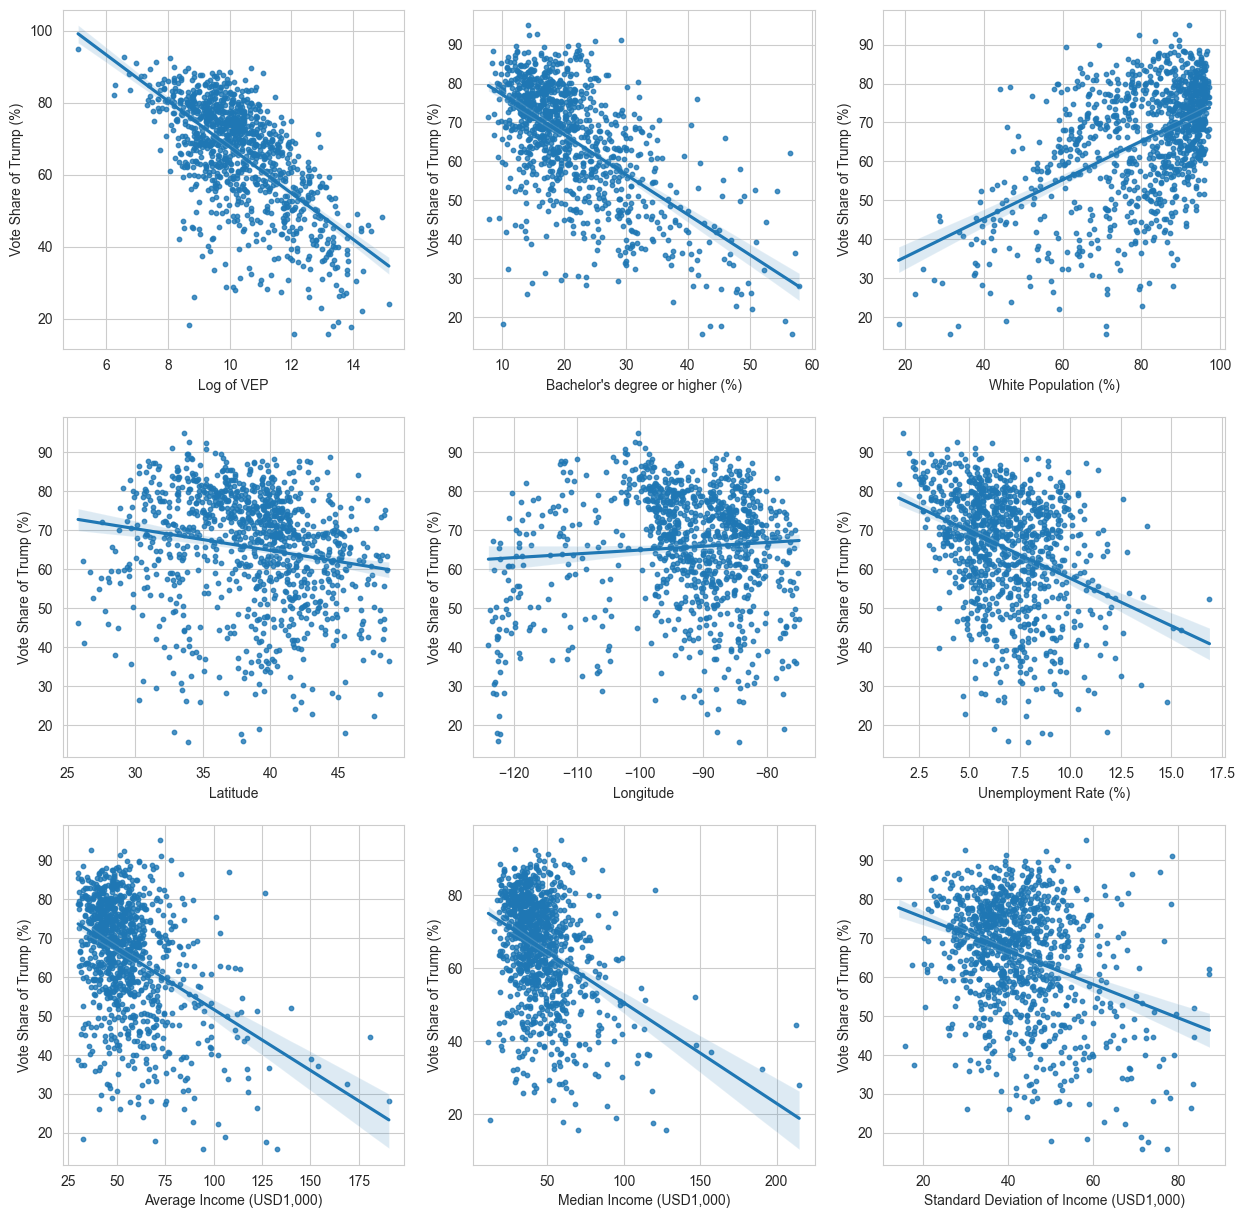

In [388]:
df_1 = df_vote_share.copy()
df_1.drop(df_1[df_1["Median Income (USD1,000)"] > 250].index, inplace = True)

target = "Vote Share of Trump (%)"

var1 = "Log of VEP"
var2 = "Bachelor's degree or higher (%)"
var3 = "White Population (%)"
var4 = 'Latitude'
var5 = 'Longitude'
var6 = 'Unemployment Rate (%)'
var7 = 'Average Income (USD1,000)'
var8 = 'Median Income (USD1,000)'
var9 = 'Standard Deviation of Income (USD1,000)'

# Dropping NA's is required to use numpy's polyfit
df_2 = df_1.dropna(subset=[target, var1, var2, var3, var4, var5, var6, var7, var8, var9])

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(15,15))

# Regression plot with Unemployment Rate
sns.regplot(x=var1, y=target, data=df_2, ax=ax1, scatter_kws={'s': 10})
ax1.set_xlabel(var1)
ax1.set_ylabel(target)

# Regression plot with Density
sns.regplot(x=var2, y=target, data=df_2, ax=ax2, scatter_kws={'s': 10})
ax2.set_xlabel(var2)
ax2.set_ylabel(target)

# Regression plot with Standard Deviation of Income
sns.regplot(x=var3, y=target, data=df_2, ax=ax3, scatter_kws={'s': 10})
ax3.set_xlabel(var3)
ax3.set_ylabel(target)

# Regression plot with White Population
sns.regplot(x=var4, y=target, data=df_2, ax=ax4, scatter_kws={'s': 10})
ax4.set_xlabel(var4)
ax4.set_ylabel(target)

# Regression plot with Population with Bachelor's degree or higher
sns.regplot(x=var5, y=target, data=df_2, ax=ax5, scatter_kws={'s': 10})
ax5.set_xlabel(var5)
ax5.set_ylabel(target)

# Regression plot with Population with Bachelor's degree or higher
sns.regplot(x=var6, y=target, data=df_2, ax=ax6, scatter_kws={'s': 10})
ax6.set_xlabel(var6)
ax6.set_ylabel(target)

# Regression plot with Population with Bachelor's degree or higher
sns.regplot(x=var7, y=target, data=df_2, ax=ax7, scatter_kws={'s': 10})
ax7.set_xlabel(var7)
ax7.set_ylabel(target)

# Regression plot with Population with Bachelor's degree or higher
sns.regplot(x=var8, y=target, data=df_2, ax=ax8, scatter_kws={'s': 10})
ax8.set_xlabel(var8)
ax8.set_ylabel(target)

# Regression plot with Population with Bachelor's degree or higher
sns.regplot(x=var9, y=target, data=df_2, ax=ax9, scatter_kws={'s': 10})
ax9.set_xlabel(var9)
ax9.set_ylabel(target)

#plt.suptitle("VEP Turnout Rate and Its Variables", fontsize=16)

plt.show()

zsRecall that the average annual income is positively correlated to VEP Turnout Rate, but here the annual income standard deviation is negatively correlated with vote share of Trump. This combination indicates that when the state gets wealthier, on one side, the average annual income increases, then the VEP Turnout Rate increase, which means the candidates will receive more effective votes. On the other side, the annual income standard deviation

### Solid Indicator ~ white population/total population, bachelor's degree or higher (age over 18), # of campaigns hosted

Formula for Solid indicator:
$$ \text{Solid Indicator} = \frac{|\text{Votes for Trump} - \text{Votes for Biden}|}{\text{Votes for other candidates}}$$


The solid indicator captures the likelihood of an electoral district staying solid to either Trump or Biden during the election.

The indicator number has no special meaning, the ranking matters (ordinal not cardinal). Higher solid indicator means either Trump or Biden is in the dominant position, and it is unlikely that pulling more voters to the submissive side is going to change the result of election. Lower polarization indicator means there are plenty of voters that could be pulled to either side of Trump and Biden and make a change on the election.

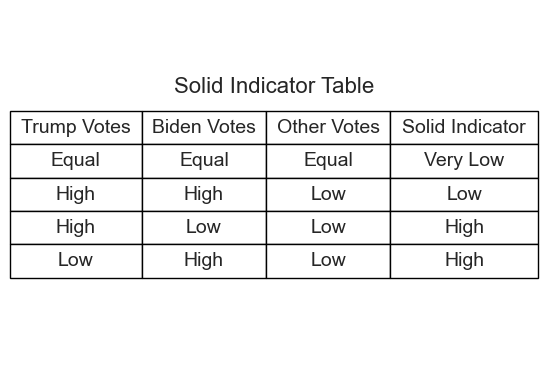

In [214]:
solid_table = {
    'Trump Votes': ['Equal', 'High', 'High', 'Low'],
    'Biden Votes': ['Equal', 'High', 'Low', 'High'],
    'Other Votes': ['Equal', 'Low', 'Low', 'Low'],
    'Solid Indicator': ['Very Low', 'Low', 'High', 'High'],
}

# Create a DataFrame from the dictionary
df_solid_table = pd.DataFrame(solid_table)

# create a figure and axis
fig, ax = plt.subplots()

# hide axis
ax.axis('off')

# create the table using the data in the dataframe
table = ax.table(cellText=df_solid_table.values, colLabels=df_solid_table.columns, loc='center', cellLoc='center')

# set the font size of the cells and header
table.set_fontsize(14)
table.auto_set_column_width(col=list(range(len(df_solid_table.columns))))

# Set the height of the cells
table.scale(1, 2)

# Set the title of the table
title = 'Solid Indicator Table'
plt.text(0, 0.035, title, ha='center', va='top', fontsize=16)

# Hide the axis and turn off the axis lines and ticks
ax.axis('off')
ax.axis('tight')

# Show the plot
plt.show()

In [258]:
df_solid = df_vote_share.copy()
df_solid = pd.merge(df_pivot[['state','county', 'Solid Indicator']], df_solid, on=['state','county'], how='left')
df_solid = pd.merge(df_solid, df_county_turnout[['state', 'county', 'VEP Turnout Rate (%)']], on=['state', 'county'], how='left')

df_solid.head()

state   county  Solid Indicator     candidate party   won  won_votes  \
0  Alabama  Autauga         3.358739  Donald Trump   REP  True    19838.0   
1  Alabama  Baldwin         3.634200  Donald Trump   REP  True    83544.0   
2  Alabama  Barbour         2.310057  Donald Trump   REP  True     5622.0   
3  Alabama     Bibb         4.188752  Donald Trump   REP  True     7525.0   
4  Alabama   Blount         4.533960  Donald Trump   REP  True    24711.0   

   county_total_votes  Vote Share of Trump (%)      lat      lng  \
0             27770.0                71.436802  32.4597 -86.4573   
1            109679.0                76.171373  30.6263 -87.8816   
2             10518.0                53.451226  31.9102 -85.1505   
3              9595.0                78.426264  32.9421 -87.1753   
4             27588.0                89.571553  33.9394 -86.4932   

   Density (ppl/sq mi)  effective_voting_rate  population  Log of VEP  \
0                399.0              65.347327     42496.0   10.662672   
1                540.0              64.028932    171296.0   12.073258   
2                 77.0              53.110483     19804.0    9.869076   
3                209.0              53.934795     17790.0    9.730751   
4                159.0              62.158935     44383.0   10.682244   

   Average Income (USD1,000)  Standard Deviation of Income (USD1,000)  \
0                     63.066                                   41.175   
1                        NaN                                      NaN   
2                     37.725                                   43.789   
3                        NaN                                      NaN   
4                     55.127                                   39.231   

   Latitude  Longitude  Bachelor's degree or higher (%)  \
0   32.4597   -86.4573                        26.668392   
1   30.6263   -87.8816                        29.770689   
2   31.9102   -85.1505                        10.861442   
3   32.9421   -87.1753                        10.331647   
4   33.9394   -86.4932                        12.173580   

   Unemployment Rate (%)  White Population (%)  const  VEP Turnout Rate (%)  
0                    5.4             73.609146    1.0             64.988449  
1                    6.2             83.666994    1.0             62.628836  
2                    7.8             47.591139    1.0             54.431188  
3                    7.3             74.830320    1.0             57.020820  
4                    4.6             87.566901    1.0             63.311176

Regression for Solid Indicator:

In [261]:
df_solid['const'] = 1

target = 'Solid Indicator'

var1 = "Bachelor's degree or higher (%)"
var2 = 'Latitude'
var3 = 'Log of VEP'
var5 = 'Density (ppl/sq mi)'
var4 = "White Population (%)"
var6 = 'Longitude'

reg1 = sm.OLS(endog = df_solid[target],
              exog = df_solid[['const', var1]], missing = 'drop')
reg2 = sm.OLS(endog = df_solid[target],
              exog = df_solid[['const', var1, var2]], missing = 'drop')
reg3 = sm.OLS(endog = df_solid[target],
              exog = df_solid[['const', var1, var2, var3]], missing = 'drop')
reg4 = sm.OLS(endog = df_solid[target],
              exog = df_solid[['const', var1, var2, var3, var4]], missing = 'drop')
reg5 = sm.OLS(endog = df_solid[target],
              exog = df_solid[['const', var1, var2, var3, var4, var5]], missing = 'drop')
reg6 = sm.OLS(endog = df_solid[target],
              exog = df_solid[['const', var1, var2, var3, var4, var5, var6]], missing = 'drop')
result1 = reg1.fit()
result2 = reg2.fit()
result3 = reg3.fit()
result4 = reg4.fit()
result5 = reg5.fit()
result6 = reg6.fit()
stargazer = Stargazer([result1, result2, result3, result4, result5, result6])
stargazer.custom_columns(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6'], [1,1,1,1,1,1])
stargazer.title("Regression Results")
stargazer.covariate_order([var1, var2, var3, var4, var5, var6, 'const'])
HTML(stargazer.render_html())

From our results, we see that Model 4 have the best explanatory power:

- The intercept $ \hat{\beta}_0 = 24.332 $.
- The leading coefficient $ \hat{\beta}_1 = -0.945 $.
- The negative $ \hat{\beta}_1 $ parameter estimate implies that number of 2020 Trump presidential campaign is negatively associated with Solid Indicator.
- The leading coefficient $ \hat{\beta}_2 = -0.571 $.
- The negative $ \hat{\beta}_2 $ parameter estimate implies that the VEP Turnout Rate is negatively associated with Solid Indicator
- The leading coefficient $ \hat{\beta}_3 = 0.319 $.
- The positive $ \hat{\beta}_3 $ parameter estimate implies that educational attainment is positively associated with the Solid Indicator
- The leading coefficient $ \hat{\beta}_4 = 0.167 $.
- The positive $ \hat{\beta}_4 $ parameter estimate implies that proportion of single race population is positively associated with the Solid Indicator
- The F-statistic of 12.954 has a df of 4 and 45, implies that the test was performed with four groups and that there is a significant difference between the variances of at least three of the groups.
- The p-value corresponding to the F-statistic implies that the effect of the three variables on Solid Indicator is statistically significant (using p < 0.01 as a rejection rule).
- The R-squared value of 0.535 indicates that around 53.5% of variation in Solid Indicator is explained by number of 2020 Trump presidential campaign, VEP Turnout Rate, educational attainment, and proportion of single race population.

Using Model 4 for our parameter estimates, we can now write our estimated relationship as

$$
\widehat{\text{Solid Indicator}}_i = 24.332 - 0.945 \ {\text{# of 2020 Presidential Campaigns}}_i - 0.571 \ {\text{VEP Turnout Rate}}_i - 0.945 \ {\text{Proportion with Bachelor's degree or higher}}_i - 4.16 \ {\text{Proportion of Single Race Population}}_i
$$

From the above analysis and the R-squared values, the models suggests that annual income standard deviation has the highest explanatory power (63.4%) to the variation in the vote share of Trump. Overall, all three variables deliver strong estimation of vote share of Trump. An interesting finding from the data is that the predictive power of from the educational attainment and unemployment rate includes and surpasses that of annual income standard deviation. This could make economic sense as education and unemployment rate are important economic indicators that affect the standard deviation in people's income. Higher levels of education tend to lead to higher income and better job opportunities, while lower levels of education are associated with higher unemployment rates and lower income. Therefore, it would be reasonable to leave out income standard deviation and focus more on the other indepedent variables.

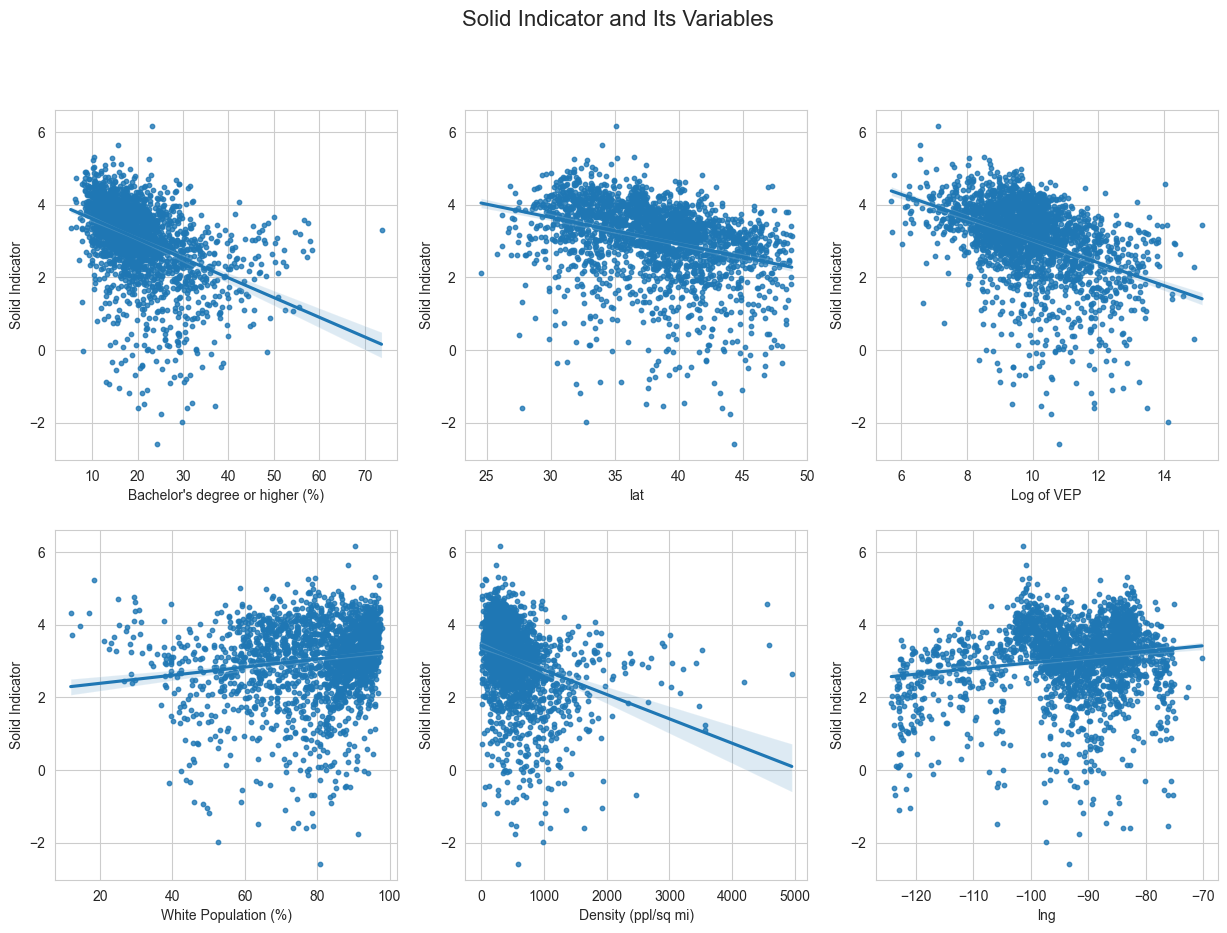

In [217]:
df_1 = df_solid.copy()

# Dropping NA's is required to use numpy's polyfit
df_2 = df_1.dropna(subset=[target, var1, var2, var3, var4, var5, var6])

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,10))

# Regression plot with Unemployment Rate
sns.regplot(x=var1, y=target, data=df_2, ax=ax1, scatter_kws={'s': 10})
ax1.set_xlabel(var1)
ax1.set_ylabel(target)

# Regression plot with Density
sns.regplot(x=var2, y=target, data=df_2, ax=ax2, scatter_kws={'s': 10})
ax2.set_xlabel(var2)
ax2.set_ylabel(target)

# Regression plot with Standard Deviation of Income
sns.regplot(x=var3, y=target, data=df_2, ax=ax3, scatter_kws={'s': 10})
ax3.set_xlabel(var3)
ax3.set_ylabel(target)

# Regression plot with White Population
sns.regplot(x=var4, y=target, data=df_2, ax=ax4, scatter_kws={'s': 10})
ax4.set_xlabel(var4)
ax4.set_ylabel(target)

# Regression plot with Population with Bachelor's degree or higher
sns.regplot(x=var5, y=target, data=df_2, ax=ax5, scatter_kws={'s': 10})
ax5.set_xlabel(var5)
ax5.set_ylabel(target)

# Regression plot with Population with Bachelor's degree or higher
sns.regplot(x=var6, y=target, data=df_2, ax=ax6, scatter_kws={'s': 10})
ax6.set_xlabel(var6)
ax6.set_ylabel(target)

plt.suptitle("Solid Indicator and Its Variables", fontsize=16)

plt.show()

In the 95% confidence interval of last two graphs, it is clear that there is a big chance that true regression line may have a positive slope or negative slope. Therefore, it is very unlikely that the Solid Indicator is correlated with education attainment and the proportion. The reason why I believe this regression is meaningful is that there are arguments against and for the relationship between citizen's educational attainment and political polarization. Researchers who believe they are positively correlated argue that due to people's increased capacity in understanding information and critical thinking, they are more likely to engage in politically motivated reasoning (Kahan et al., 2017). In contrast, the opponent argue that the people gone through higher education are less likely to be emotionally incited by politicians and propaganda, therefore less likely to take a firm stance anywhere of political spectrum. Here in the

### Polarization Indicator ~ median of % Trump vote share in counties, log of median of county population, # of counties

Formula of Polarization Indicator
$$ \text{Polarization Indicator} = \frac{|(\text{Votes for Trump} - \text{Votes for other candidates})(\text{Votes for Biden} - \text{Votes for other candidates})|}{\text{Total Votes}}$$

This is an indicator of a highly contentious and divisive political environment, where different groups have strongly opposing views and are unwilling to compromise.

The indicator number has no special meaning, the ranking matters (ordinal not cardinal). Higher polarization indicator means Trump and Biden are in fierce competition, suggests that the voters in that district or state are deeply divided, with significant support for both Trump and Biden. Lower polarization indicator means there is a lower level of political division within the electoral district.

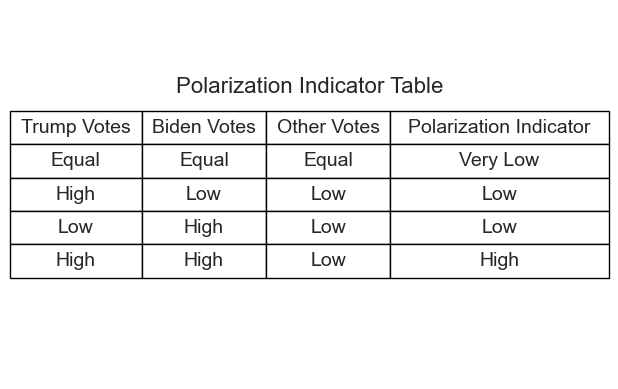

In [218]:
polar_table = {
    'Trump Votes': ['Equal', 'High', 'Low', 'High'],
    'Biden Votes': ['Equal', 'Low', 'High', 'High'],
    'Other Votes': ['Equal', 'Low', 'Low', 'Low'],
    'Polarization Indicator': ['Very Low', 'Low', 'Low', 'High'],
}

# Create a DataFrame from the dictionary
df_polar_table = pd.DataFrame(polar_table)

# create a figure and axis
fig, ax = plt.subplots()

# hide axis
ax.axis('off')

# create the table using the data in the dataframe
table = ax.table(cellText=df_polar_table.values, colLabels=df_polar_table.columns, loc='center', cellLoc='center')

# set the font size of the cells and header
table.set_fontsize(14)
table.auto_set_column_width(col=list(range(len(df_polar_table.columns))))

# Set the height of the cells
table.scale(1, 2)

# Set the title of the table
title = 'Polarization Indicator Table'
plt.text(0, 0.035, title, ha='center', va='top', fontsize=16)

# Hide the axis and turn off the axis lines and ticks
ax.axis('off')
ax.axis('tight')

# Show the plot
plt.show()

We are going to investigate the polarization indicator from

In [225]:
df_polarization = df_solid.copy()
df_polarization = pd.merge(df_polarization, df_pivot[['state', 'county', 'Polarization Indicator']], on=['state', 'county'], how='left')
df_polarization.head()


state   county  Solid Indicator     candidate party   won  won_votes  \
0  Alabama  Autauga         3.358739  Donald Trump   REP  True    19838.0   
1  Alabama  Baldwin         3.634200  Donald Trump   REP  True    83544.0   
2  Alabama  Barbour         2.310057  Donald Trump   REP  True     5622.0   
3  Alabama     Bibb         4.188752  Donald Trump   REP  True     7525.0   
4  Alabama   Blount         4.533960  Donald Trump   REP  True    24711.0   

   county_total_votes  Vote Share of Trump (%)      lat      lng  \
0             27770.0                71.436802  32.4597 -86.4573   
1            109679.0                76.171373  30.6263 -87.8816   
2             10518.0                53.451226  31.9102 -85.1505   
3              9595.0                78.426264  32.9421 -87.1753   
4             27588.0                89.571553  33.9394 -86.4932   

   Density (ppl/sq mi)  effective_voting_rate  population  Log of VEP  \
0                399.0              65.347327     42496.0   10.662672   
1                540.0              64.028932    171296.0   12.073258   
2                 77.0              53.110483     19804.0    9.869076   
3                209.0              53.934795     17790.0    9.730751   
4                159.0              62.158935     44383.0   10.682244   

   Average Income (USD1,000)  Standard Deviation of Income (USD1,000)  \
0                     63.066                                   41.175   
1                        NaN                                      NaN   
2                     37.725                                   43.789   
3                        NaN                                      NaN   
4                     55.127                                   39.231   

   Bachelor's degree or higher (%) State_ab  Labor Force  Employed  \
0                        26.668392       AL      26405.0   24985.0   
1                        29.770689       AL      98910.0   92751.0   
2                        10.861442       AL       8680.0    8004.0   
3                        10.331647       AL       8712.0    8073.0   
4                        12.173580       AL      25116.0   23973.0   

   Unemployed  Unemployment Rate (%)  White Population (%)  \
0      1420.0                    5.4             73.609146   
1      6159.0                    6.2             83.666994   
2       676.0                    7.8             47.591139   
3       639.0                    7.3             74.830320   
4      1143.0                    4.6             87.566901   

   VEP Turnout Rate (%)  Polarization Indicator  
0             64.988449                0.268157  
1             62.628836                0.306877  
2             54.431188                0.126358  
3             57.020820                0.426677  
4             63.311176                0.996052

In [226]:
df_polarization['const'] = 1

target = 'Polarization Indicator'

var3 = "White Population (%)"
var6 = "Density (ppl/sq mi)"
var1 = "Log of VEP"
var2 = "Unemployment Rate (%)"
var4 = 'Average Income (USD1,000)'
var5 = "Bachelor's degree or higher (%)"

reg1 = sm.OLS(endog = df_polarization[target],
              exog = df_polarization[['const', var1]], missing = 'drop')
reg2 = sm.OLS(endog = df_polarization[target],
              exog = df_polarization[['const', var1, var2]], missing = 'drop')
reg3 = sm.OLS(endog = df_polarization[target],
              exog = df_polarization[['const', var1, var2, var3]], missing = 'drop')
reg4 = sm.OLS(endog = df_polarization[target],
              exog = df_polarization[['const', var1, var2, var3, var4]], missing = 'drop')
reg5 = sm.OLS(endog = df_polarization[target],
              exog = df_polarization[['const', var1, var2, var3, var4, var5]], missing = 'drop')
reg6 = sm.OLS(endog = df_polarization[target],
              exog = df_polarization[['const', var1, var2, var3, var4, var5, var6]], missing = 'drop')

result1 = reg1.fit()
result2 = reg2.fit()
result3 = reg3.fit()
result4 = reg4.fit()
result5 = reg5.fit()
result6 = reg6.fit()
stargazer = Stargazer([result1, result2, result3, result4, result5, result6])
stargazer.custom_columns(['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6'], [1,1,1,1,1,1])
stargazer.title("Regression Results")
stargazer.covariate_order([var1, var2, var3, var4, var5, var6, 'const'])
HTML(stargazer.render_html())

From our results, we see that Model 4 have the best explanatory power:

- The intercept $ \hat{\beta}_0 = 24.332 $.
- The leading coefficient $ \hat{\beta}_1 = -0.945 $.
- The negative $ \hat{\beta}_1 $ parameter estimate implies that number of 2020 Trump presidential campaign is negatively associated with Solid Indicator.
- The leading coefficient $ \hat{\beta}_2 = -0.571 $.
- The negative $ \hat{\beta}_2 $ parameter estimate implies that the VEP Turnout Rate is negatively associated with Solid Indicator
- The leading coefficient $ \hat{\beta}_3 = 0.319 $.
- The positive $ \hat{\beta}_3 $ parameter estimate implies that educational attainment is positively associated with the Solid Indicator
- The leading coefficient $ \hat{\beta}_4 = 0.167 $.
- The positive $ \hat{\beta}_4 $ parameter estimate implies that proportion of single race population is positively associated with the Solid Indicator
- The F-statistic of 12.954 has a df of 4 and 45, implies that the test was performed with four groups and that there is a significant difference between the variances of at least three of the groups.
- The p-value corresponding to the F-statistic implies that the effect of the three variables on Solid Indicator is statistically significant (using p < 0.01 as a rejection rule).
- The R-squared value of 0.535 indicates that around 53.5% of variation in Solid Indicator is explained by number of 2020 Trump presidential campaign, VEP Turnout Rate, educational attainment, and proportion of single race population.

Using Model 4 for our parameter estimates, we can now write our estimated relationship as

$$
\widehat{\text{Solid Indicator}}_i = 24.332 - 0.945 \ {\text{# of 2020 Presidential Campaigns}}_i - 0.571 \ {\text{VEP Turnout Rate}}_i - 0.945 \ {\text{Proportion with Bachelor's degree or higher}}_i - 4.16 \ {\text{Proportion of Single Race Population}}_i
$$

From the above analysis and the R-squared values, the models suggests that annual income standard deviation has the highest explanatory power (63.4%) to the variation in the vote share of Trump. Overall, all three variables deliver strong estimation of vote share of Trump. An interesting finding from the data is that the predictive power of from the educational attainment and unemployment rate includes and surpasses that of annual income standard deviation. This could make economic sense as education and unemployment rate are important economic indicators that affect the standard deviation in people's income. Higher levels of education tend to lead to higher income and better job opportunities, while lower levels of education are associated with higher unemployment rates and lower income. Therefore, it would be reasonable to leave out income standard deviation and focus more on the other indepedent variables.

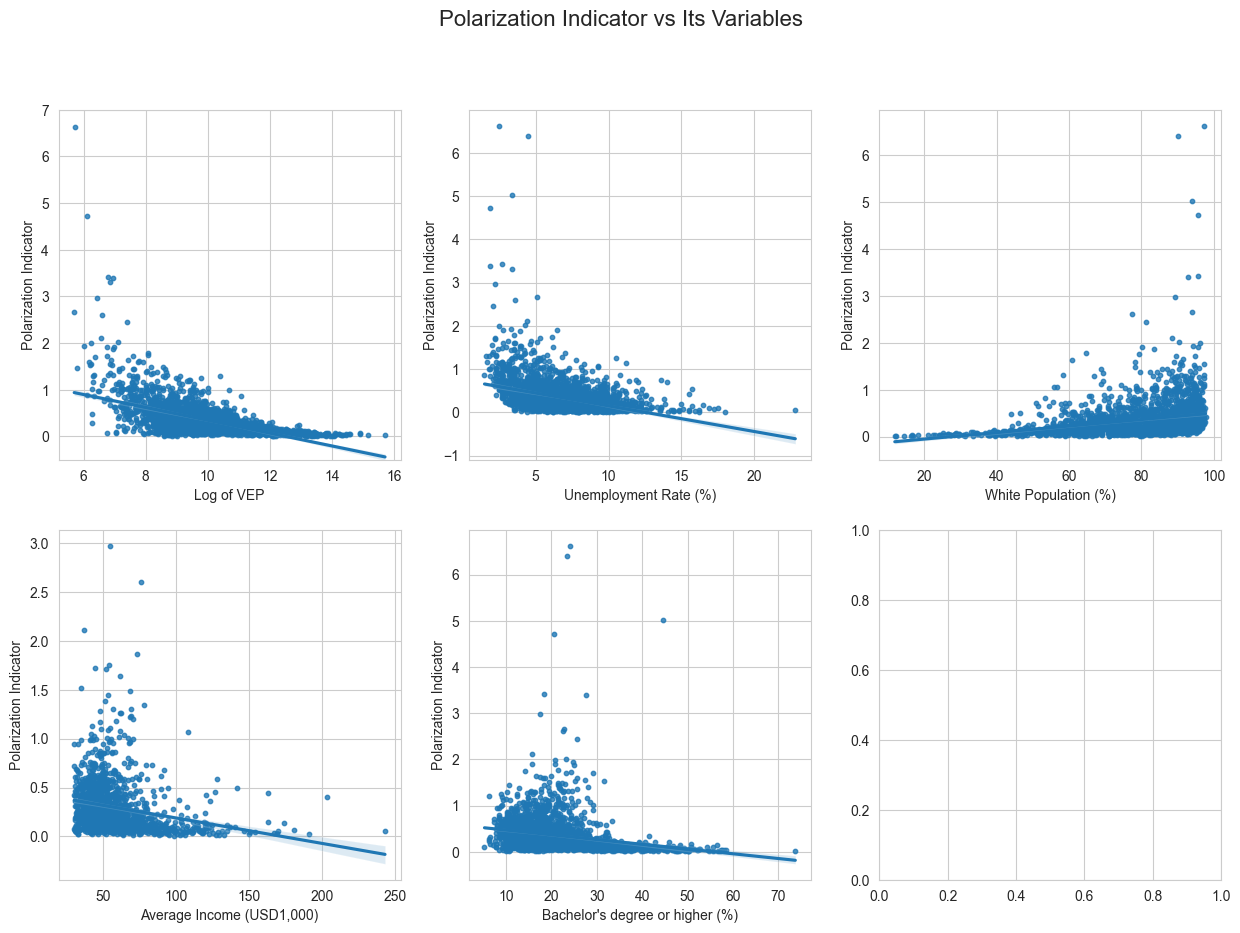

In [227]:
df_1 = df_polarization.copy()

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15,10))


# Reciprocal regression plot with Annual Income Standard Deviation
sns.regplot(x=var1, y='Polarization Indicator', data=df_1, ax=ax1, scatter_kws={'s': 10})
ax1.set_xlabel(var1)
ax1.set_ylabel('Polarization Indicator')
ax1.set_ylim([-0.5, 7])

# Regression plot with Unemployment Rate
sns.regplot(x=var2, y='Polarization Indicator', data=df_1, ax=ax2, scatter_kws={'s': 10})
ax2.set_xlabel(var2)
ax2.set_ylabel('Polarization Indicator')
ax1.set_ylim([-0.5, 7])

# Regression plot with Population with Bachelor's degree or higher
sns.regplot(x=var3, y='Polarization Indicator', data=df_1, ax=ax3, scatter_kws={'s': 10})
ax3.set_xlabel(var3)
ax3.set_ylabel('Polarization Indicator')
ax1.set_ylim([-0.5, 7])

# Regression plot with Population with Bachelor's degree or higher
sns.regplot(x=var4, y='Polarization Indicator', data=df_1, ax=ax4, scatter_kws={'s': 10})
ax4.set_xlabel(var4)
ax4.set_ylabel('Polarization Indicator')
ax1.set_ylim([-0.5, 7])

# Regression plot with Population with Bachelor's degree or higher
sns.regplot(x=var5, y='Polarization Indicator', data=df_1, ax=ax5, scatter_kws={'s': 10})
ax5.set_xlabel(var5)
ax5.set_ylabel('Polarization Indicator')
ax1.set_ylim([-0.5, 7])

plt.suptitle("Polarization Indicator vs Its Variables", fontsize=16)

plt.show()

From the above graph, we can summarize that when the proportion of white population is high, unemployment rate is low, VEP turnout rate is high, the county is more likely to be highly polarized on politics.

# Machine Learning
## Objective Function
The goal of the tree algorithm is to minimize MSE with the least possible terminal nodes. The MSE can be reduced by increasing the depth of the tree, in other words, splitting up more branches. However, doing so will cause overfitting, increase the complexity of the model and restrain the ability to predict new data. Therefore, to penalize excessive terminal nodes, we add a penalty mechanism to the original objective function so that the number of terminal nodes is taken into account.

$$
\min_{tree \subset T} \sum (\hat{f}(x)-y)^2 + \alpha|\text{terminal
   nodes in tree}|
$$

The regularization parameters in the above function are: the minimum leaf size, maximum tree depth, and $ \alpha $.

- The *minimum leaf size* is a hyperparameter that specifies the minimum number of samples required to be at a leaf node in a decision tree. It is another way to control the number of terminal nodes in the tree, and thus the complexity of the model. If the minimum leaf size is set to a higher value, it will force the tree to stop splitting nodes earlier, resulting in fewer but larger terminal nodes.

- The *maximum tree depth* is controlling the number of terminal nodes in the tree. With no other restrictions, Depth 1 means there are 2 terminal nodes, depth 2 means each node at depth 1 is further split into 2 nodes, which means there are 4 terminal nodes. Depth 3 means there are 8 terminal nodes. In general, higher maximum depth means more nodes, but it allows some nodes at lower depth to not further expand branches.

- $ \alpha $ is the pruning parameter. The higher $ \alpha $, the higher penalty is assigned to the same tree, the less likely the regression model is going to generate large trees.

In [459]:
X = df_vote_share.copy()
X = pd.merge(X, df_county_turnout[['state', 'county', 'Median Age (years)']], on=['state', 'county'], how='left')
#X = X.drop(['state', 'county', 'candidate', 'party', 'won', 'const', 'State_ab', 'Polarization Indicator', 'Solid Indicator', "Unemployed", "Employed", "Labor Force", "population", "county_total_votes", "won_votes",  "effective_voting_rate", "VEP Turnout Rate (%)", "Density (ppl/sq mi)"], axis=1)
X = X.drop(['state', 'county', 'candidate', 'party', 'won', 'const', "population", "county_total_votes", "won_votes",  "effective_voting_rate", "Density (ppl/sq mi)", 'lng', 'lat'], axis=1)
X = X.dropna()

# convert everything to be a float for later on
for col in list(X):
    X[col] = X[col].astype(float)

X = X[~np.any(np.isinf(X), axis=1)]

y = list(X["Vote Share of Trump (%)"])

X = X.drop(["Vote Share of Trump (%)"], axis=1)

X.head()

Log of VEP  Average Income (USD1,000)  \
0   12.094543                     58.812   
1    9.861704                     60.142   
4   12.996034                     71.120   
7   11.666161                     72.920   
8   11.900078                     82.163   

   Standard Deviation of Income (USD1,000)  Latitude  Longitude  \
0                                   44.583   38.9091   -75.4227   
1                                   49.617   30.2809   -82.1253   
4                                   58.884   27.9631   -80.6593   
7                                   65.703   28.8119   -82.5392   
8                                   57.137   30.1356   -81.7674   

   Median Income (USD1,000)  White Population (%)  \
0                    51.005             78.148374   
1                    43.196             79.845642   
4                    53.932             76.557600   
7                    56.004             88.946436   
8                    69.487             73.426468   

   Bachelor's degree or higher (%)  Unemployment Rate (%)  Median Age (years)  
0                        27.731267                    7.2                51.2  
1                        13.047827                    5.4                37.4  
4                        29.026429                    7.2                47.4  
7                        18.076883                    9.1                56.9  
8                        24.166682                    5.8                40.0

In [332]:
from sklearn import (
    linear_model, metrics, pipeline, model_selection
)
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report
from sklearn import tree
import plotly.graph_objects as go
import qeds

In [460]:
regr2 = RandomForestRegressor(max_features=6, random_state=1)
regr2.fit(X, y)
pred = regr2.predict(X)
mean_squared_error(y, pred)

5.328308067739798

In [369]:
lr_model = linear_model.LinearRegression()
lr_model.fit(X, y)
y_pred_linear = lr_model.predict(X)
from sklearn import metrics
full_mse = metrics.mean_squared_error(y, y_pred_linear)
print('Mean Squared Error:', full_mse)

Mean Squared Error: 49.73739723819378


The MSE is lower than the result from the OLS regression (7.293), this could result from two major reasons:

- Nonlinear relationships: Random forests are capable of capturing nonlinear relationships between the features and the target variable. For example, the feature longitude does not have a linear relationship with Vote Share of Trump, therefore OLS does a worse job than random forest on minimizing the MSE regard to this variable.

- Feature scaling: Random forests do not require feature scaling, whereas linear regression models do. If the features are not scaled in the linear regression model, then it can lead to poor performance and a higher MSE. This problem on OLS is tackled by taking the log of Voting-Eligible Population, but still could affect the performance of the model.

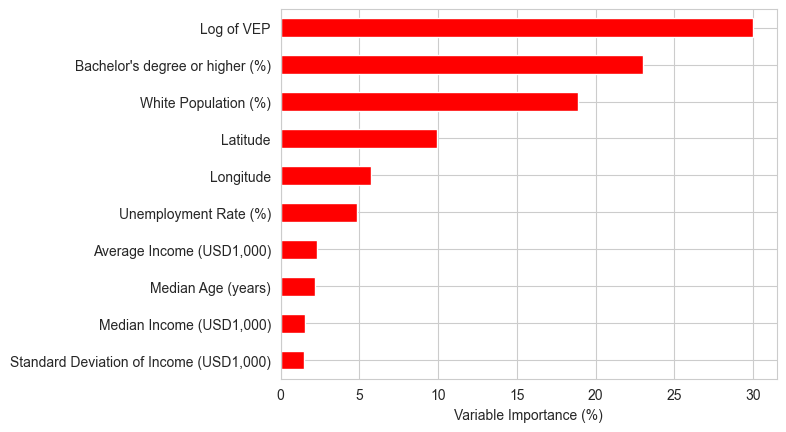

In [355]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance (%)')
plt.gca().legend_ = None

From the above plot, we can see the variable importance by the rank from the highest to the lowest. The difference between random forest and OLS is that, in random forest, educational attainment is more important than the proportion of white population, while in the OLS model it was the opposite. This could be the result from the ability to handle non-linear relationship or not. In the previous graph on the relationship between Vote Share of Trump and these two variables, we see that the proportion of white population exhibit better linear relationship with the target variable (Figure 1.1). Hence, it makes sense that in the OLS model, White Population (%) increases R-square value faster than Bachelor's degree or higher (%).

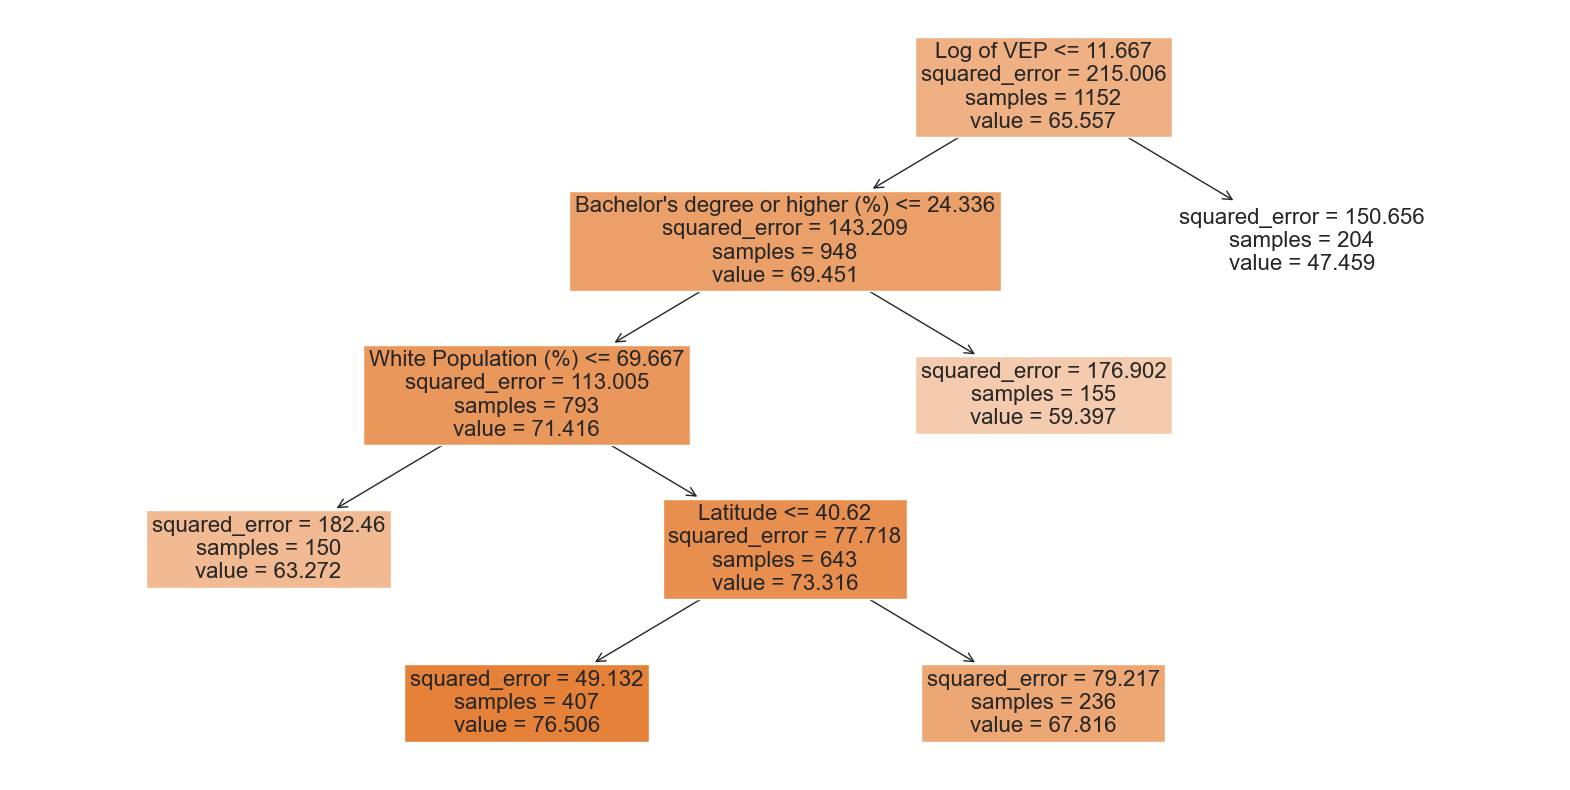

In [391]:
sqft_tree = tree.DecisionTreeRegressor(max_depth=4, min_samples_leaf=150).fit(X,y)
sqrf_fig = plt.figure(figsize=(20,10))
sqrf_fig = tree.plot_tree(sqft_tree, feature_names=X.columns, filled=True, fontsize = 16)

On the right-hand side of the tree, including the root, the tree is split on the Log of Voting-Eligible Population. When the log of VEP are higher than 11.168 (equivalent to the VEP of 8,529,122.77), the vote share of trump is predicted to be 52.136%, lower than the other branch (70.953%). Further at depth 2, the tree is again split based on log of VEP, where the left branch has higher estimation of Trump's vote share than the right branch. This confirms the previous analysis on how the size of county could reflect the level of support for Trump. When the county is populated, possibly be a metropolis, the likelihood of Trump be supported over Biden drops.

On the left-hand side of the tree, at depth 2, the tree is split on the proportion of white population. Clearly, when the white population is more than 58.823% of the total population, Trump is more likely to gain higher support amongst voters (72.614% > 51.964%). This indicates that Trump's policy is more favored by the white population rather than the colored people. At depth 3, the tree is split on the level of educational attainment. When more than 27.268% of population obtained at least Bachalor's degree, the predicted support for Trump (59.826%) is lower than the other branch (73.839%). This shows that Trump's supporters are less likely to have received higher education. At depth 4, the tree is split on the latitude at 40.885 degrees. Recall the previous analysis on the Latitude and Vote Share of Trump (Figure2.1), which had suggested there was a noticeable divergence between the North and the South on Trump's vote share. Here is this regression model, North counties yield lower Trump's vote share (68.623%), south counties yield higher Trump's vote share (75.945%).

In [461]:
X = df_county_turnout.dropna()
X = X.drop(['state', 'county', 'VEP', 'county_total_votes', 'const'], axis=1)

# convert everything to be a float for later on
for col in list(X):
    X[col] = X[col].astype(float)

X = X[~np.any(np.isinf(X), axis=1)]

y = list(X['VEP Turnout Rate (%)'])

X = X.drop(['VEP Turnout Rate (%)'], axis=1)

X.head()

Median Age (years)  Log of VEP  Average Income (USD1,000)  \
0                 38.0   11.767645                     68.711   
2                 51.2   12.094543                     58.812   
11                32.4   12.216182                     39.023   
12                37.4    9.861704                     60.142   
15                47.4   12.996034                     71.120   

    Median Income (USD1,000)  Standard Deviation of Income (USD1,000)  \
0                     57.408                                   53.427   
2                     51.005                                   44.583   
11                    31.371                                   30.751   
12                    43.196                                   49.617   
15                    53.932                                   58.884   

    Bachelor's degree or higher (%)  White Population (%)  Latitude  \
0                         22.566106             62.023533   39.1610   
2                         27.731267             78.148374   38.9091   
11                        37.459360             64.159628   29.6804   
12                        13.047827             79.845642   30.2809   
15                        29.026429             76.557600   27.9631   

    Longitude  Unemployment Rate (%)  
0    -75.5202                    8.3  
2    -75.4227                    7.2  
11   -82.3459                    5.8  
12   -82.1253                    5.4  
15   -80.6593                    7.2

In [462]:
regr2 = RandomForestRegressor(max_features=6, random_state=1)
regr2.fit(X, y)
pred = regr2.predict(X)
mean_squared_error(y, pred)

4.340229955226182

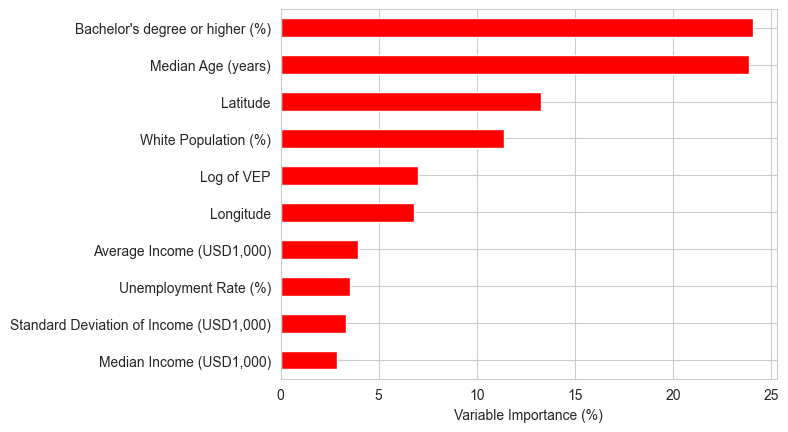

In [463]:
Importance = pd.DataFrame({'Importance':regr2.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance (%)')
plt.gca().legend_ = None

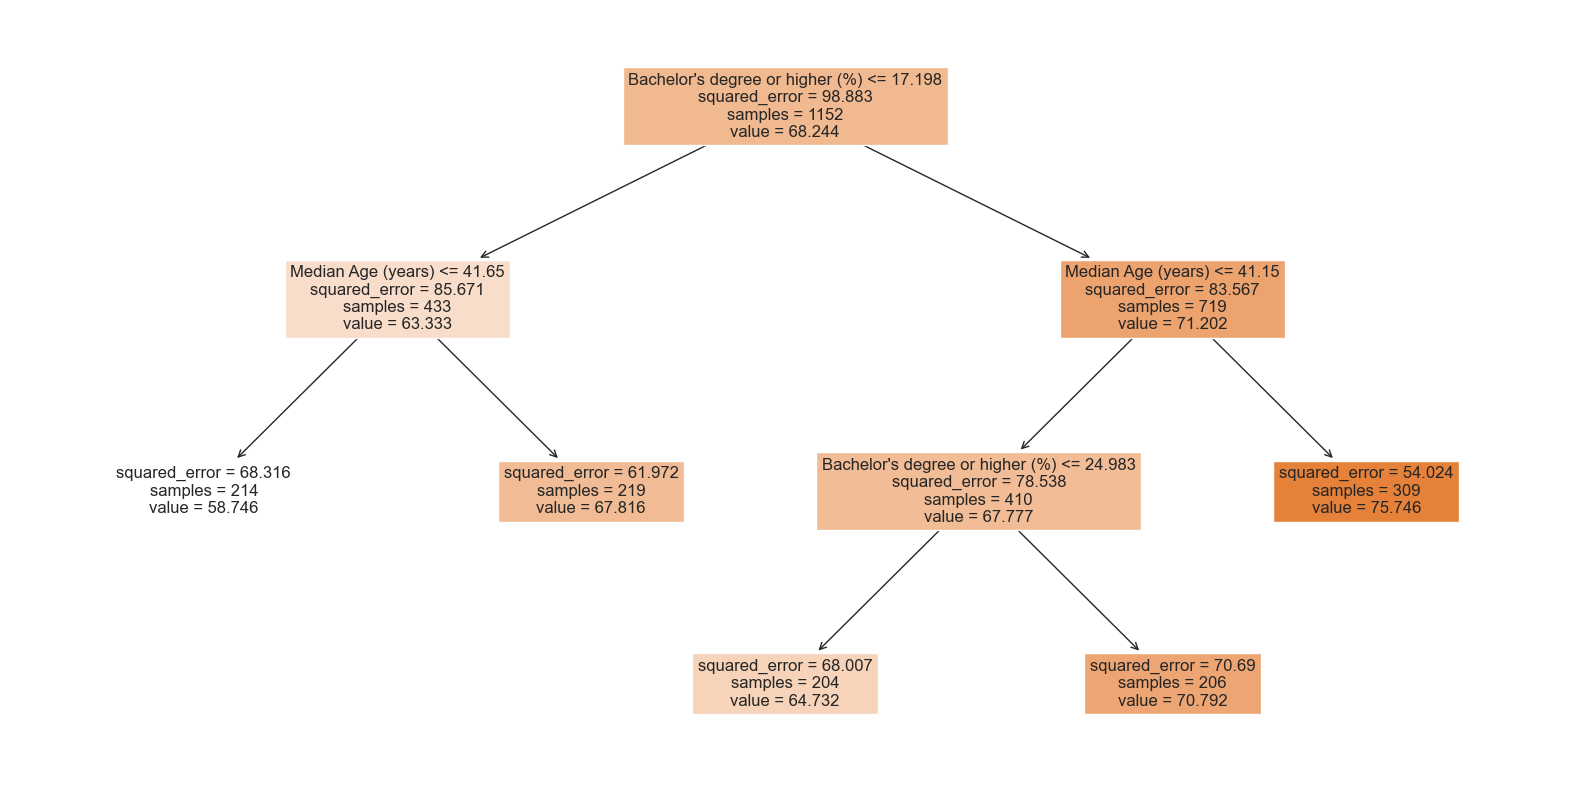

In [464]:
sqft_tree = tree.DecisionTreeRegressor(max_depth=3, min_samples_leaf=200).fit(X,y)
sqrf_fig = plt.figure(figsize=(20,10))
sqrf_fig = tree.plot_tree(sqft_tree, feature_names=X.columns, filled=True, fontsize = 12)

## Conclusion
In conclusion, the results of the four different electoral systems applied to the same election data reveal the significance of the electoral process in determining the outcome of an election. The outcome can vary greatly depending on the specific system being used. In this case, Joe Biden was declared the winner under Electoral System I, where each county was allotted the same number of votes as its number of voters and all votes were cast for the candidate who won the majority of votes in that county. On the other hand, Donald Trump was declared the winner in the remaining three systems - Electoral System II, III, and IV.

In [ ]:
result_4 = [['I', 'Joe Biden'],
            ['II', 'Donald Trump'],
            ['III', 'Donald Trump'],
            ['IV', 'Donald Trump']]
pd.DataFrame(result_4, columns = ['Electoral System', 'Winner'])

 This highlights the importance of choosing an appropriate electoral system that aligns with the values and goals of a given society. It also demonstrates how different electoral systems can have a significant impact on the representation of different regions, communities, and individuals. The analysis shows that the design of an electoral system can greatly influence the outcome of an election and should be carefully considered.

The differences in funding received by Trump and Biden in different sectors also suggest the complex interplay between policy positions, industry interests, and political strategy in the 2020 US Presidential election. It underscores the importance of money and resources in modern political campaigns and reflects the changing dynamics of American politics.

This research paper also highlights the need for ongoing research into the role of outside groups in political campaigns, particularly in the context of the increasing influence of money and resources.

There are likely many factors that contribute to higher levels of support for Donald Trump in southern counties, and the reasons may be complex and multifaceted. However, some potential factors that have been identified by political analysts and scholars include:

Demographics: Southern counties tend to have a higher proportion of white residents, who tend to vote for Republican candidates more often than non-white voters.
Cultural values: The South is often characterized by a distinct culture that places a high value on traditional, conservative values, which may be more closely aligned with the Republican party platform.
Political history: The South has traditionally been a Republican stronghold, with many voters having strong loyalties to the party and its candidates.
Economic issues: Many southern counties have experienced economic challenges in recent years, such as declining manufacturing and agricultural industries, which may have contributed to a desire for change and a preference for candidates promising to bring jobs back to the region.